In [625]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [626]:
# read data
data = pd.read_csv(
    r"C:\Users\hosse\OneDrive\Desktop\AI Source\mini project+ practices Machine learning\پروژه های فصل 3 دوره ماشین لرنینگ\پروژه شماره 2\دیتاست\heart.csv"
)

In [627]:
df = pd.DataFrame(data=data)
df_copy = df.copy()

In [628]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [629]:
row, col = df.shape

In [630]:
print(f"row: {row}")
print(f"columns: {col}")

row: 303
columns: 14


In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<font size=8>
I will change the category columns that are labeled 0 and 1 to make it easier to analyze.

In [632]:
df["sex"] = df["sex"].map({0: "male", 1: "female"})
df["cp"] = df["cp"].map(
    {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic ",
    }
)
df["exang"] = df["exang"].map({0: "no", 1: "yes"})
df["fbs"] = df["fbs"].map({0: "false", 1: "true"})
df["target"] = df["target"].map({0: "no", 1: "yes"})
df["slope"] = df["slope"].map({0: "Upsloping", 1: "Flat", 2: "Downsloping"})
df["thal"] = df["thal"].map(
    {0: "Normal", 1: "Fixed defect", 2: "Reversible defect", 3: "Not described"}
)

In [633]:
df

age     sex                cp  trestbps  chol    fbs  restecg  thalach  \
0     63  female     Asymptomatic        145   233   true        0      150   
1     37  female  Non-anginal pain       130   250  false        1      187   
2     41    male   Atypical angina       130   204  false        0      172   
3     56  female   Atypical angina       120   236  false        1      178   
4     57    male    Typical angina       120   354  false        1      163   
..   ...     ...               ...       ...   ...    ...      ...      ...   
298   57    male    Typical angina       140   241  false        1      123   
299   45  female     Asymptomatic        110   264  false        1      132   
300   68  female    Typical angina       144   193   true        1      141   
301   57  female    Typical angina       130   131  false        1      115   
302   57    male   Atypical angina       130   236  false        0      174   

    exang  oldpeak        slope  ca               thal target  
0      no      2.3    Upsloping   0       Fixed defect    yes  
1      no      3.5    Upsloping   0  Reversible defect    yes  
2      no      1.4  Downsloping   0  Reversible defect    yes  
3      no      0.8  Downsloping   0  Reversible defect    yes  
4     yes      0.6  Downsloping   0  Reversible defect    yes  
..    ...      ...          ...  ..                ...    ...  
298   yes      0.2         Flat   0      Not described     no  
299    no      1.2         Flat   0      Not described     no  
300    no      3.4         Flat   2      Not described     no  
301   yes      1.2         Flat   1      Not described     no  
302    no      0.0         Flat   1  Reversible defect     no  

[303 rows x 14 columns]

In [634]:
df.describe(include="all")

age     sex              cp    trestbps        chol    fbs  \
count   303.000000     303             303  303.000000  303.000000    303   
unique         NaN       2               4         NaN         NaN      2   
top            NaN  female  Typical angina         NaN         NaN  false   
freq           NaN     207             143         NaN         NaN    258   
mean     54.366337     NaN             NaN  131.623762  246.264026    NaN   
std       9.082101     NaN             NaN   17.538143   51.830751    NaN   
min      29.000000     NaN             NaN   94.000000  126.000000    NaN   
25%      47.500000     NaN             NaN  120.000000  211.000000    NaN   
50%      55.000000     NaN             NaN  130.000000  240.000000    NaN   
75%      61.000000     NaN             NaN  140.000000  274.500000    NaN   
max      77.000000     NaN             NaN  200.000000  564.000000    NaN   

           restecg     thalach exang     oldpeak        slope          ca  \
count   303.000000  303.000000   303  303.000000          303  303.000000   
unique         NaN         NaN     2         NaN            3         NaN   
top            NaN         NaN    no         NaN  Downsloping         NaN   
freq           NaN         NaN   204         NaN          142         NaN   
mean      0.528053  149.646865   NaN    1.039604          NaN    0.729373   
std       0.525860   22.905161   NaN    1.161075          NaN    1.022606   
min       0.000000   71.000000   NaN    0.000000          NaN    0.000000   
25%       0.000000  133.500000   NaN    0.000000          NaN    0.000000   
50%       1.000000  153.000000   NaN    0.800000          NaN    0.000000   
75%       1.000000  166.000000   NaN    1.600000          NaN    1.000000   
max       2.000000  202.000000   NaN    6.200000          NaN    4.000000   

                     thal target  
count                 303    303  
unique                  4      2  
top     Reversible defect    yes  
freq                  166    165  
mean                  NaN    NaN  
std                   NaN    NaN  
min                   NaN    NaN  
25%                   NaN    NaN  
50%                   NaN    NaN  
75%                   NaN    NaN  
max                   NaN    NaN

In [635]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target       object
dtype: object

In [636]:
for col in df.columns:
    print(f"unique values in '{col}':")
    print(df[col].unique())
    print("_" * 80)

unique values in 'age':
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
________________________________________________________________________________
unique values in 'sex':
['female' 'male']
________________________________________________________________________________
unique values in 'cp':
['Asymptomatic ' 'Non-anginal pain' 'Atypical angina' 'Typical angina']
________________________________________________________________________________
unique values in 'trestbps':
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
________________________________________________________________________________
unique values in 'chol':
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 3

In [637]:
missing_values = pd.DataFrame(
    data={
        "columns": df.columns,
        "missing value": df.isna().sum(),
        "percent missing value": ((df.isna().sum()) / len(df)) * 100,
    }
)
missing_values

columns  missing value  percent missing value
age            age              0                    0.0
sex            sex              0                    0.0
cp              cp              0                    0.0
trestbps  trestbps              0                    0.0
chol          chol              0                    0.0
fbs            fbs              0                    0.0
restecg    restecg              0                    0.0
thalach    thalach              0                    0.0
exang        exang              0                    0.0
oldpeak    oldpeak              0                    0.0
slope        slope              0                    0.0
ca              ca              0                    0.0
thal          thal              0                    0.0
target      target              0                    0.0

There are no missing values in the columns.

# Let's examine the distribution of the data.

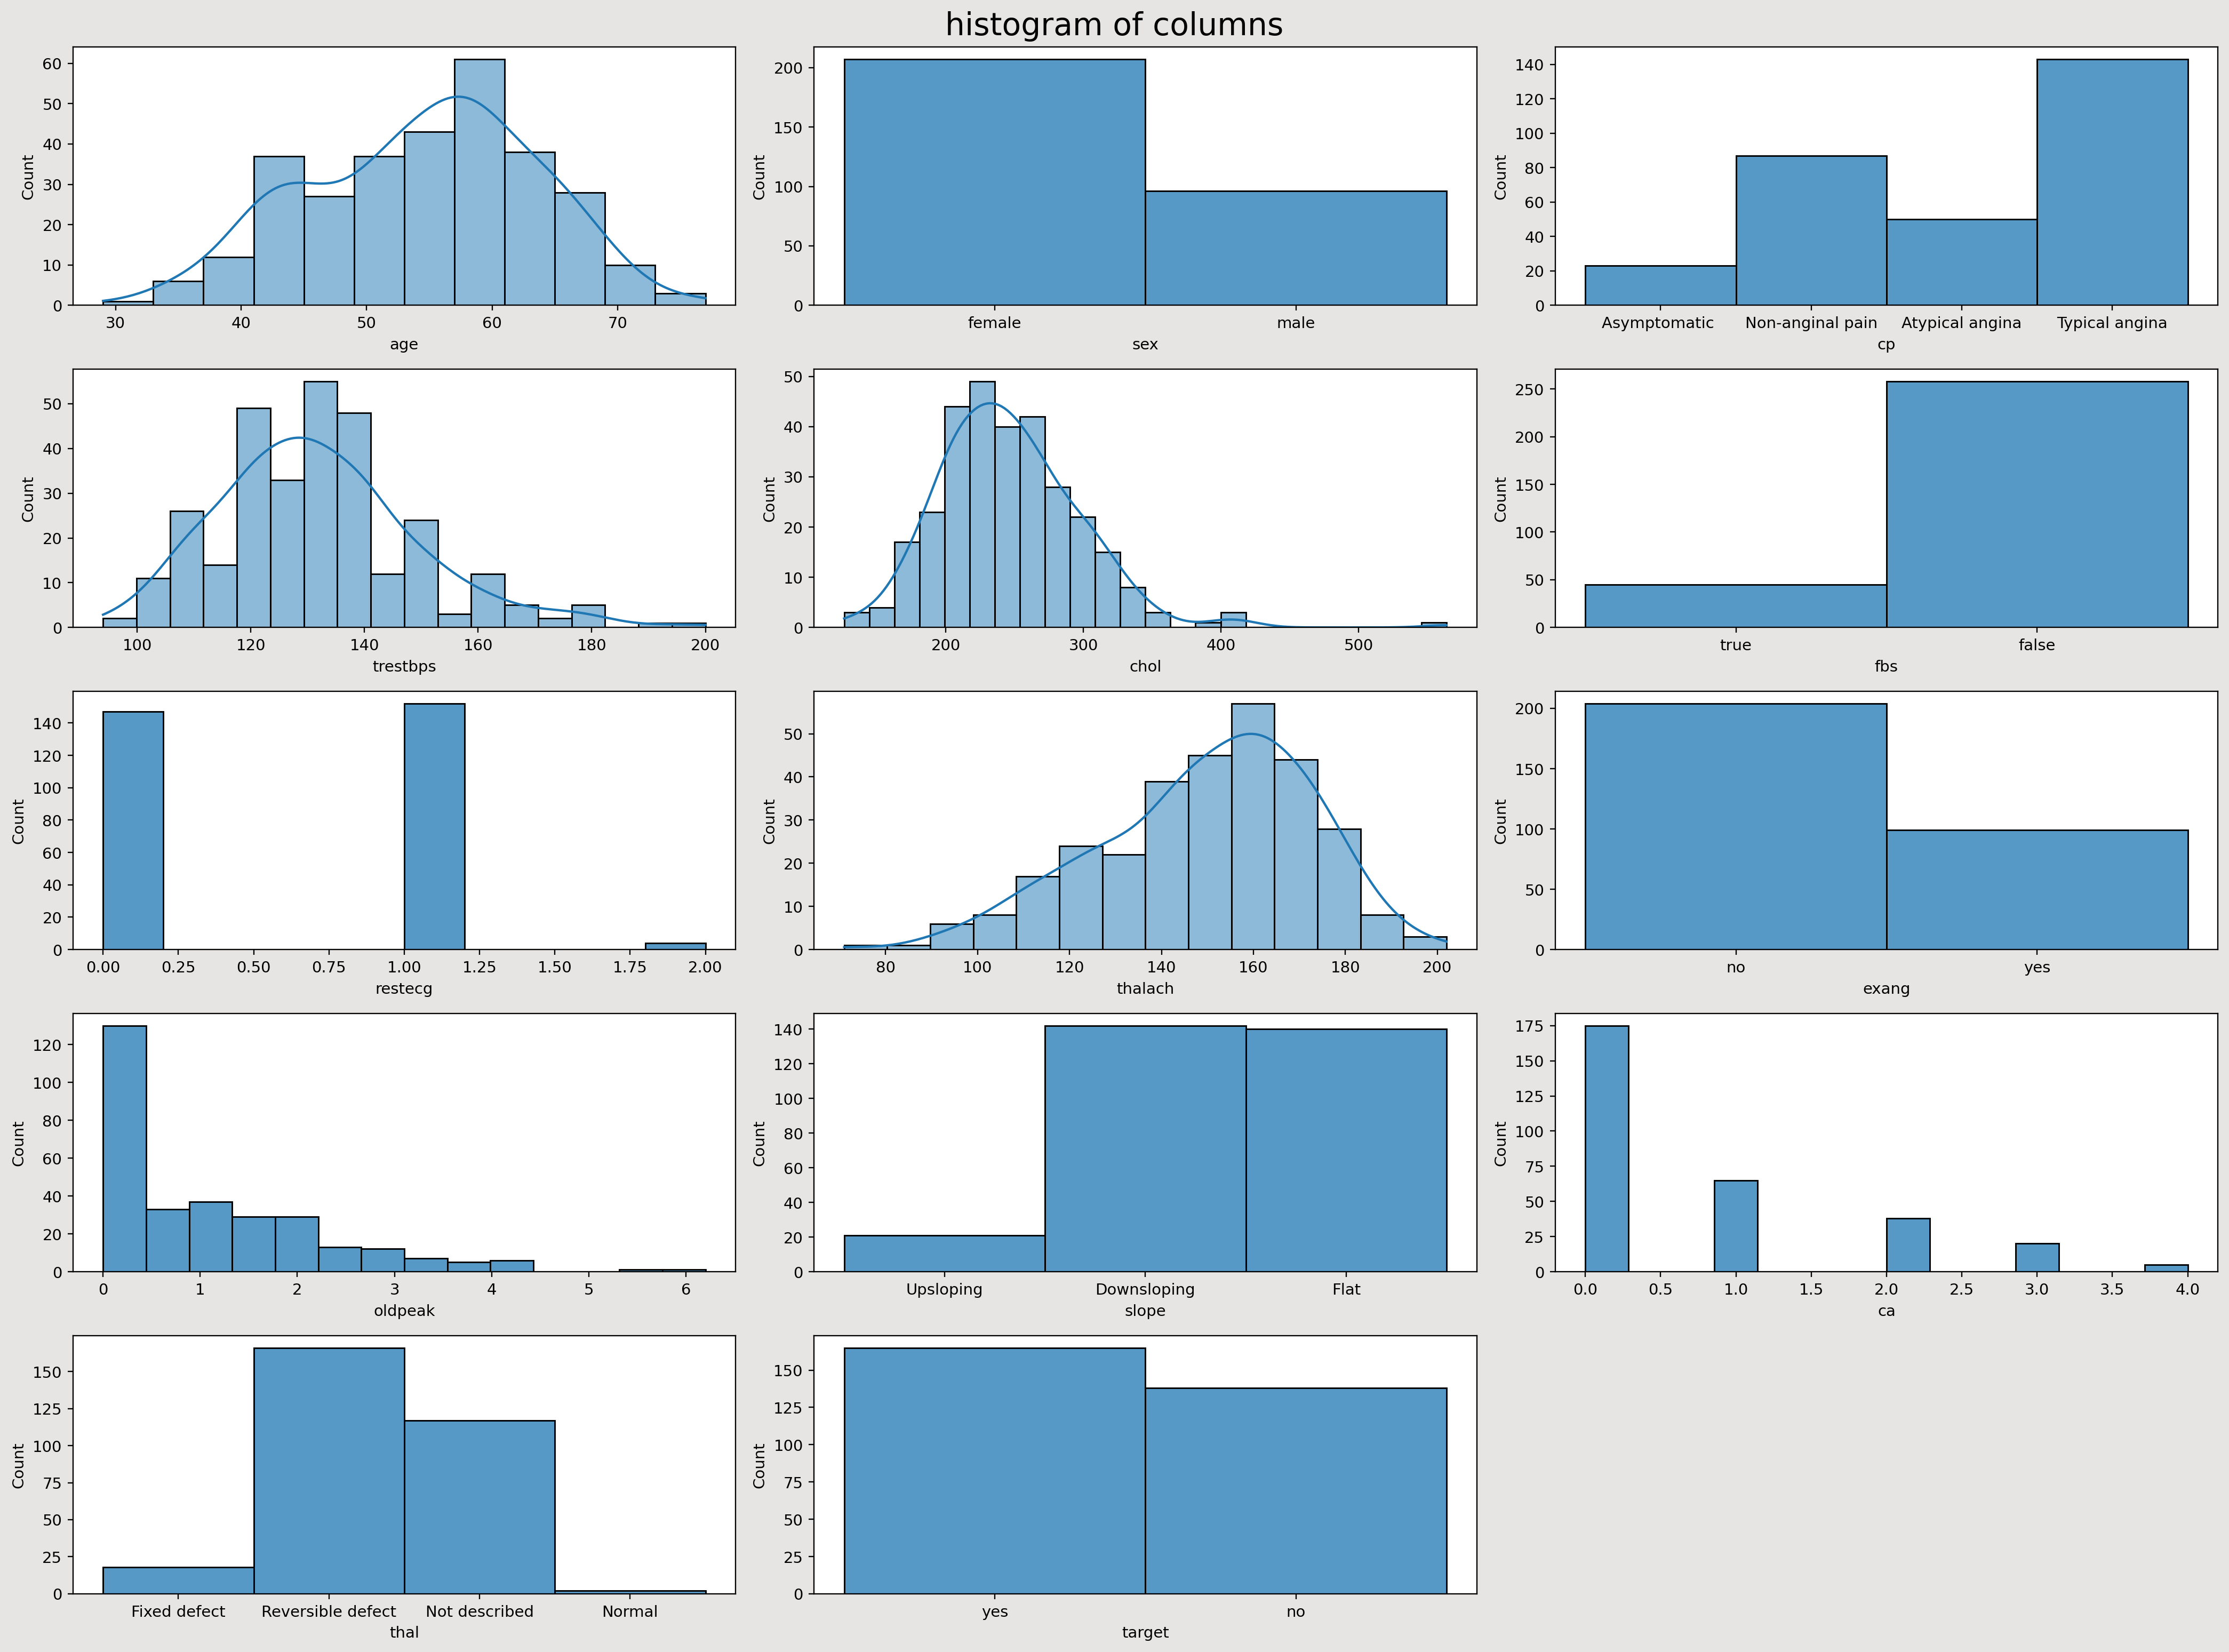

In [638]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 15), dpi=210)
fig.patch.set_facecolor("#E7E5E4")


fig.suptitle("histogram of columns", fontsize=20)


sns.histplot(data=df, x=df["age"], ax=ax[0, 0], kde=True)


sns.histplot(data=df, x=df["sex"], ax=ax[0, 1])


sns.histplot(data=df, x=df["cp"], ax=ax[0, 2])


sns.histplot(data=df, x=df["trestbps"], ax=ax[1, 0], kde=True)


sns.histplot(data=df, x=df["chol"], ax=ax[1, 1], kde=True)


sns.histplot(data=df, x=df["fbs"], ax=ax[1, 2])


sns.histplot(data=df, x=df["restecg"], ax=ax[2, 0])


sns.histplot(data=df, x=df["thalach"], ax=ax[2, 1], kde=True)
sns.histplot(data=df, x=df["exang"], ax=ax[2, 2])


sns.histplot(data=df, x=df["oldpeak"], ax=ax[3, 0])


sns.histplot(data=df, x=df["slope"], ax=ax[3, 1])


sns.histplot(data=df, x=df["ca"], ax=ax[3, 2])


sns.histplot(data=df, x=df["thal"], ax=ax[4, 0])


sns.histplot(data=df, x=df["target"], ax=ax[4, 1])


fig.delaxes(ax[4, 2])


plt.tight_layout()


plt.show()

<font size=8>
Analysis this chart:<br><br>

✅ Row 1:<br>
1)age:

Distribution close to normal (skeletal).

Most patients are between 50 and 65 years old.

Skew slightly to the right (elderly people are less).

2)sex:

The male to female ratio is approximately 2 to 1.

There are twice as many men as women in this dataset.

3)cp (type of chest pain):

Most common type: Typical angina

Least common type: Asymptomatic

There is a good variety of pain types.

✅ Row 2:<br>
1)trestbps (resting blood pressure):

Most patients have pressures between 110 and 140 mmHg.

Skew to the right (there are some high pressures).

2)chol (cholesterol):

Most patients have cholesterol between 200 and 300 mg/dL.

There are some with very high values (up to 560).

Skew to the right (high values are high but few).

3)fbs (fasting blood sugar > 120):

Most people have normal blood sugar (false).

A small percentage of patients have diabetes (true).

✅ Row 3:<br>
1)restecg (resting ECG result):

Class 1 (i.e. normal or without abnormalities) is the most frequent.

Class 2 is very rare.

2)thalach (maximum heart rate):

Nearly normal distribution, most patients are in the range of 140–170 bpm.

Well-dispersed data.

3)exang (exercise-induced angina):

Most people are without angina (no).

Angina during exercise is in the minority.

✅ Row 4:<br>
1)oldpeak (ST depression):

Most patients have low values (close to 0).

The distribution is strongly skewed to the right (mostly normal ST).

There are up to 6 outliers.

2)slope (ST segment slope):

The first two types (Flat and Downsloping) are almost dominant.

Upsloping is less common.

3)ca (number of stained vessels):

Mostly have a value of 0 (no vessels are blocked).

The higher the value, the fewer people.

It indicates the rarity of severe blockage in this sample.

✅ Row 5:<br>
1)thal (thalassemia test):

Most people: Reversible defect

Followed by: Normal and Fixed defect

A small number have a value of "Not described" which is probably missing or specific data.

2)target (target value: has or does not have heart disease):

The data is relatively balanced.

There are a few more healthy people (no) but the difference is not much.

# Let's check noise and outlier

# columns age and trestbps

In [639]:
font_title = {"fontsize": 22}
font_x_y_label = {"fontsize": 20}
font_axis = 18

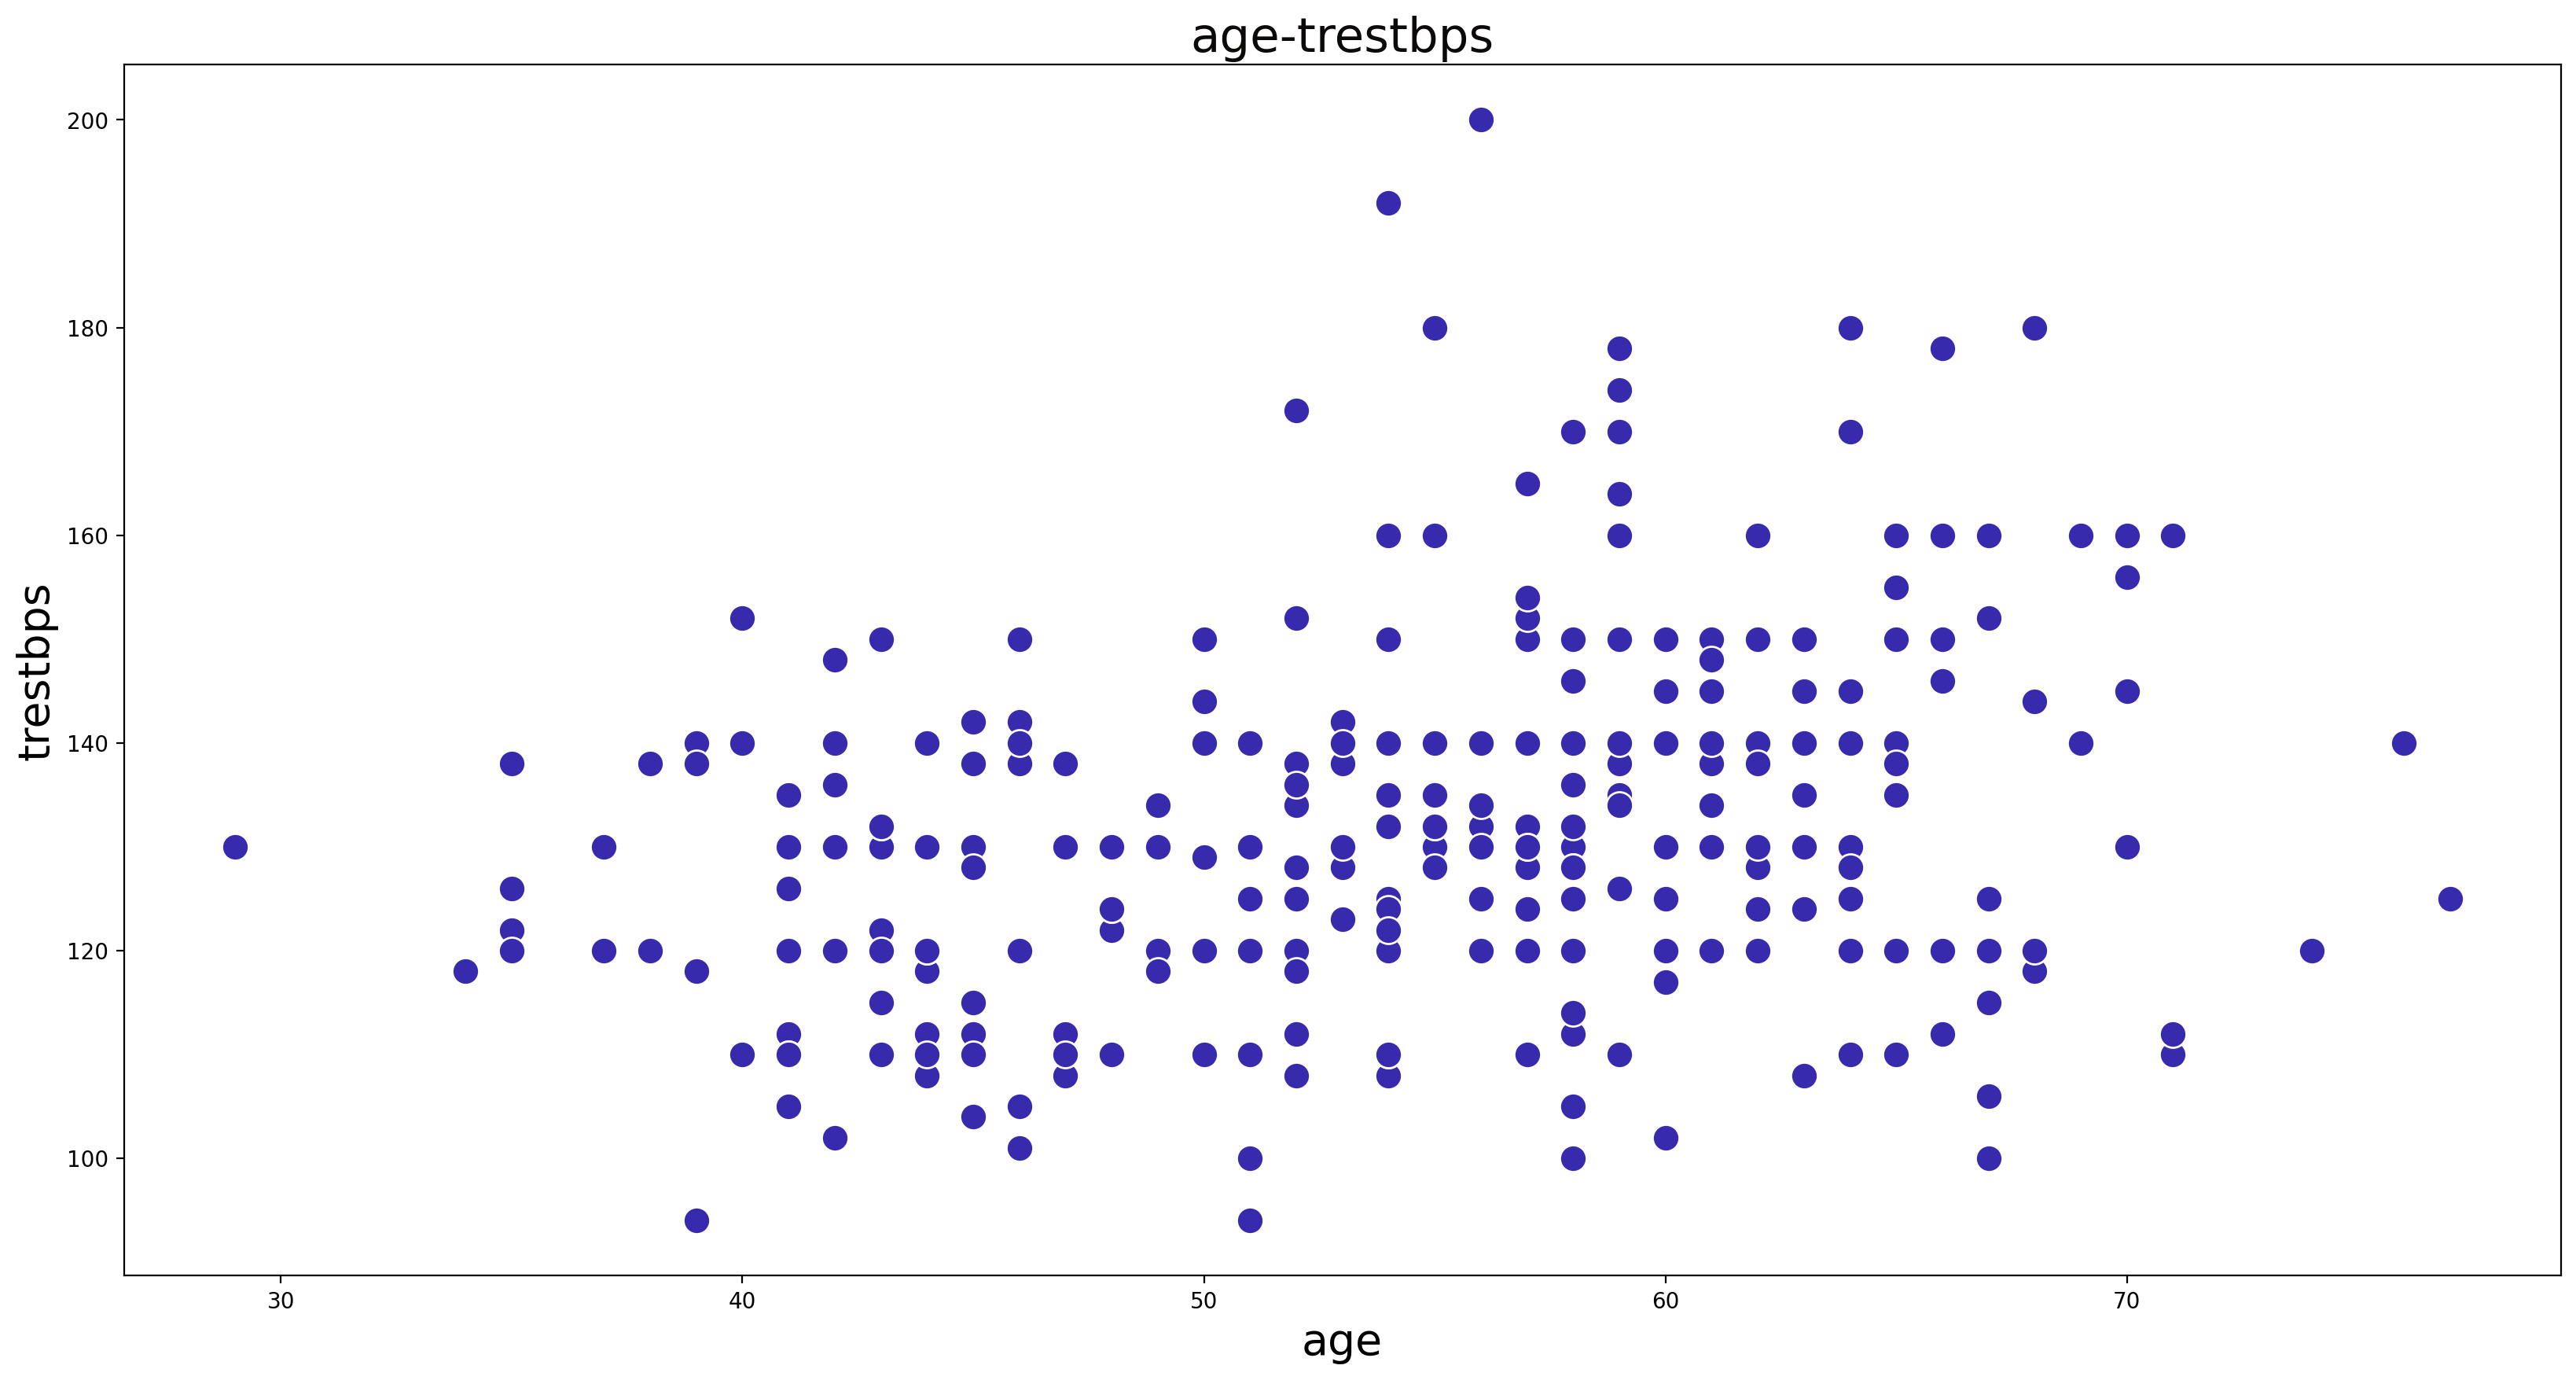

In [640]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x=df["age"], y=df["trestbps"], s=150, color="#372AAC")
plt.title("age-trestbps", fontdict=font_title, color="#0C0A09")
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("trestbps", fontsize=20)
plt.show()

<font size=9 face="time new roman">
**I'll show you the outliers in a different color**

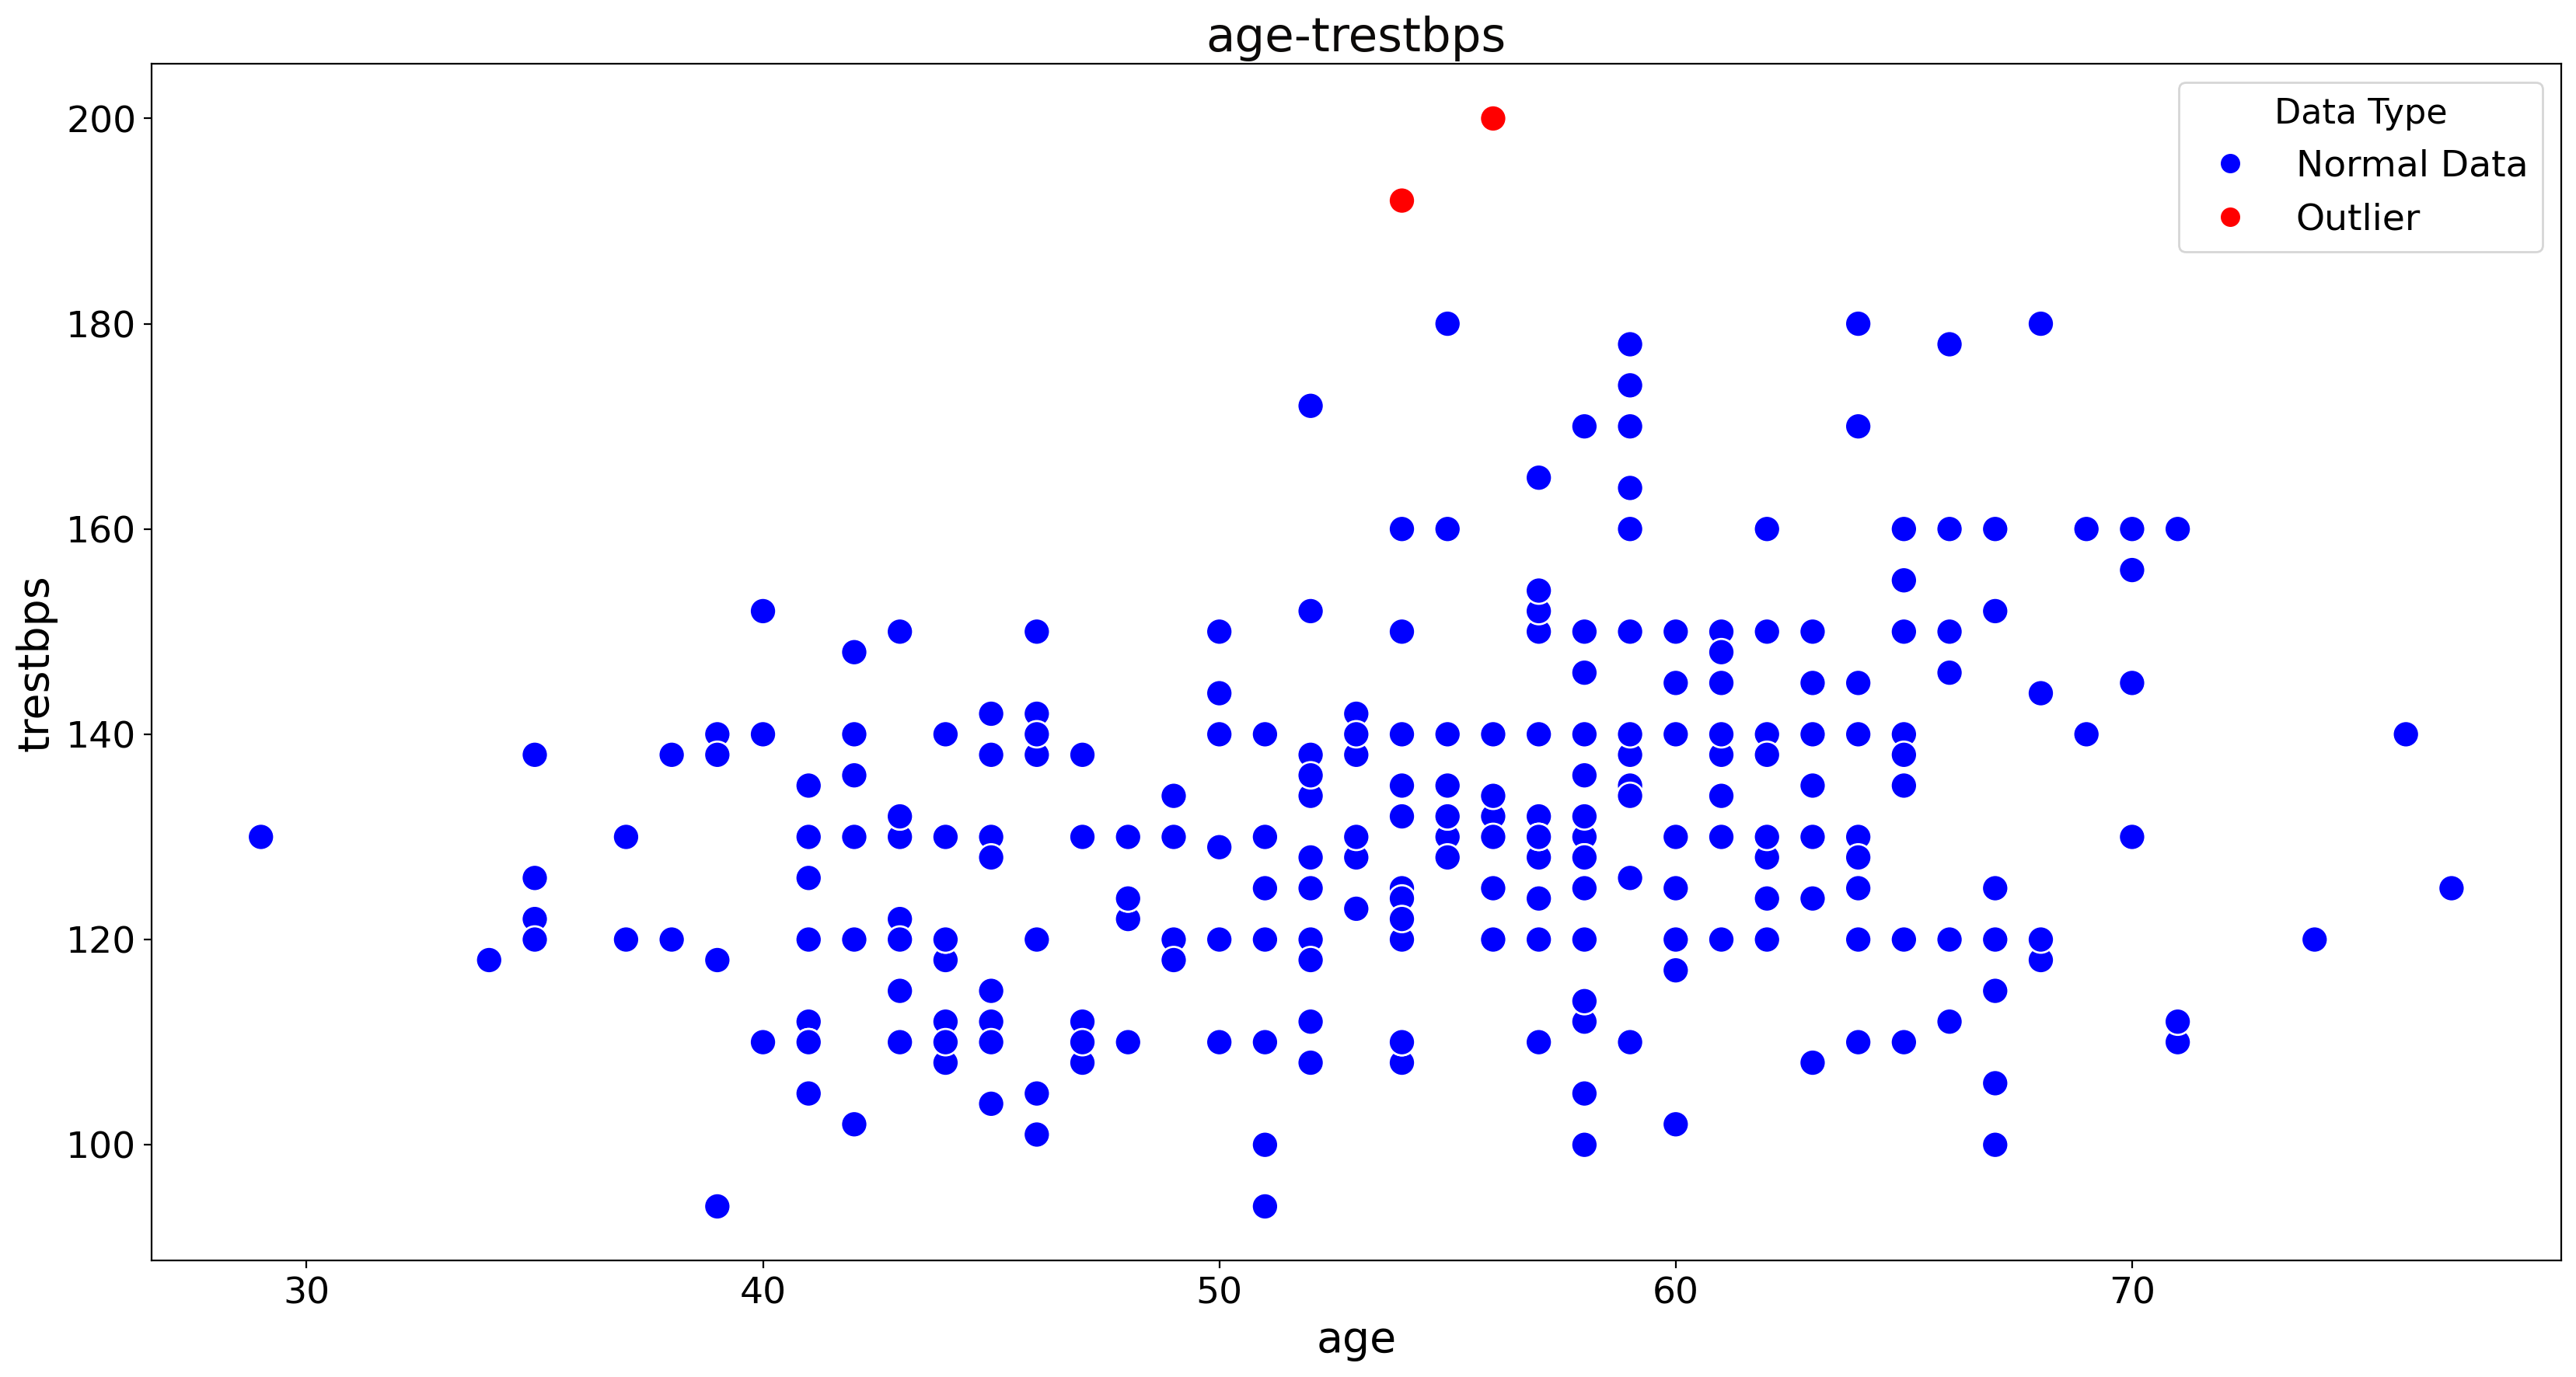

In [641]:
plt.figure(figsize=(20, 10), dpi=200)
colors_outlier = df["trestbps"].apply(lambda x: "red" if (x >= 181) else "blue")
sns.scatterplot(data=df, x=df["age"], y=df["trestbps"], s=150, c=colors_outlier)
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Normal Data",
        markerfacecolor="blue",
        markersize=10,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Outlier",
        markerfacecolor="red",
        markersize=10,
    ),
]

plt.legend(
    handles=legend_elements,
    loc="best",
    fontsize=17,
    title="Data Type",
    title_fontsize=16,
)
plt.title("age-trestbps", fontdict=font_title, color="#0C0A09")
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("trestbps", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=17)
plt.show()

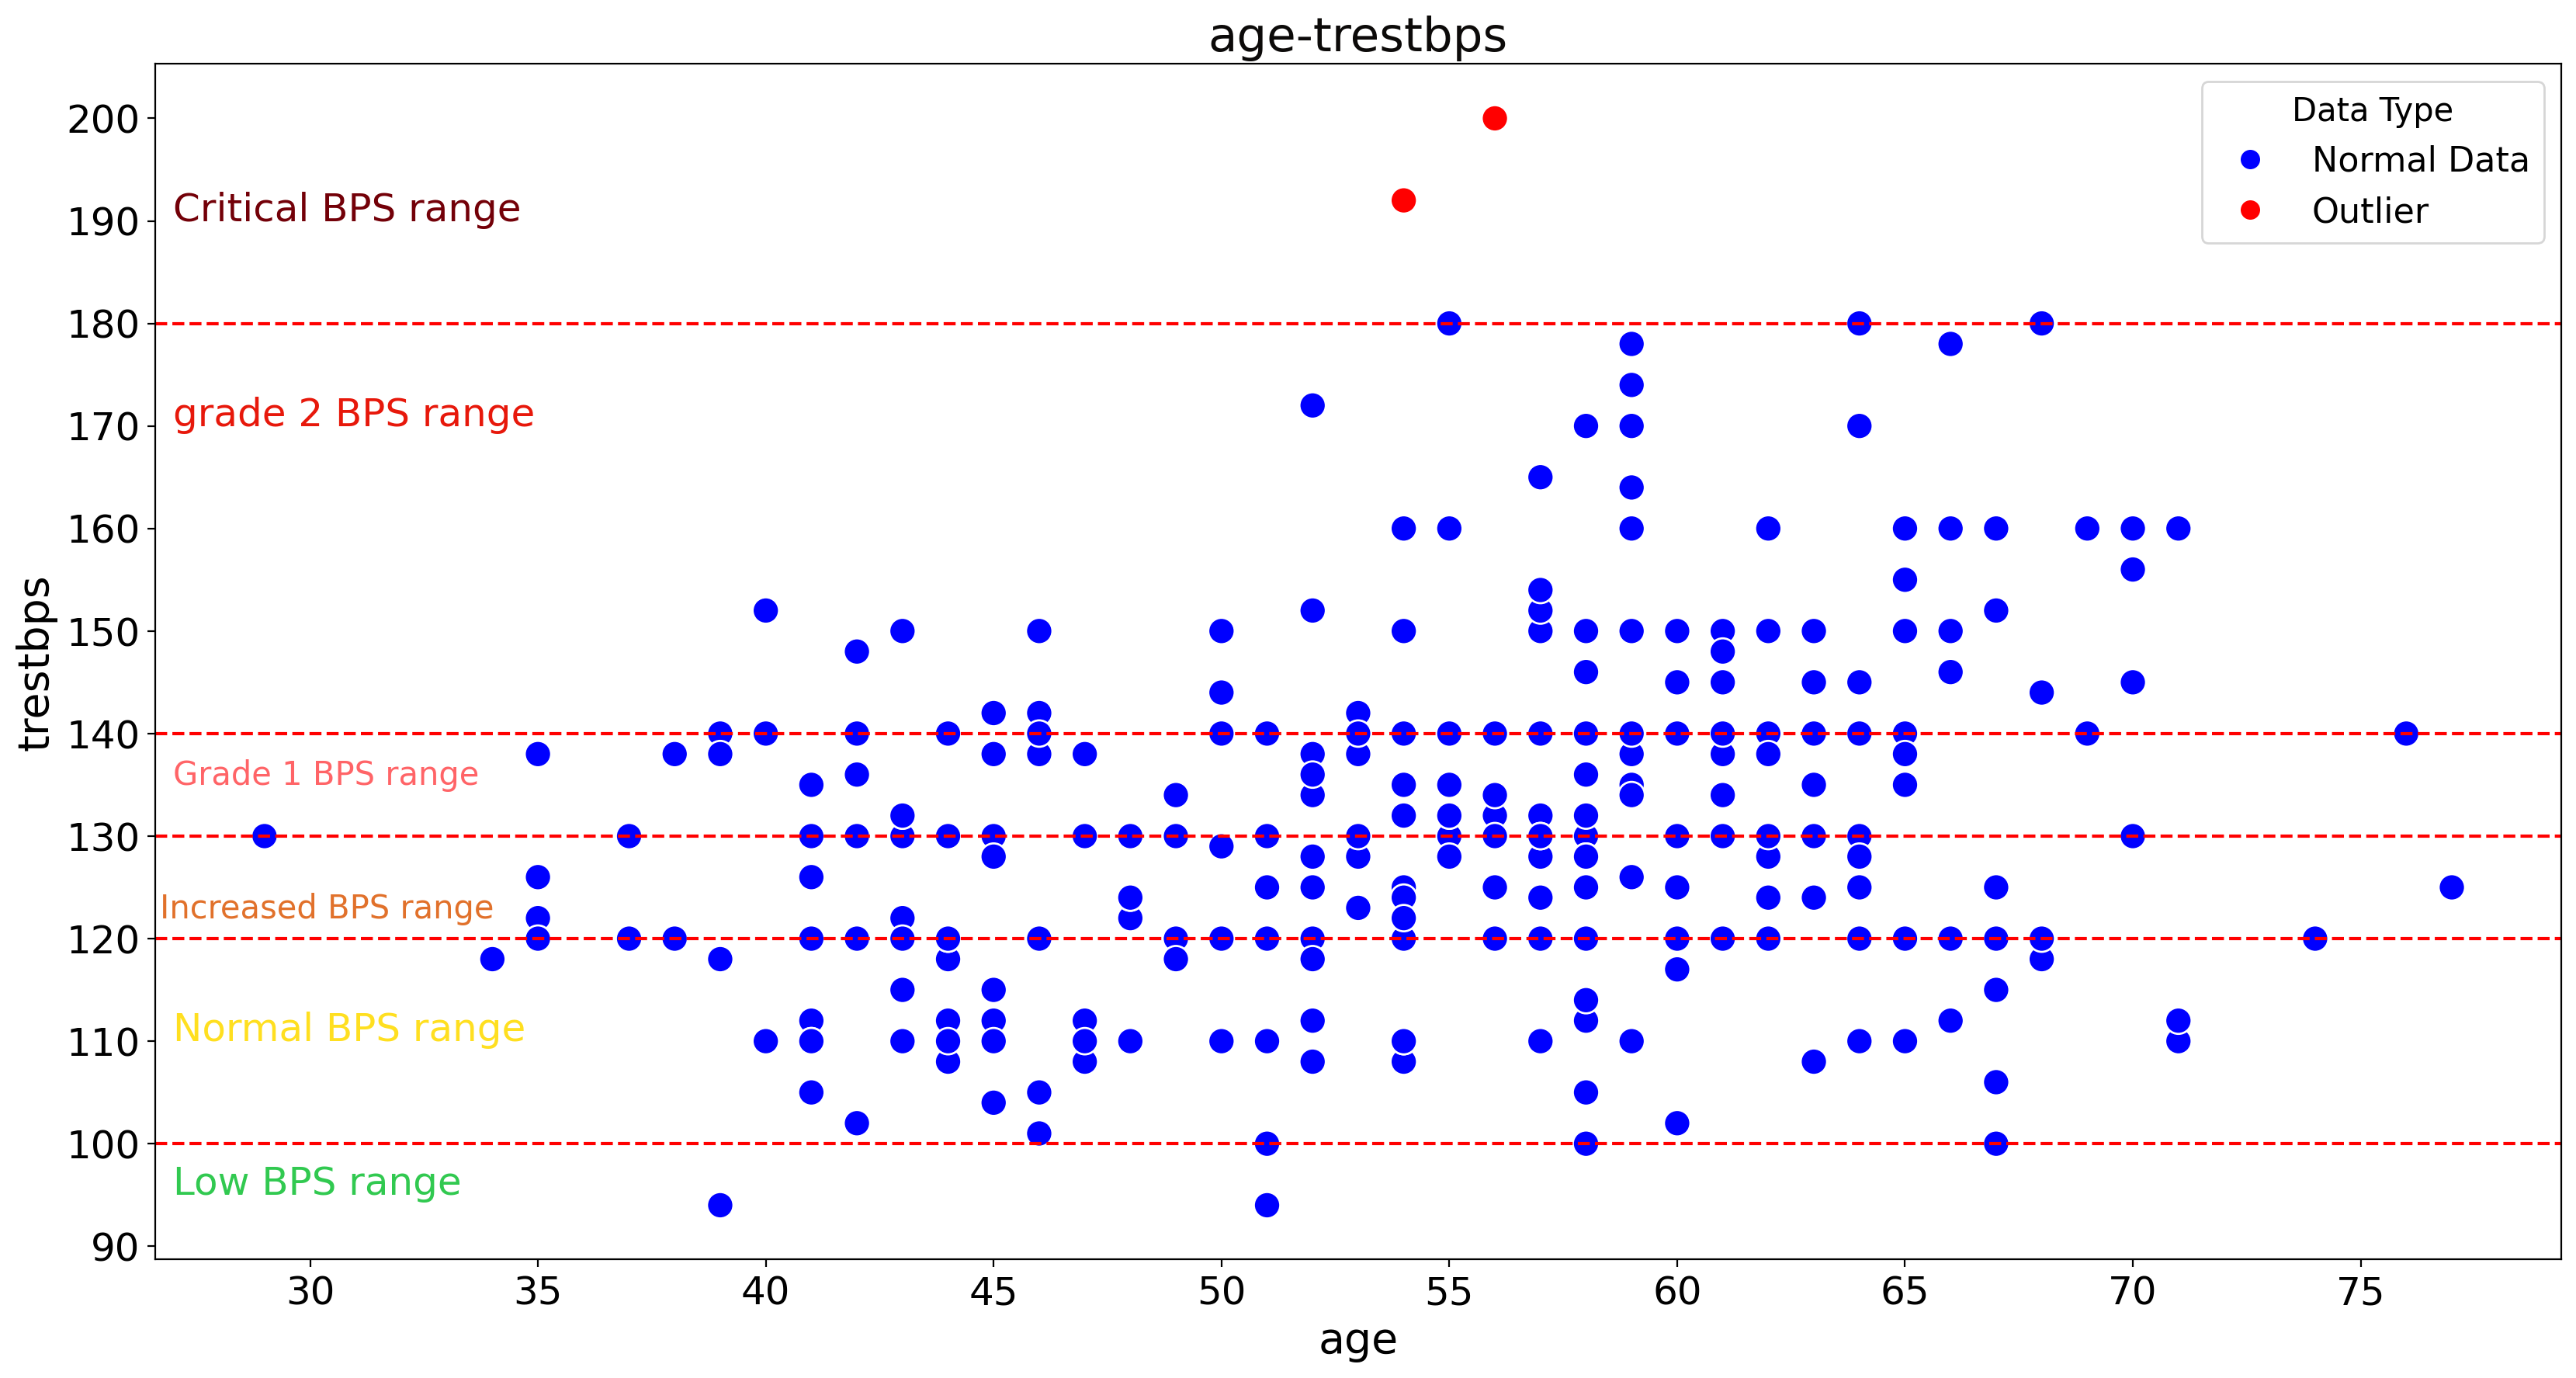

In [642]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x=df["age"], y=df["trestbps"], s=150, c=colors_outlier)
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Normal Data",
        markerfacecolor="blue",
        markersize=10,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Outlier",
        markerfacecolor="red",
        markersize=10,
    ),
]

plt.legend(
    handles=legend_elements,
    loc="best",
    fontsize=16,
    title="Data Type",
    title_fontsize=15,
)
plt.title("age-trestbps", fontdict=font_title, color="#0C0A09")
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("trestbps", fontsize=20)
plt.tick_params(axis="both", labelsize=font_axis)
plt.xticks(range(30, 80, 5))
plt.yticks(range(90, 201, 10))
plt.axhline(y=100, color="red", linestyle="--")
plt.axhline(y=120, color="red", linestyle="--")
plt.axhline(y=130, color="red", linestyle="--")
plt.axhline(y=140, color="red", linestyle="--")
plt.axhline(y=180, color="red", linestyle="--")
plt.text(27, 95, s="Low BPS range", fontsize=18, color="#31C950")
plt.text(27, 110, s="Normal BPS range", fontsize=18, color="#FFDF20")
plt.text(26.7, 122, s="Increased BPS range", fontsize=15, color="#E1712B")
plt.text(27, 135, s="Grade 1 BPS range", fontsize=15, color="#FF6467")
plt.text(27, 170, s="grade 2 BPS range", fontsize=18, color="#E7180B")
plt.text(27, 190, s="Critical BPS range", fontsize=18, color="#730008")
plt.show()

### Now we apply the target

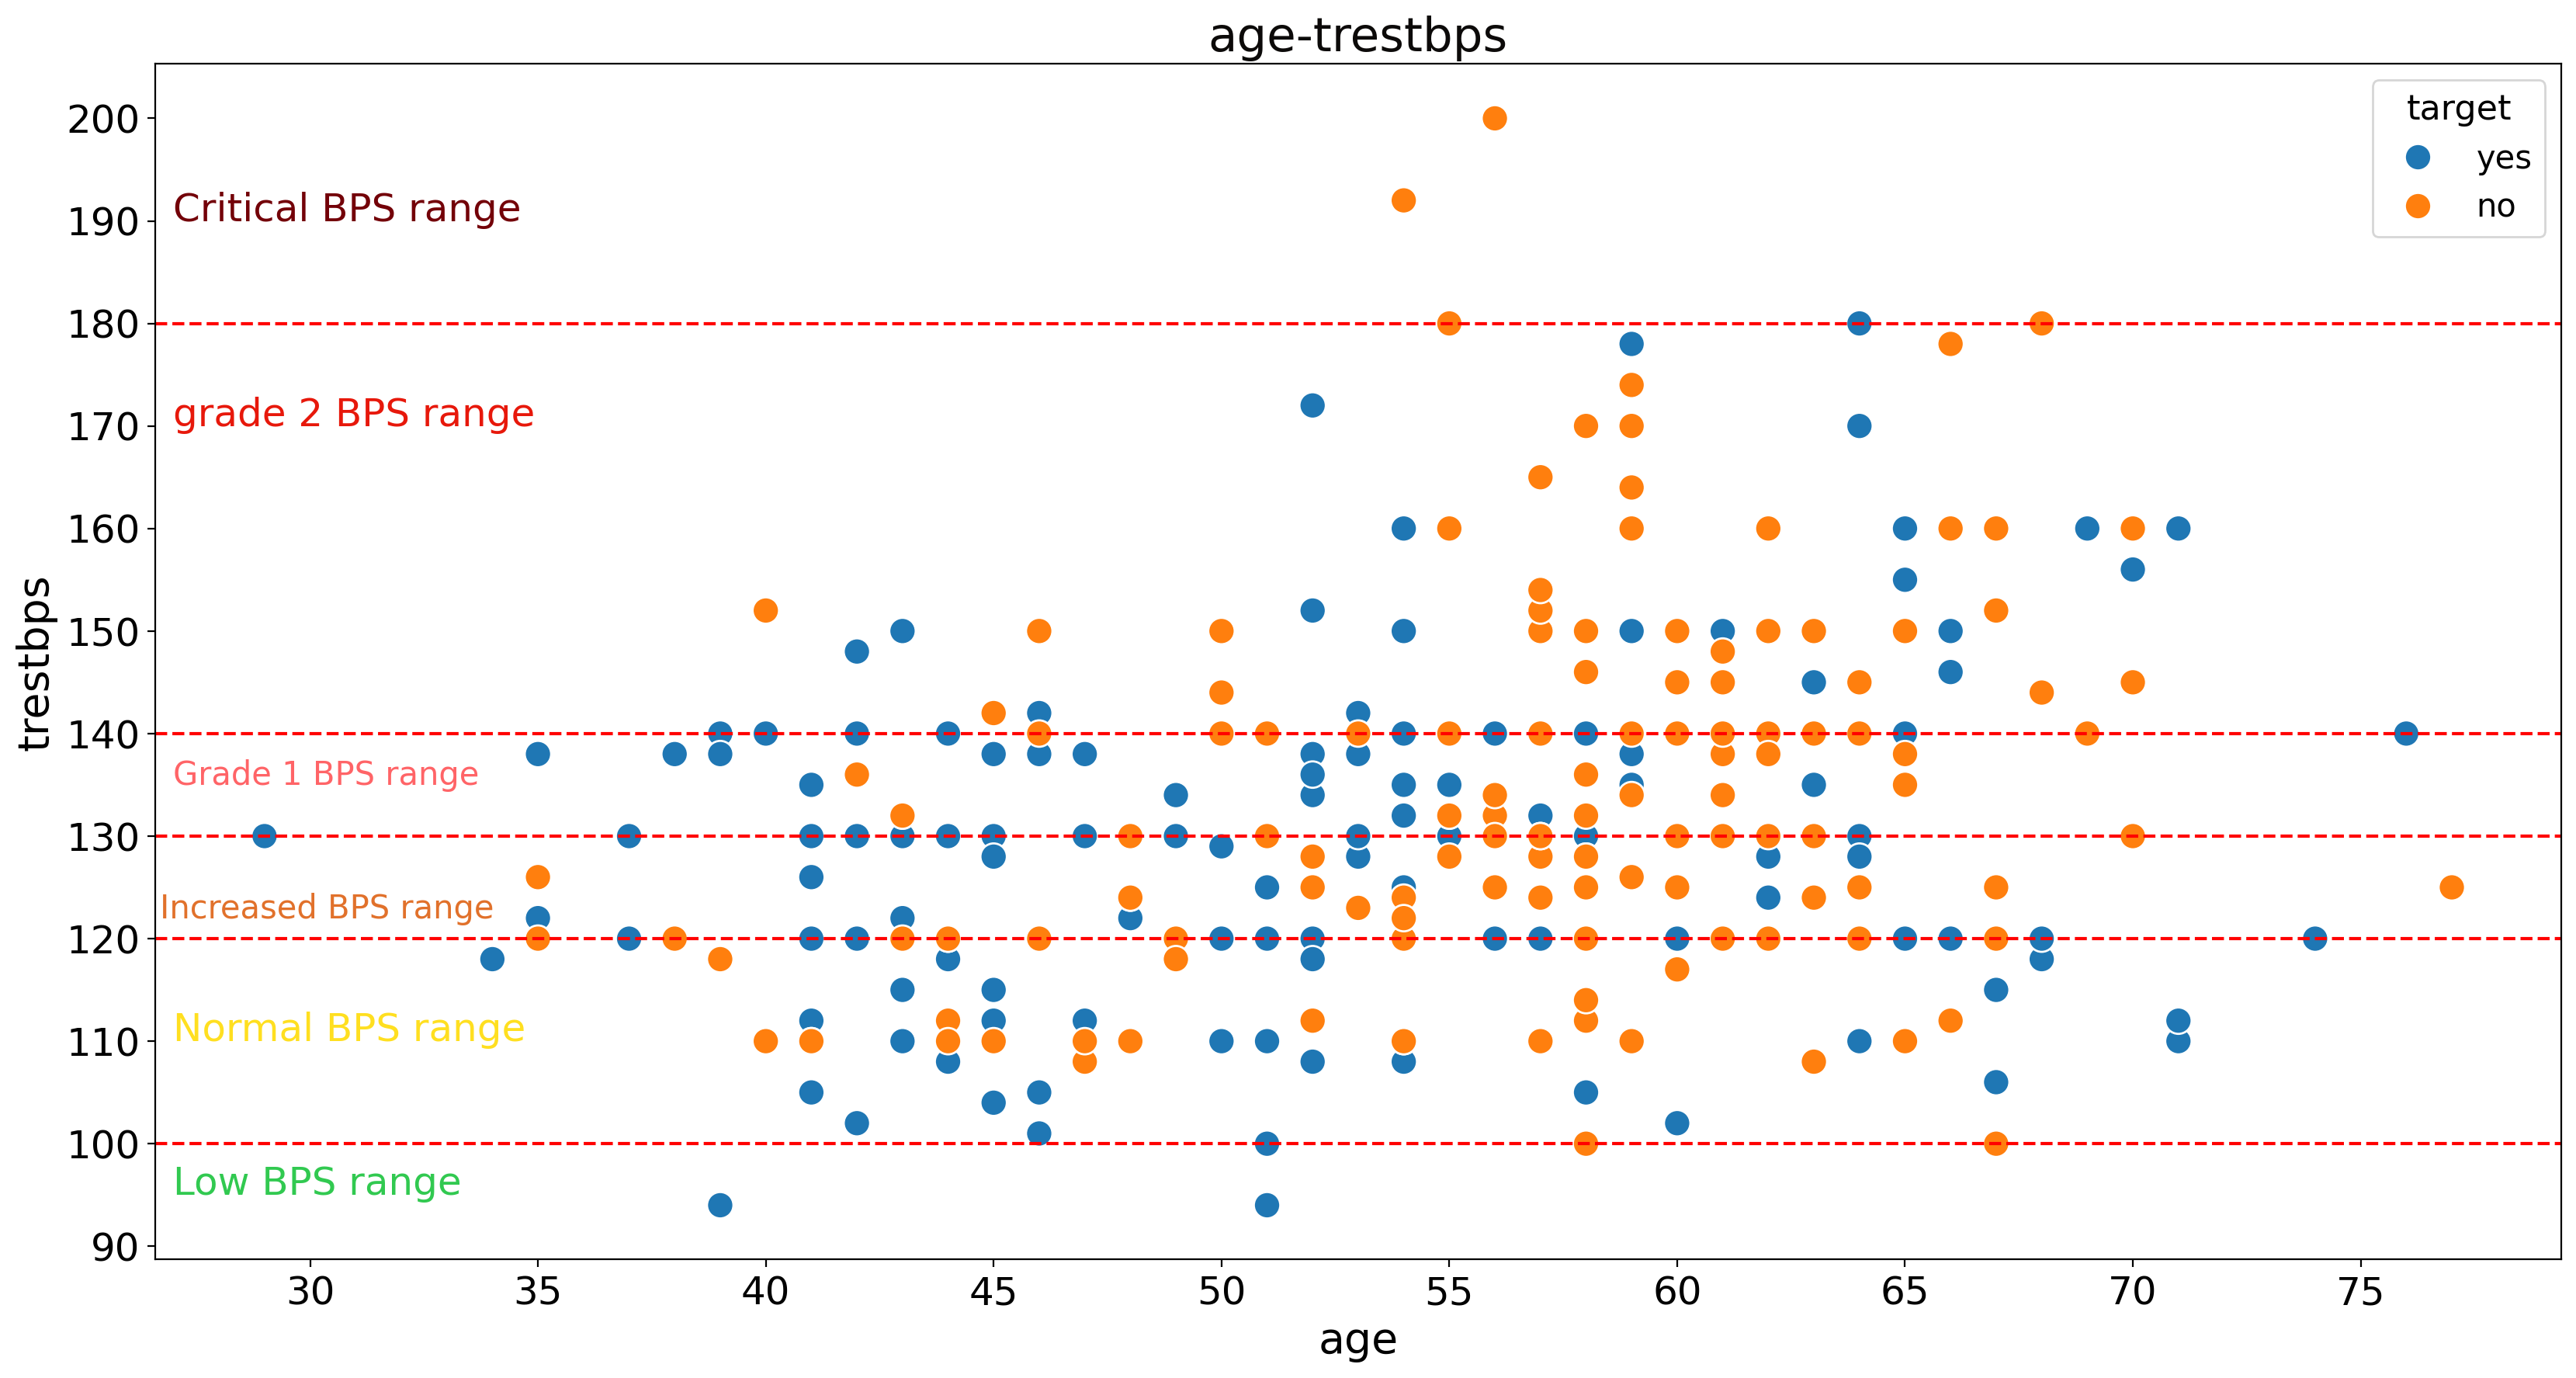

In [643]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x=df["age"], y=df["trestbps"], s=150, hue="target")
plt.title("age-trestbps", fontdict=font_title, color="#0C0A09")
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("trestbps", fontsize=20)
plt.tick_params(axis="both", labelsize=font_axis)
plt.xticks(range(30, 80, 5))
plt.yticks(range(90, 201, 10))
plt.axhline(y=100, color="red", linestyle="--")
plt.axhline(y=120, color="red", linestyle="--")
plt.axhline(y=130, color="red", linestyle="--")
plt.axhline(y=140, color="red", linestyle="--")
plt.axhline(y=180, color="red", linestyle="--")
plt.text(27, 95, s="Low BPS range", fontsize=18, color="#31C950")
plt.text(27, 110, s="Normal BPS range", fontsize=18, color="#FFDF20")
plt.text(26.7, 122, s="Increased BPS range", fontsize=15, color="#E1712B")
plt.text(27, 135, s="Grade 1 BPS range", fontsize=15, color="#FF6467")
plt.text(27, 170, s="grade 2 BPS range", fontsize=18, color="#E7180B")
plt.text(27, 190, s="Critical BPS range", fontsize=18, color="#730008")
plt.legend(title="target", fontsize=15, title_fontsize=16)
plt.show()

<font size=8 face="time new roman">
In the graph above:<br>
Blood pressure at rest for different ages<br>
Normal blood pressure range: less than 120<br>
Raised blood pressure range: between 120 and 129<br>
Stage 1 high blood pressure range: between 130 and 140<br>
Stage 2 high blood pressure range: between 140 and 180<br>
Critical blood pressure range: above 180<br>
I have marked these<br>
There are 5 samples above 180 which are probably outliers so it is possible that these 5 people had very high blood pressure.<br>
Most of the samples are between 120 and 143 on the y-axis.<br>
There is no particular correlation between them.

<font size=8 face="zar">
**Note**:<br>
Most patients are below the 140 range.<br>
A bit strange!<br>
So it is not a good measure for measuring heart patients.

# columns age and chol

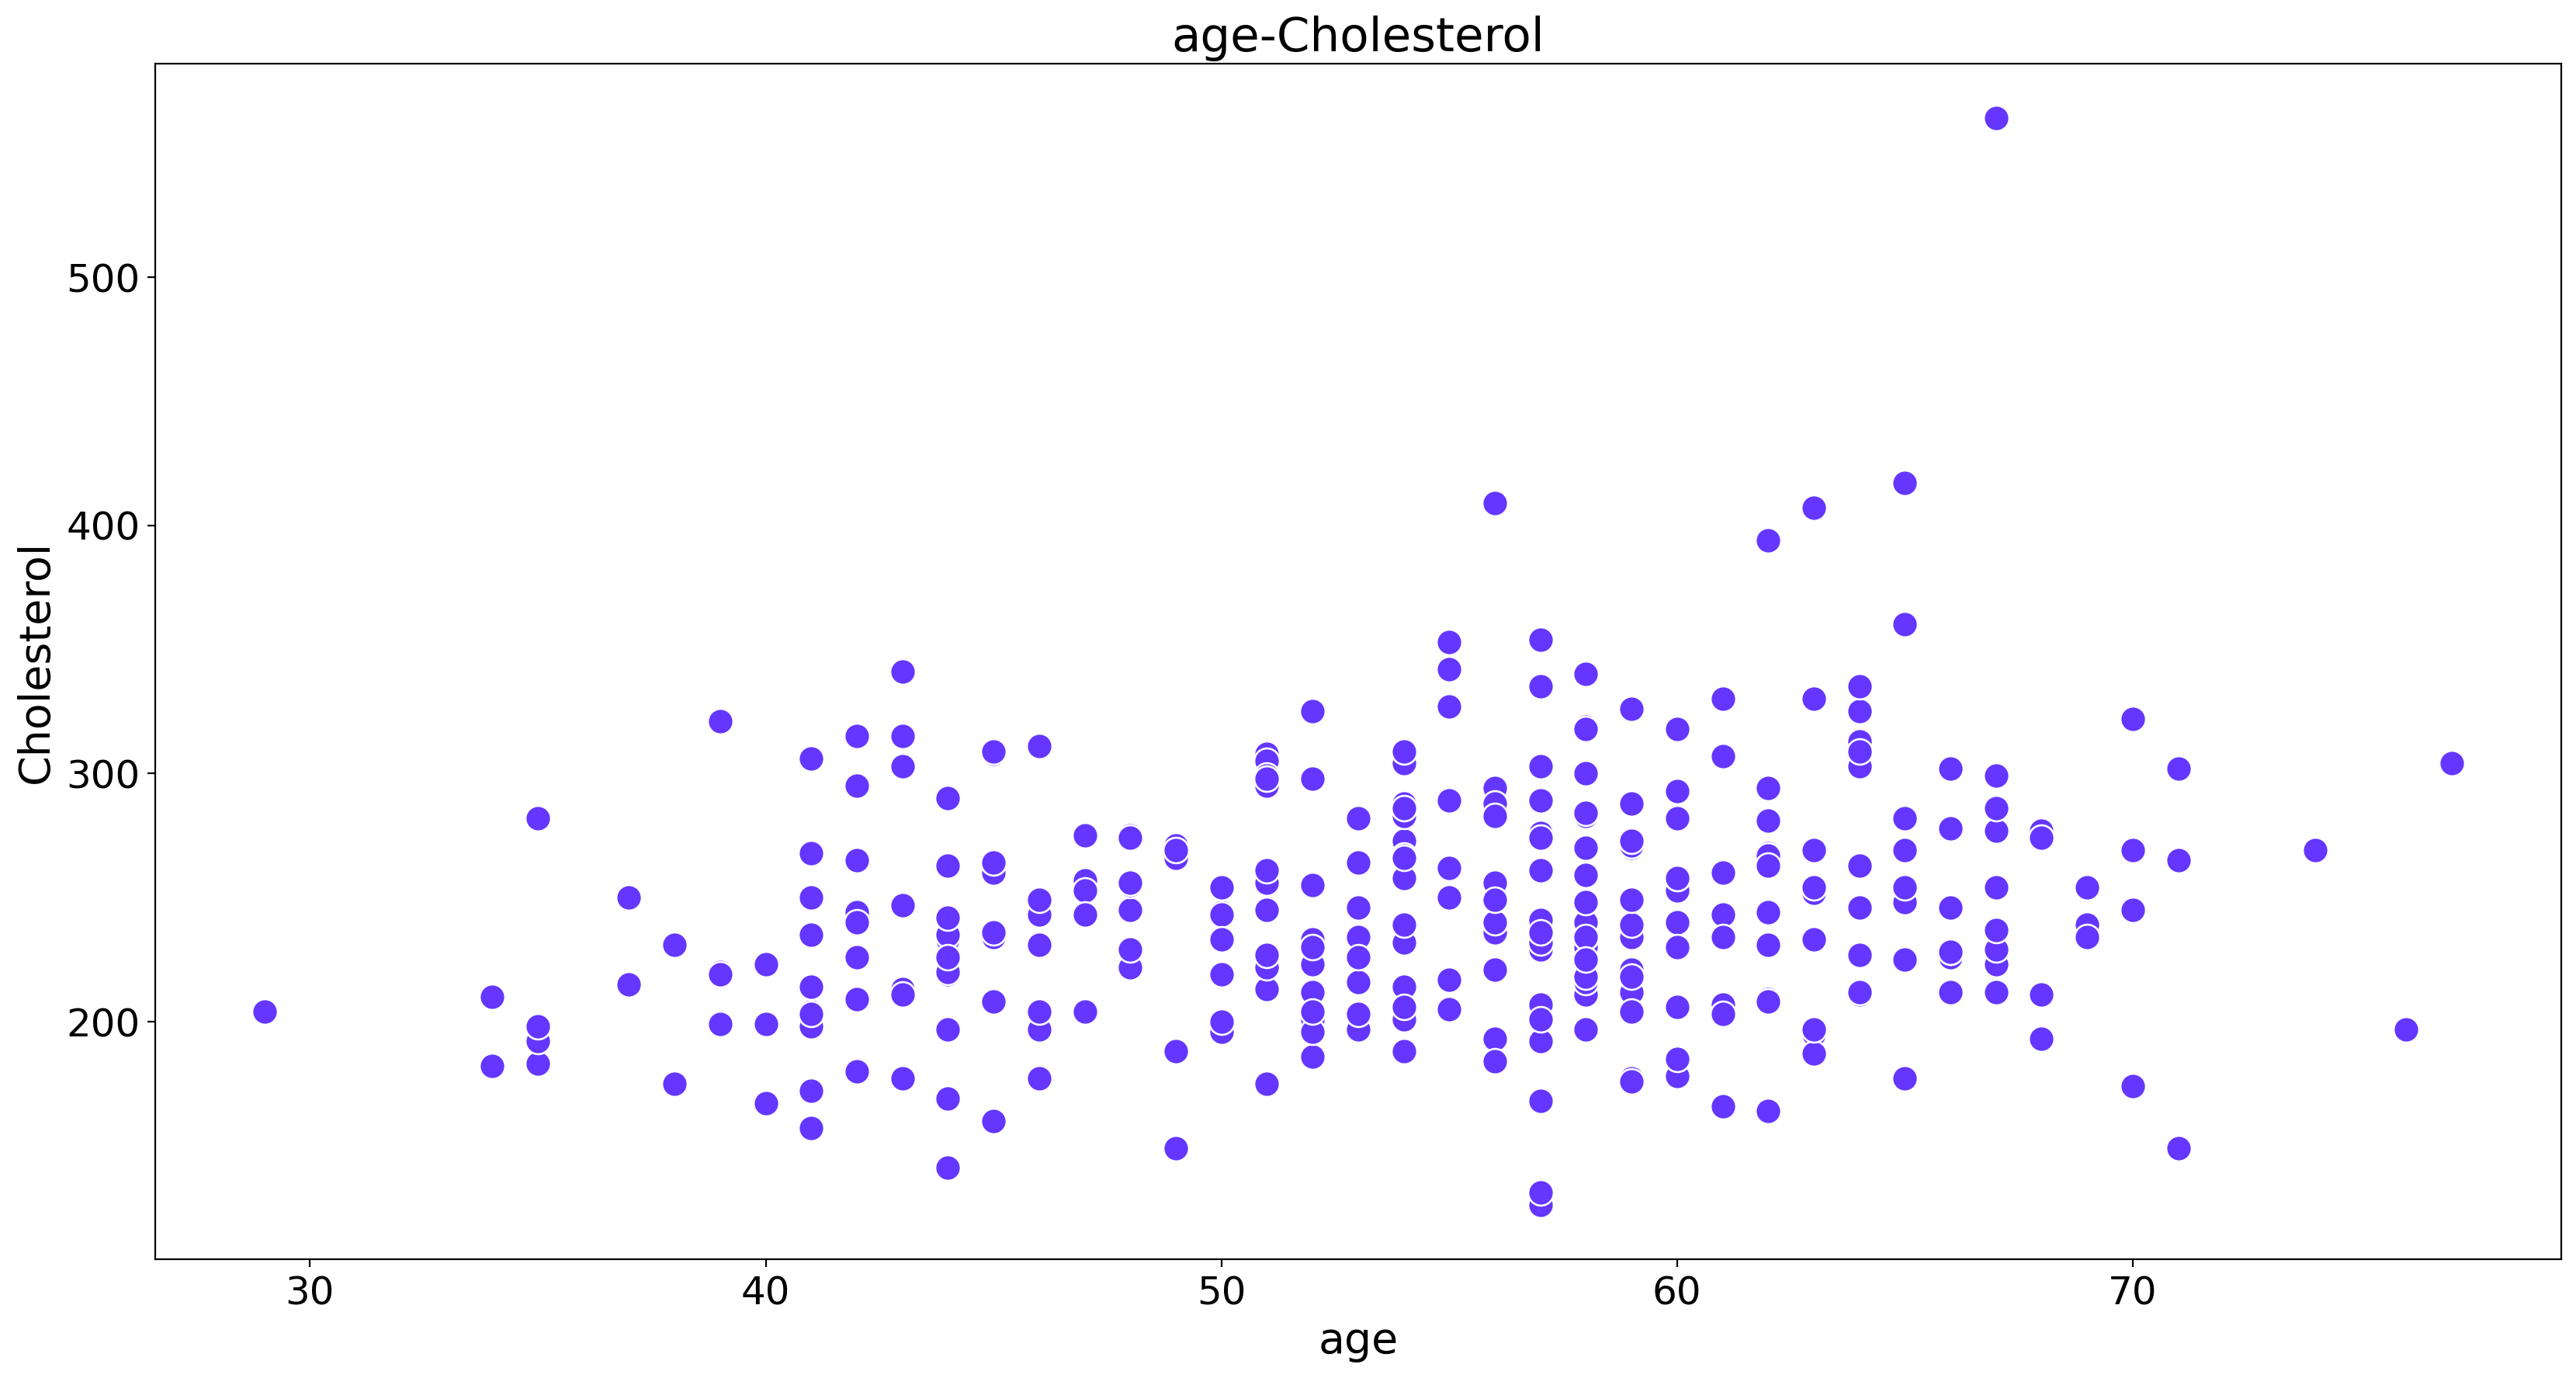

In [644]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x=df["age"], y=df["chol"], s=140, color="#6536FF")
plt.title("age-Cholesterol", fontsize=22)
plt.xlabel("age", fontsize=20)
plt.ylabel("Cholesterol", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
plt.show()

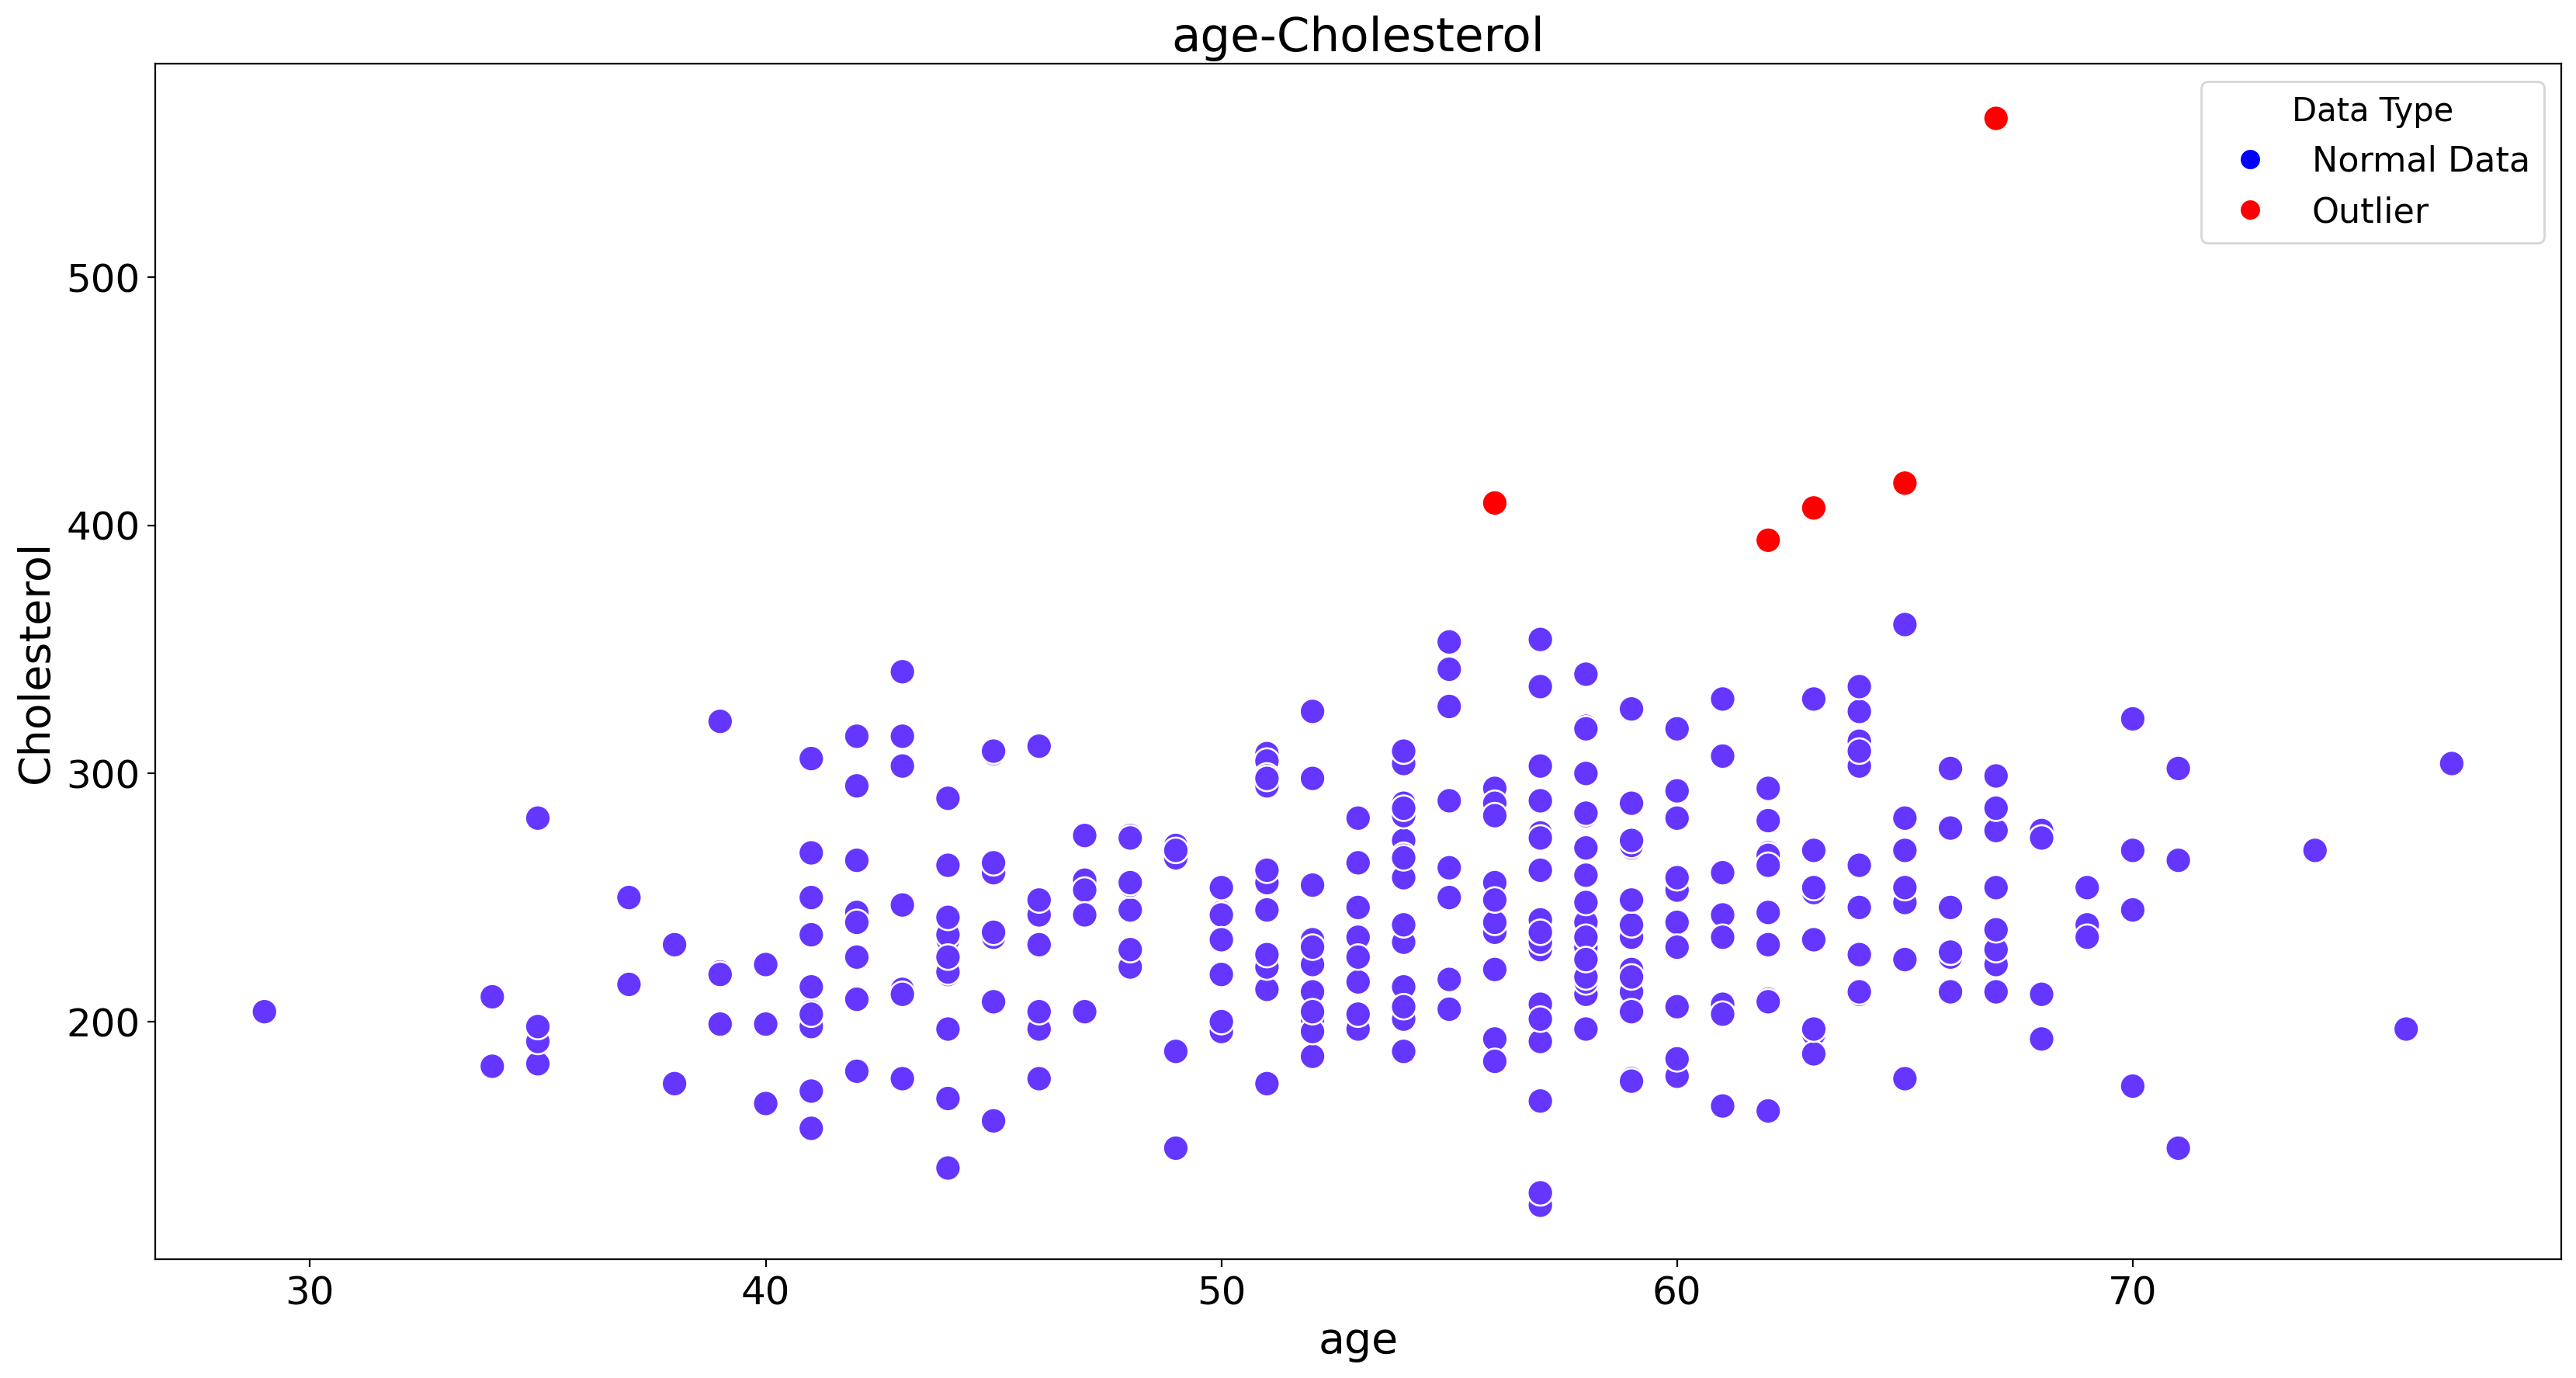

In [645]:
plt.figure(figsize=(20, 10), dpi=200)
colors_outlier = df["chol"].apply(lambda x: "red" if (x >= 390) else "#6536FF")
sns.scatterplot(data=df, x=df["age"], y=df["chol"], s=140, c=colors_outlier)
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Normal Data",
        markerfacecolor="blue",
        markersize=10,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Outlier",
        markerfacecolor="red",
        markersize=10,
    ),
]

plt.legend(
    handles=legend_elements,
    loc="best",
    fontsize=16,
    title="Data Type",
    title_fontsize=15,
)
plt.title("age-Cholesterol", fontsize=22)
plt.xlabel("age", fontsize=20)
plt.ylabel("Cholesterol", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
plt.show()

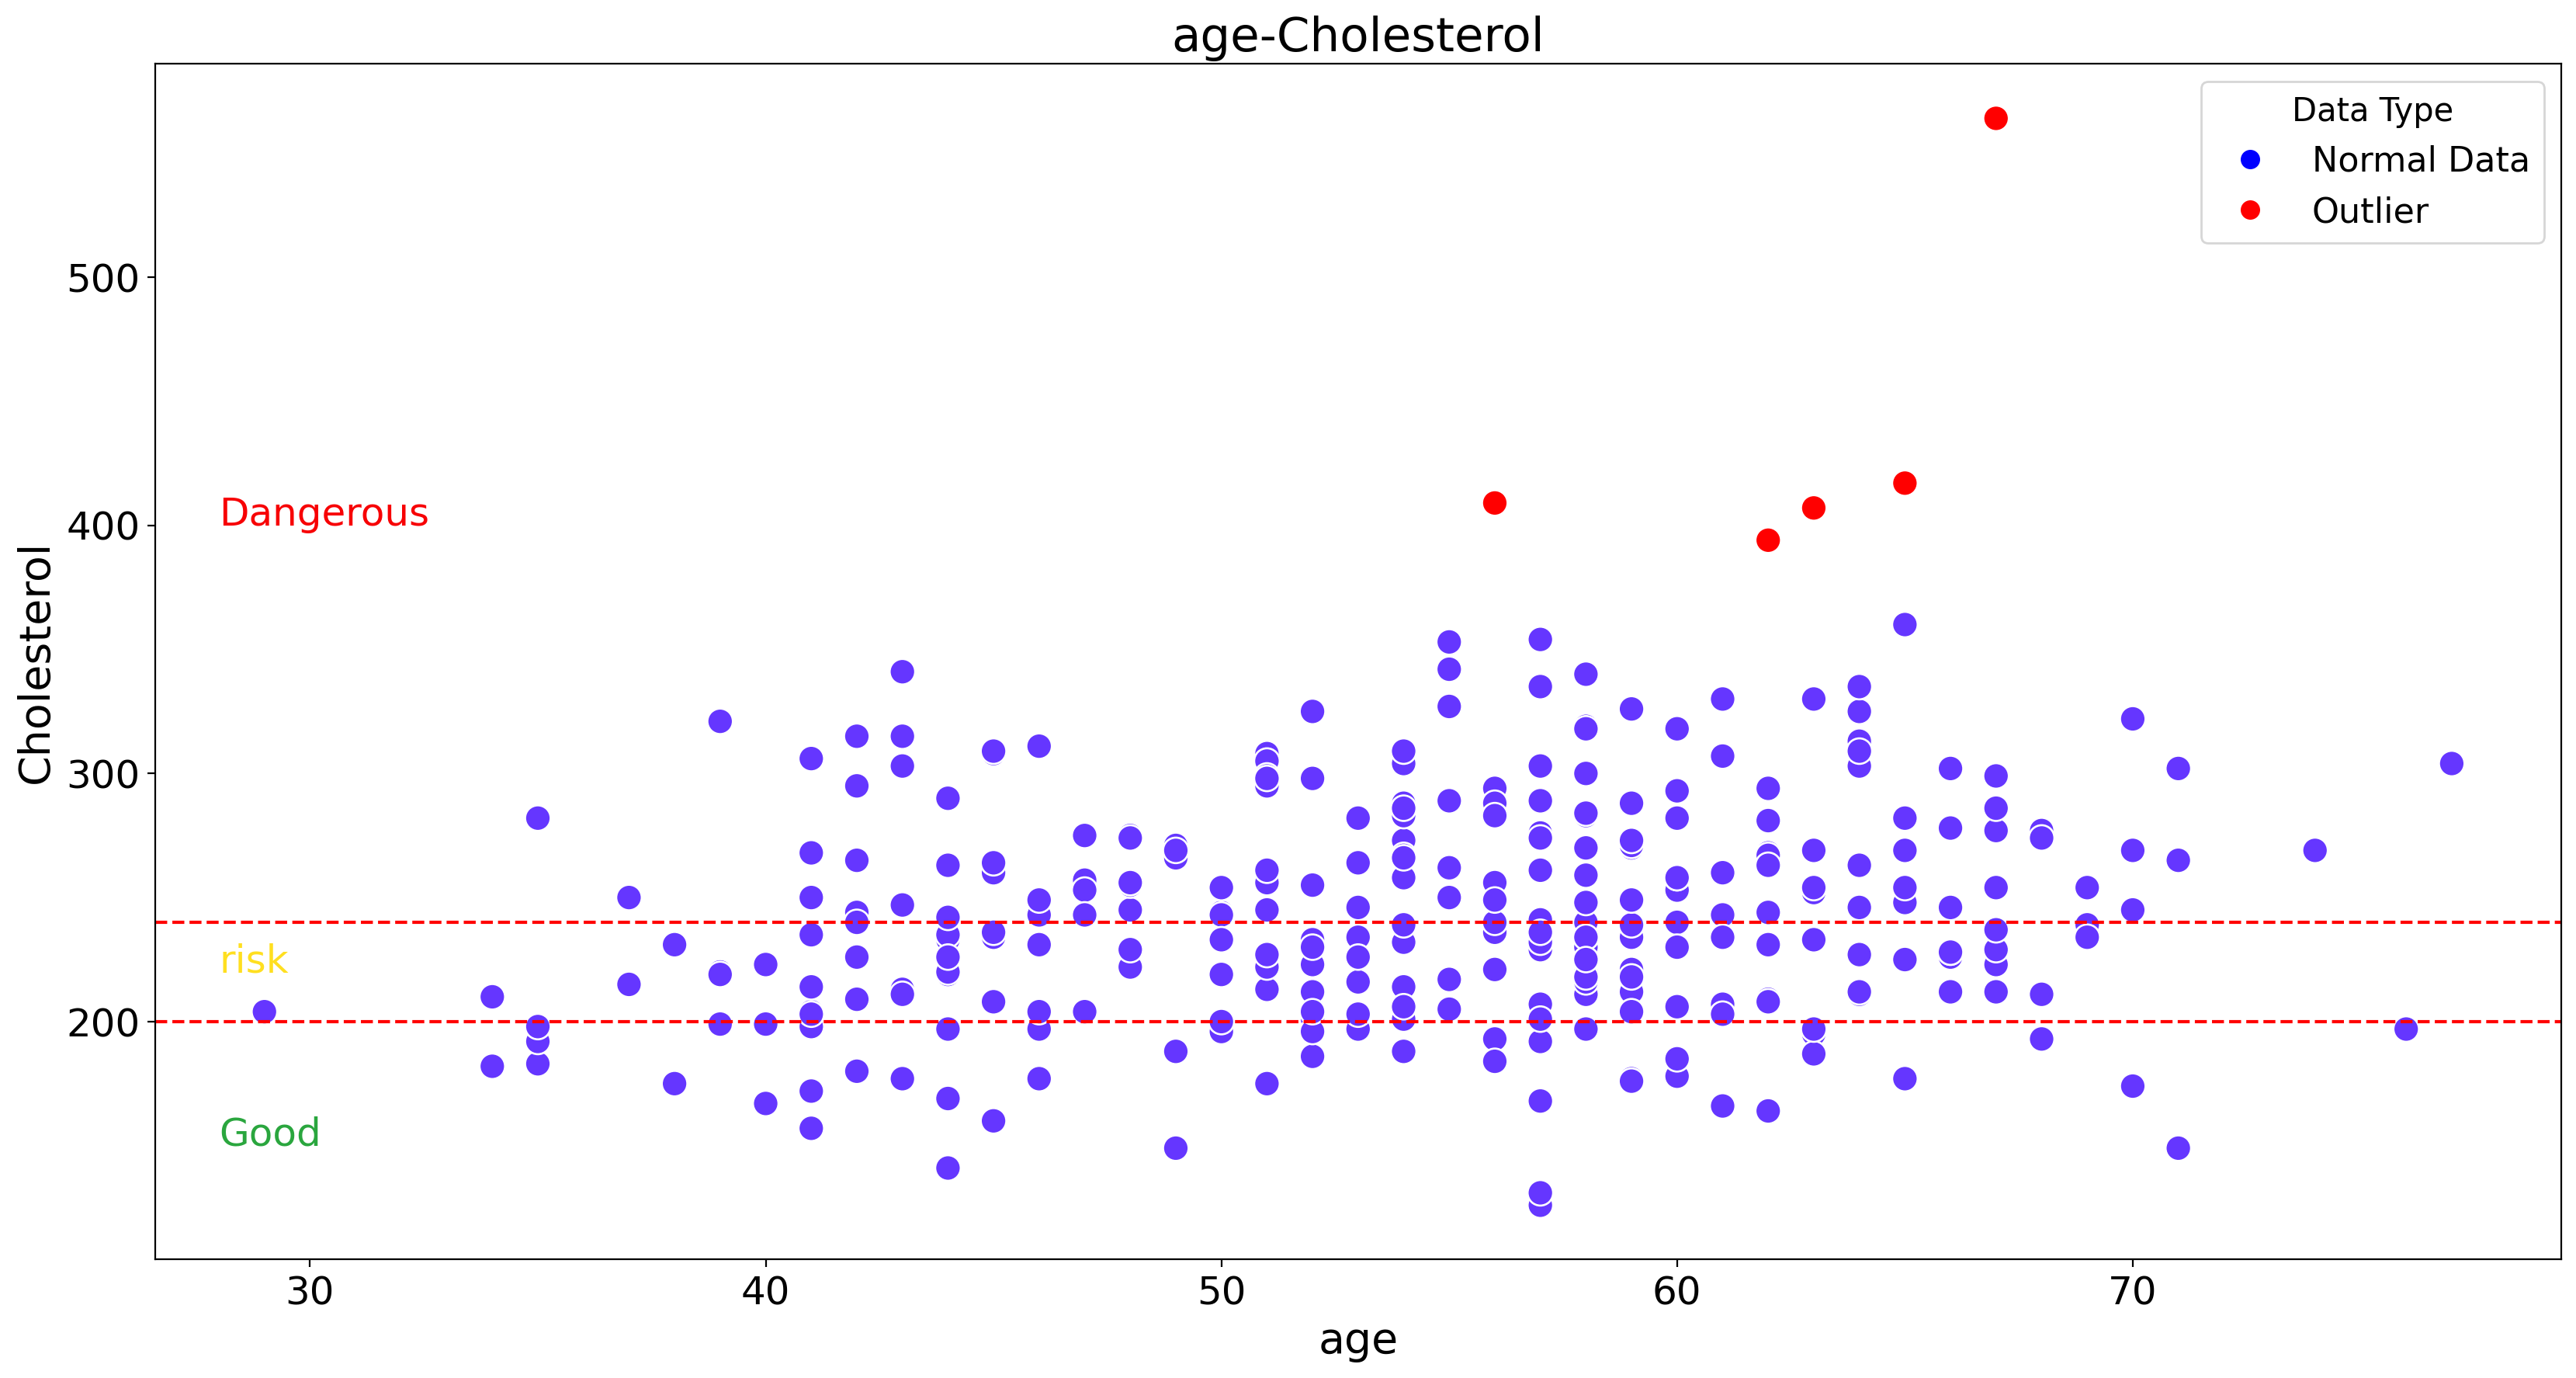

In [646]:
plt.figure(figsize=(20, 10), dpi=200)
colors_outlier = df["chol"].apply(lambda x: "red" if (x >= 390) else "#6536FF")
sns.scatterplot(data=df, x=df["age"], y=df["chol"], s=140, c=colors_outlier)
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Normal Data",
        markerfacecolor="blue",
        markersize=10,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Outlier",
        markerfacecolor="red",
        markersize=10,
    ),
]

plt.legend(
    handles=legend_elements,
    loc="best",
    fontsize=16,
    title="Data Type",
    title_fontsize=15,
)

plt.title("age-Cholesterol", fontsize=22)
plt.xlabel("age", fontsize=20)
plt.ylabel("Cholesterol", fontsize=20)
plt.tick_params(axis="both", labelsize=18)
plt.axhline(y=200, color="red", linestyle="--")
plt.axhline(y=240, color="red", linestyle="--")
plt.text(28, 150, s="Good", fontsize=18, color="#2AA63E")
plt.text(28, 220, s="risk", fontsize=18, color="#FFDF20")
plt.text(28, 400, s="Dangerous", fontsize=18, color="#F70004")
plt.show()

<font face="time new roman" size=8>
In this graph:<br>
There are 5 samples that are very far from the other samples, probably outliers and related to people with certain diseases such as familial hypercholesterolemia (a genetic disease that produces very high cholesterol).<br>
I suspect that the data was collected from hospitalized or high-risk patients, not from the general population.<br>
Most of the data is between 200 and 300 cholesterol.<br>
I also specified the cholesterol range.<br>
Most people above the danger range are in the very dangerous range.

# columns age and thalach

<font size=8 face="time new roman">
**Note**<br>
What is thalach?<br>
Maximum heart rate during the stress test.<br>
There is a specific formula:<br>
1) The age of the person is subtracted from 220 and the maximum heart rate that should be achieved at that age is obtained.<br>
2) The resulting number is multiplied by 0.85 because, in principle, the person's heart rate should be greater than 85% of the value obtained in the stress test.<br>
formula:<br>
HRmax = 220 - age<br>
Target HR = HRmax * 0.85<br><br>
The scope of this test:<br>
1) If the heart rate is between 85 and 100% of the number obtained: the test is diagnostically valid.<br>
2) If it is below 85%: the test is incomplete / non-diagnostic (unless there is a medical reason), the heart may not be able to respond appropriately or the person is easily tired.<br>
3) If it is above 100%: it may indicate an abnormal heart rhythm or an overactive response; a more detailed examination should be performed.<br>
4) If it is above 90% and is accompanied by pain, shortness of breath, dizziness: the test should be stopped; it may indicate ischemia or a serious heart problem.<br>

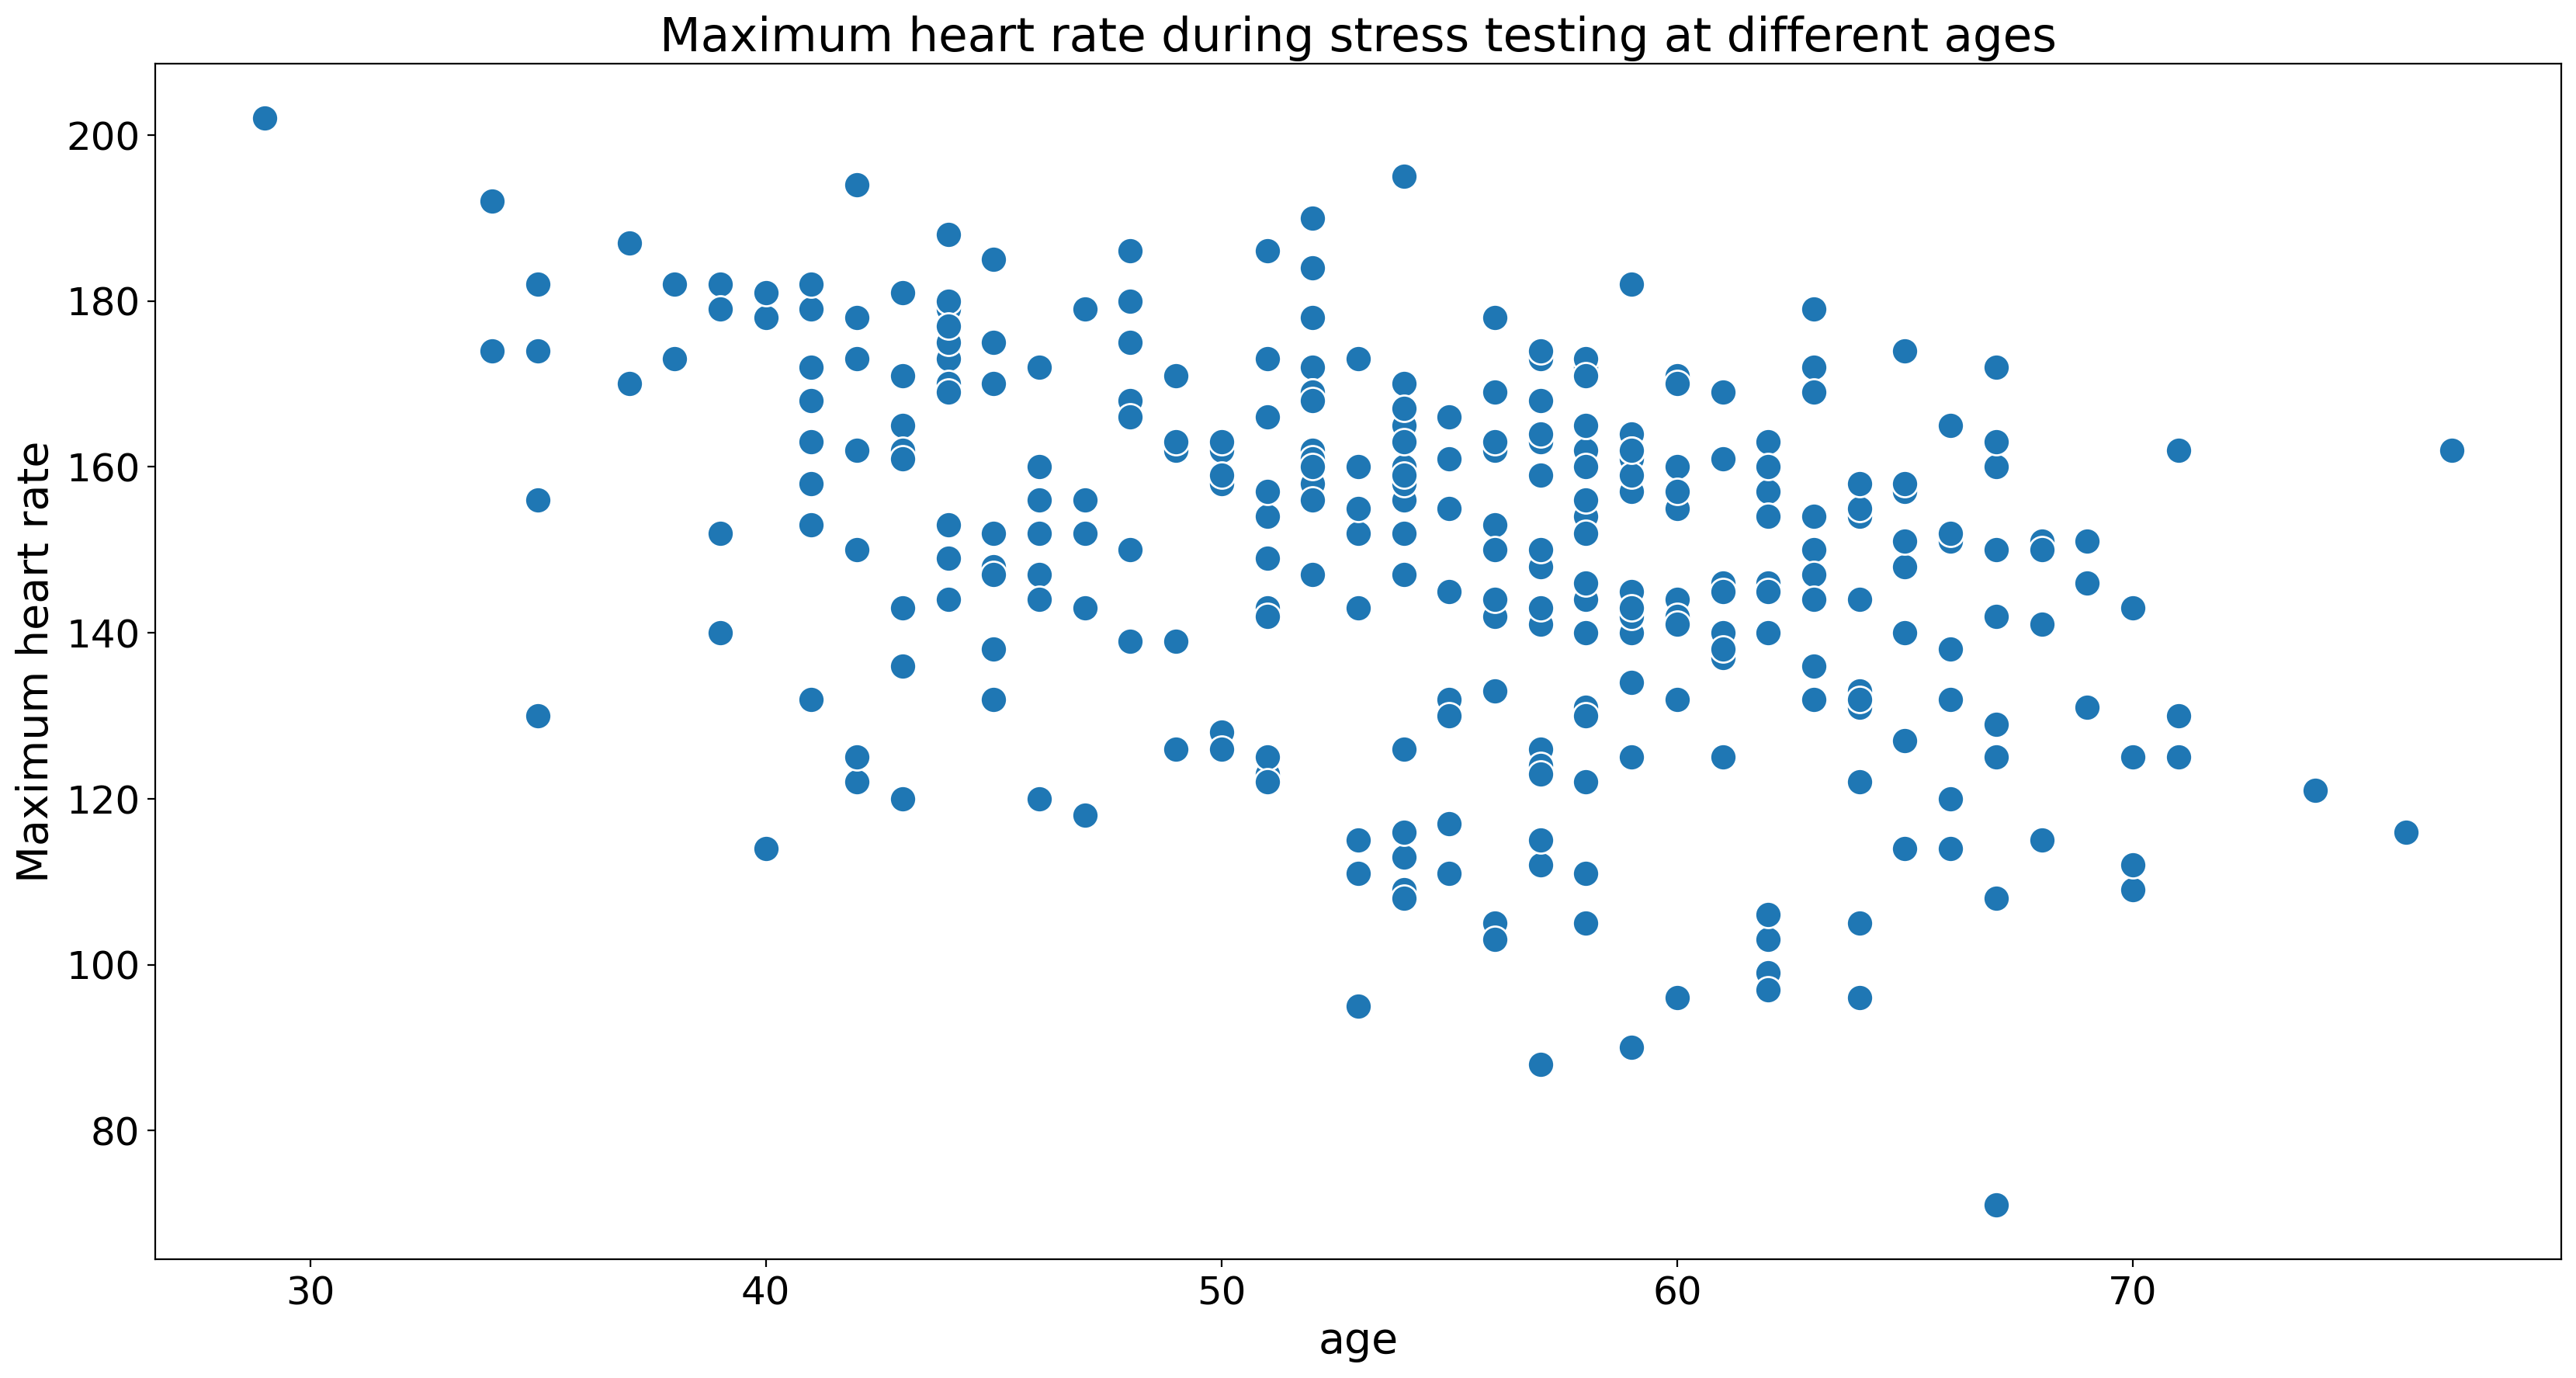

In [647]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x=df["age"], y=df["thalach"], s=150)
colors_outlier = df["thalach"].apply(lambda x: "red" if (x < 80) else "blue")
plt.title(
    "Maximum heart rate during stress testing at different ages", fontdict=font_title
)
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("Maximum heart rate", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=font_axis)
plt.show()

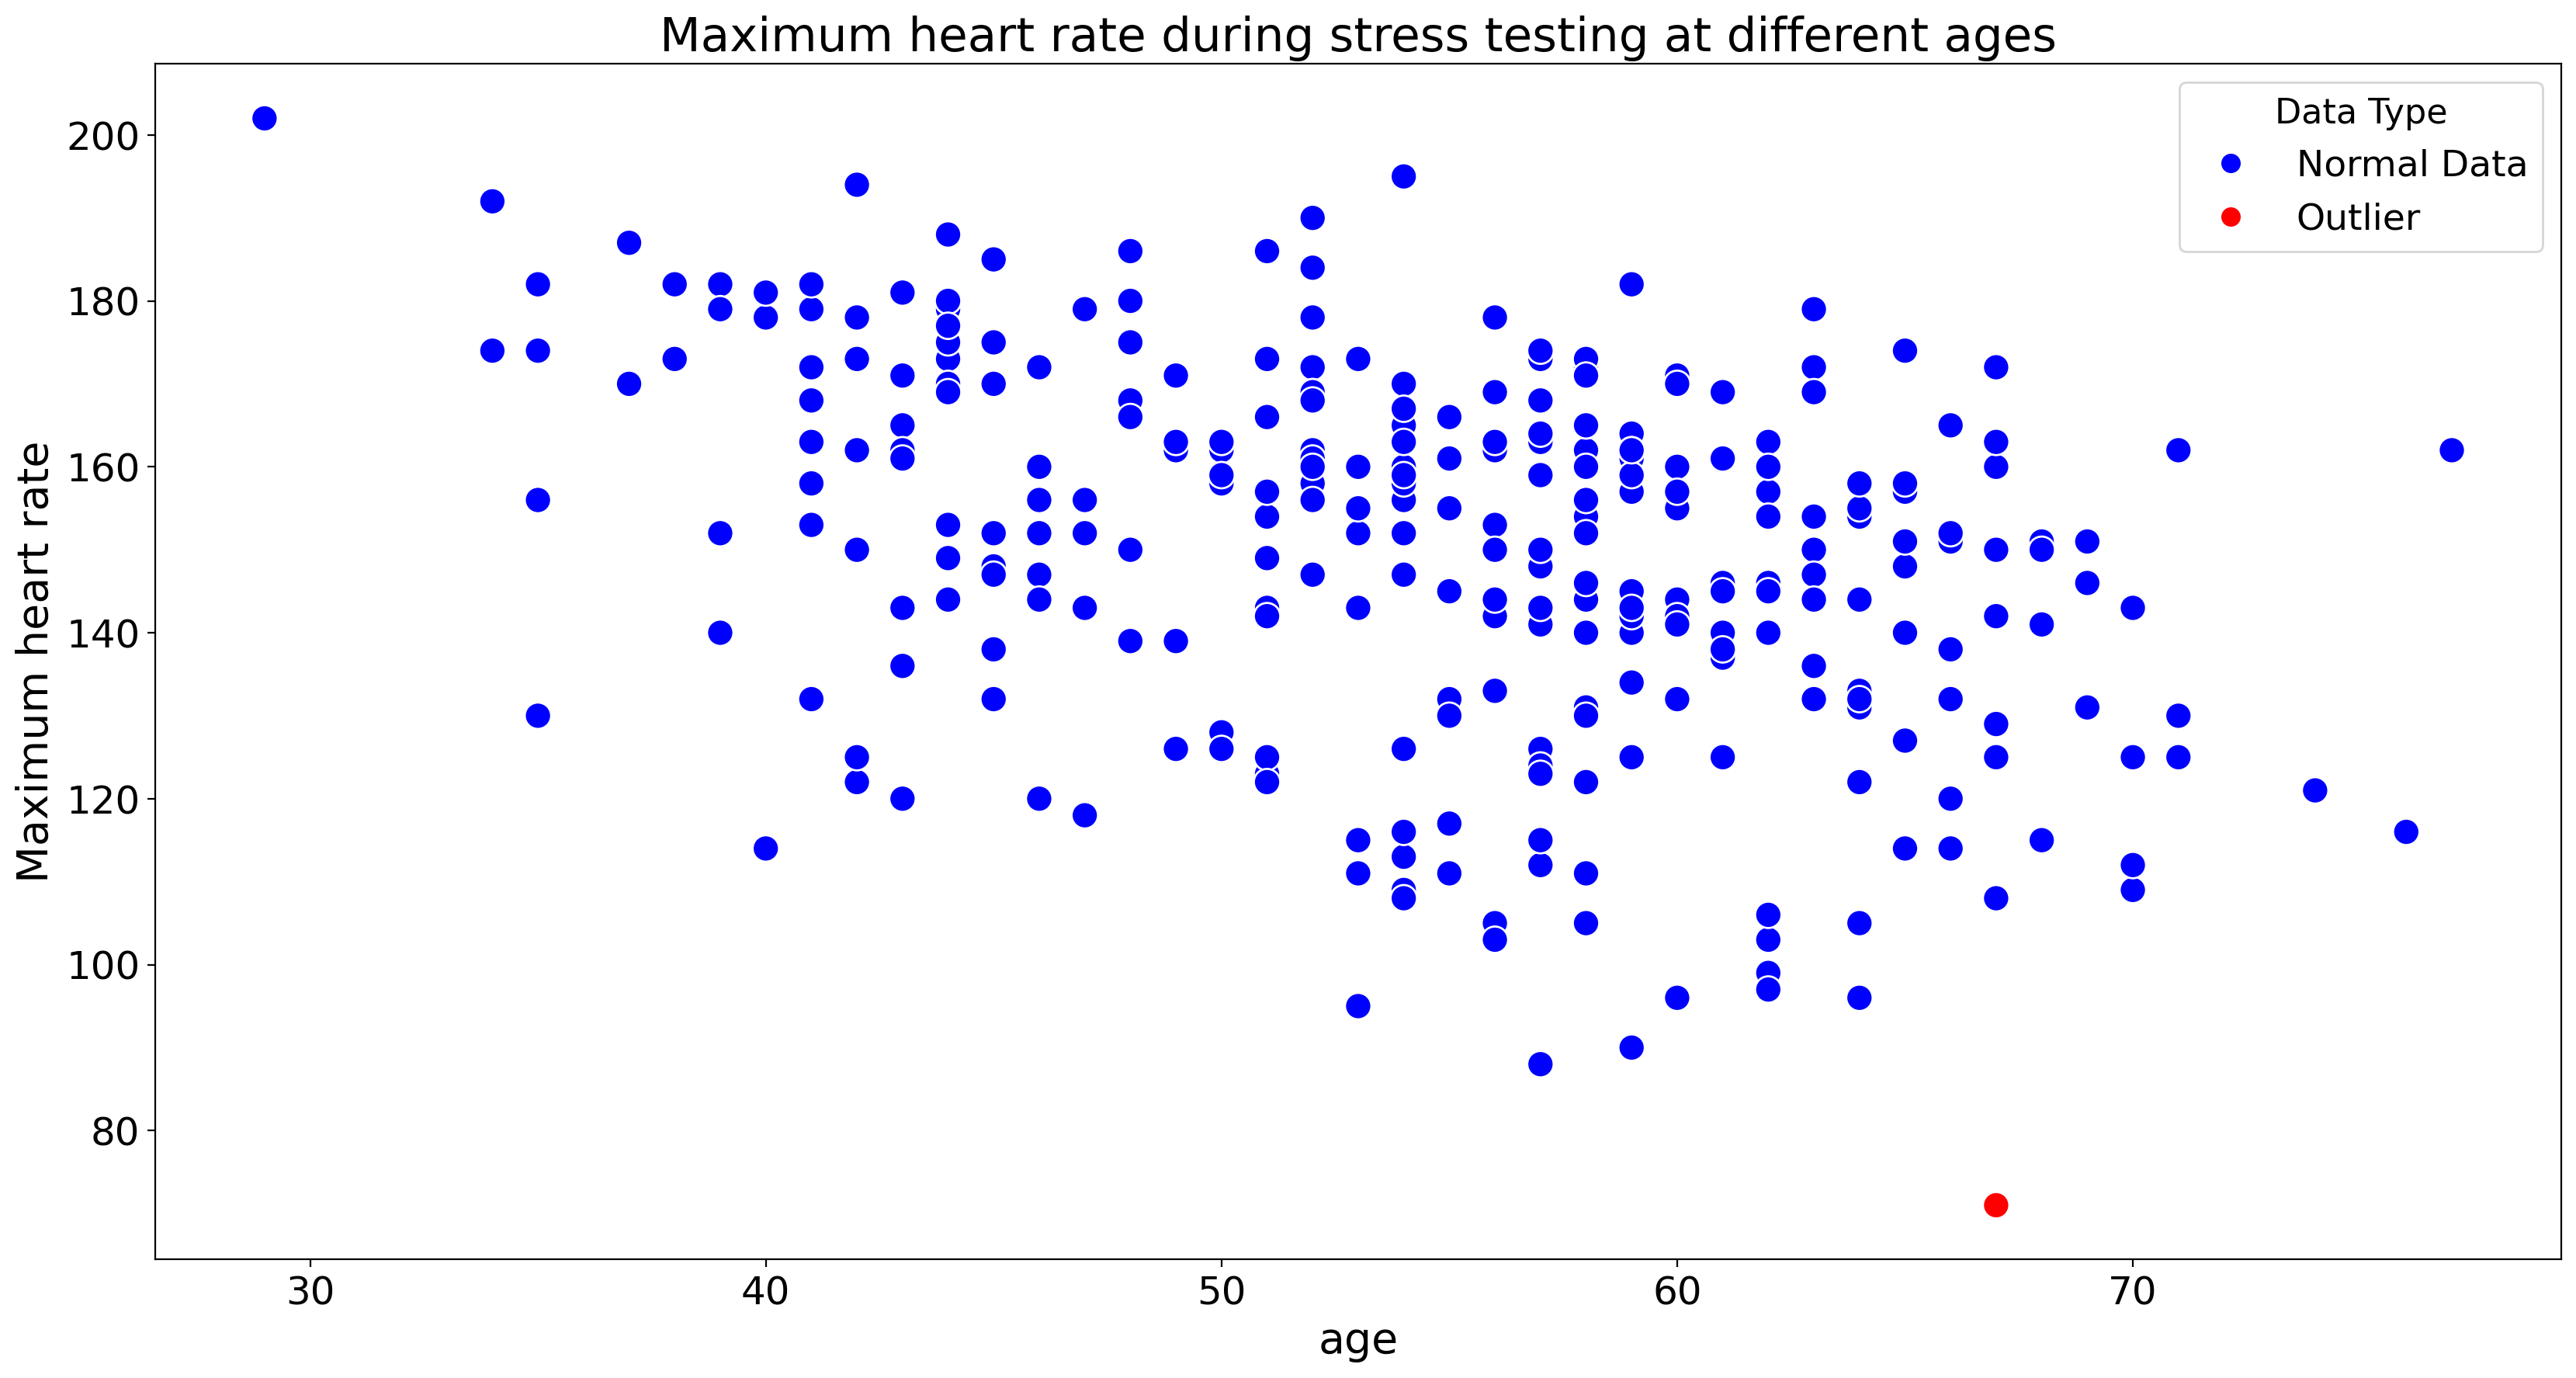

In [648]:
plt.figure(figsize=(20, 10), dpi=200)
colors_outlier = df["thalach"].apply(lambda x: "red" if (x < 80) else "blue")
sns.scatterplot(data=df, x=df["age"], y=df["thalach"], s=150, c=colors_outlier)
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Normal Data",
        markerfacecolor="blue",
        markersize=10,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Outlier",
        markerfacecolor="red",
        markersize=10,
    ),
]

plt.legend(
    handles=legend_elements,
    loc="best",
    fontsize=17,
    title="Data Type",
    title_fontsize=16,
)
plt.title(
    "Maximum heart rate during stress testing at different ages", fontdict=font_title
)
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("Maximum heart rate", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=font_axis)
plt.show()

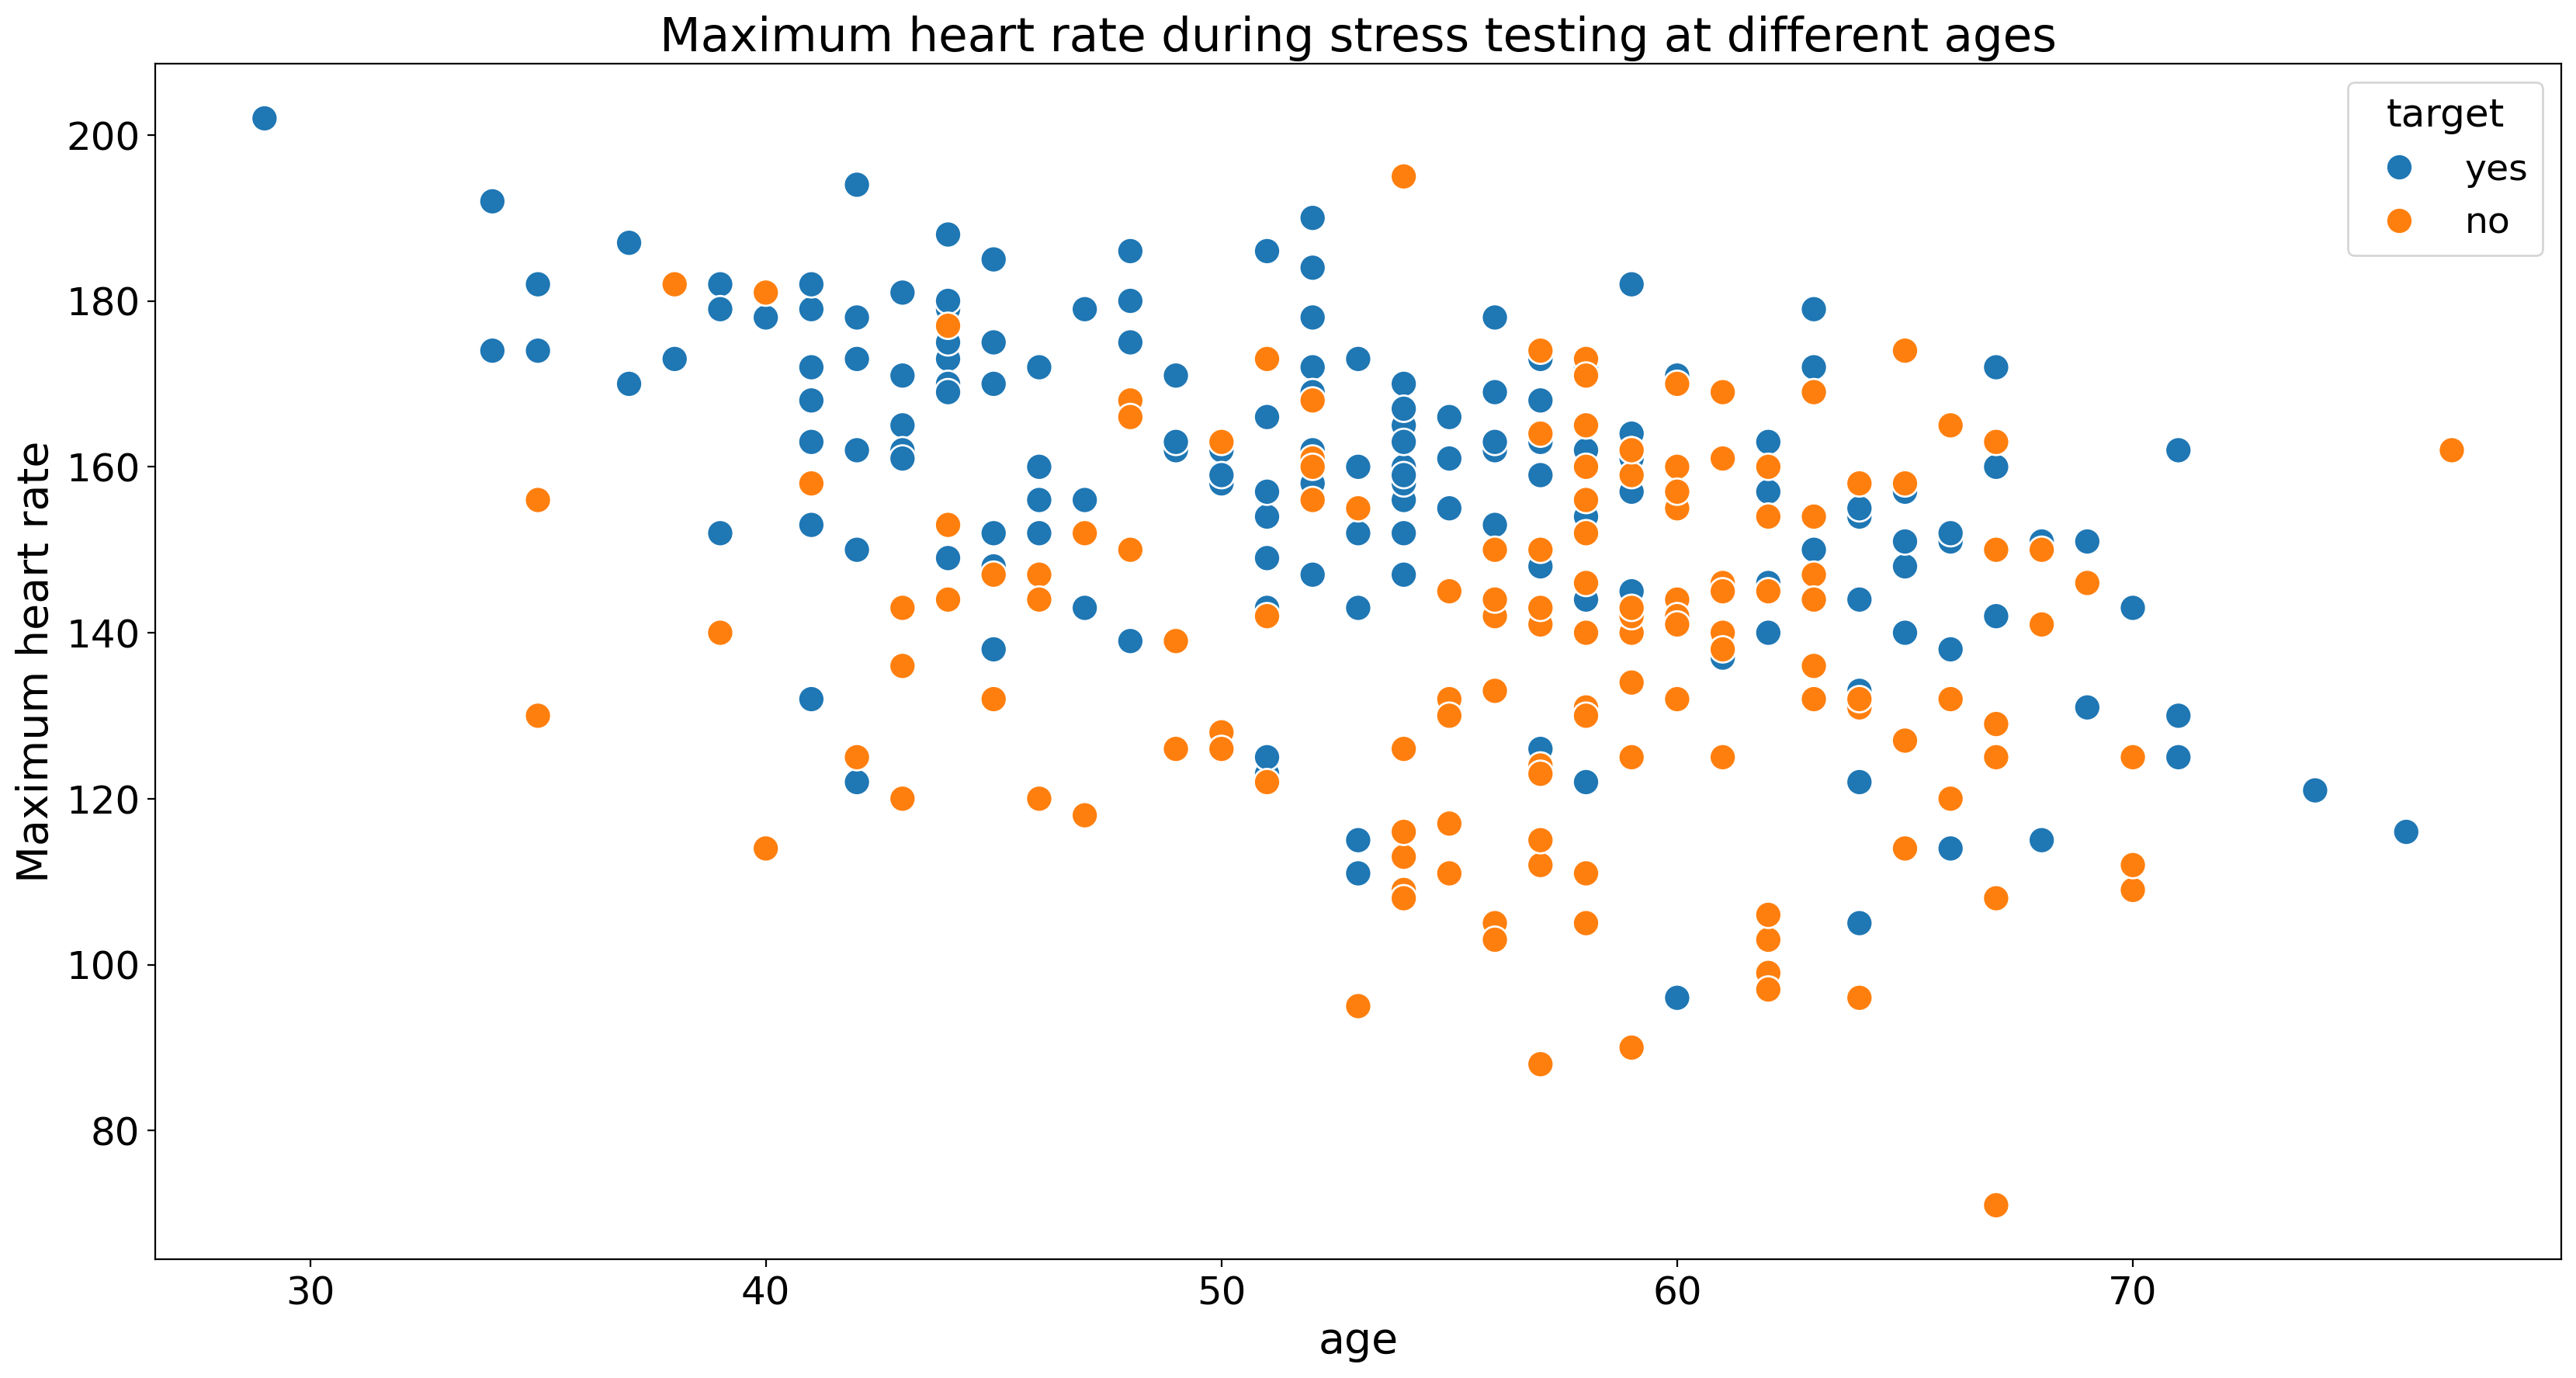

In [649]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x=df["age"], y=df["thalach"], s=150, hue="target")
plt.title(
    "Maximum heart rate during stress testing at different ages", fontdict=font_title
)
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("Maximum heart rate", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=font_axis)
plt.legend(title="target", title_fontsize=18, fontsize=17)
plt.show()

<font size=8 face="time new roman">
Analysis:<br><br>
General relationship between age and heart rate:<br>
With age, maximum heart rate usually decreases. This is a normal physiological process and is clearly visible in the graph.<br>
Most of the points on the right side of the graph (older age) are in the lower heart rate zone.<br>
Comparing patients with heart disease (target = yes, blue) and without it (target = no, orange):<br>
People without heart disease (orange) are more likely to be in the lower heart rate zone.<br>
People with heart disease (blue) are present in a wider range of heart rates, but often have higher heart rates (especially at younger ages).<br>
This may indicate that people with heart disease tend to have higher heart rates on stress tests, or that at some ages, a high heart rate can be a sign of a problem.<br>
High dispersion: Despite the overall trend, there is a large dispersion in the data, suggesting that other factors are also involved in heart rate.

# now delete outlier

In [650]:
outlier_trestbps = df[(df["trestbps"] >= 181)].index
outlier_chol = df[(df["chol"]) >= 390].index
outlier_thalach = df[df["thalach"] < 80].index

df.drop(outlier_trestbps, inplace=True)
df.drop(outlier_chol, inplace=True)
df.drop(outlier_thalach, inplace=True)

# Main analyses

<font size=8 face="time new roman">
How many people with high cholesterol have heart disease?

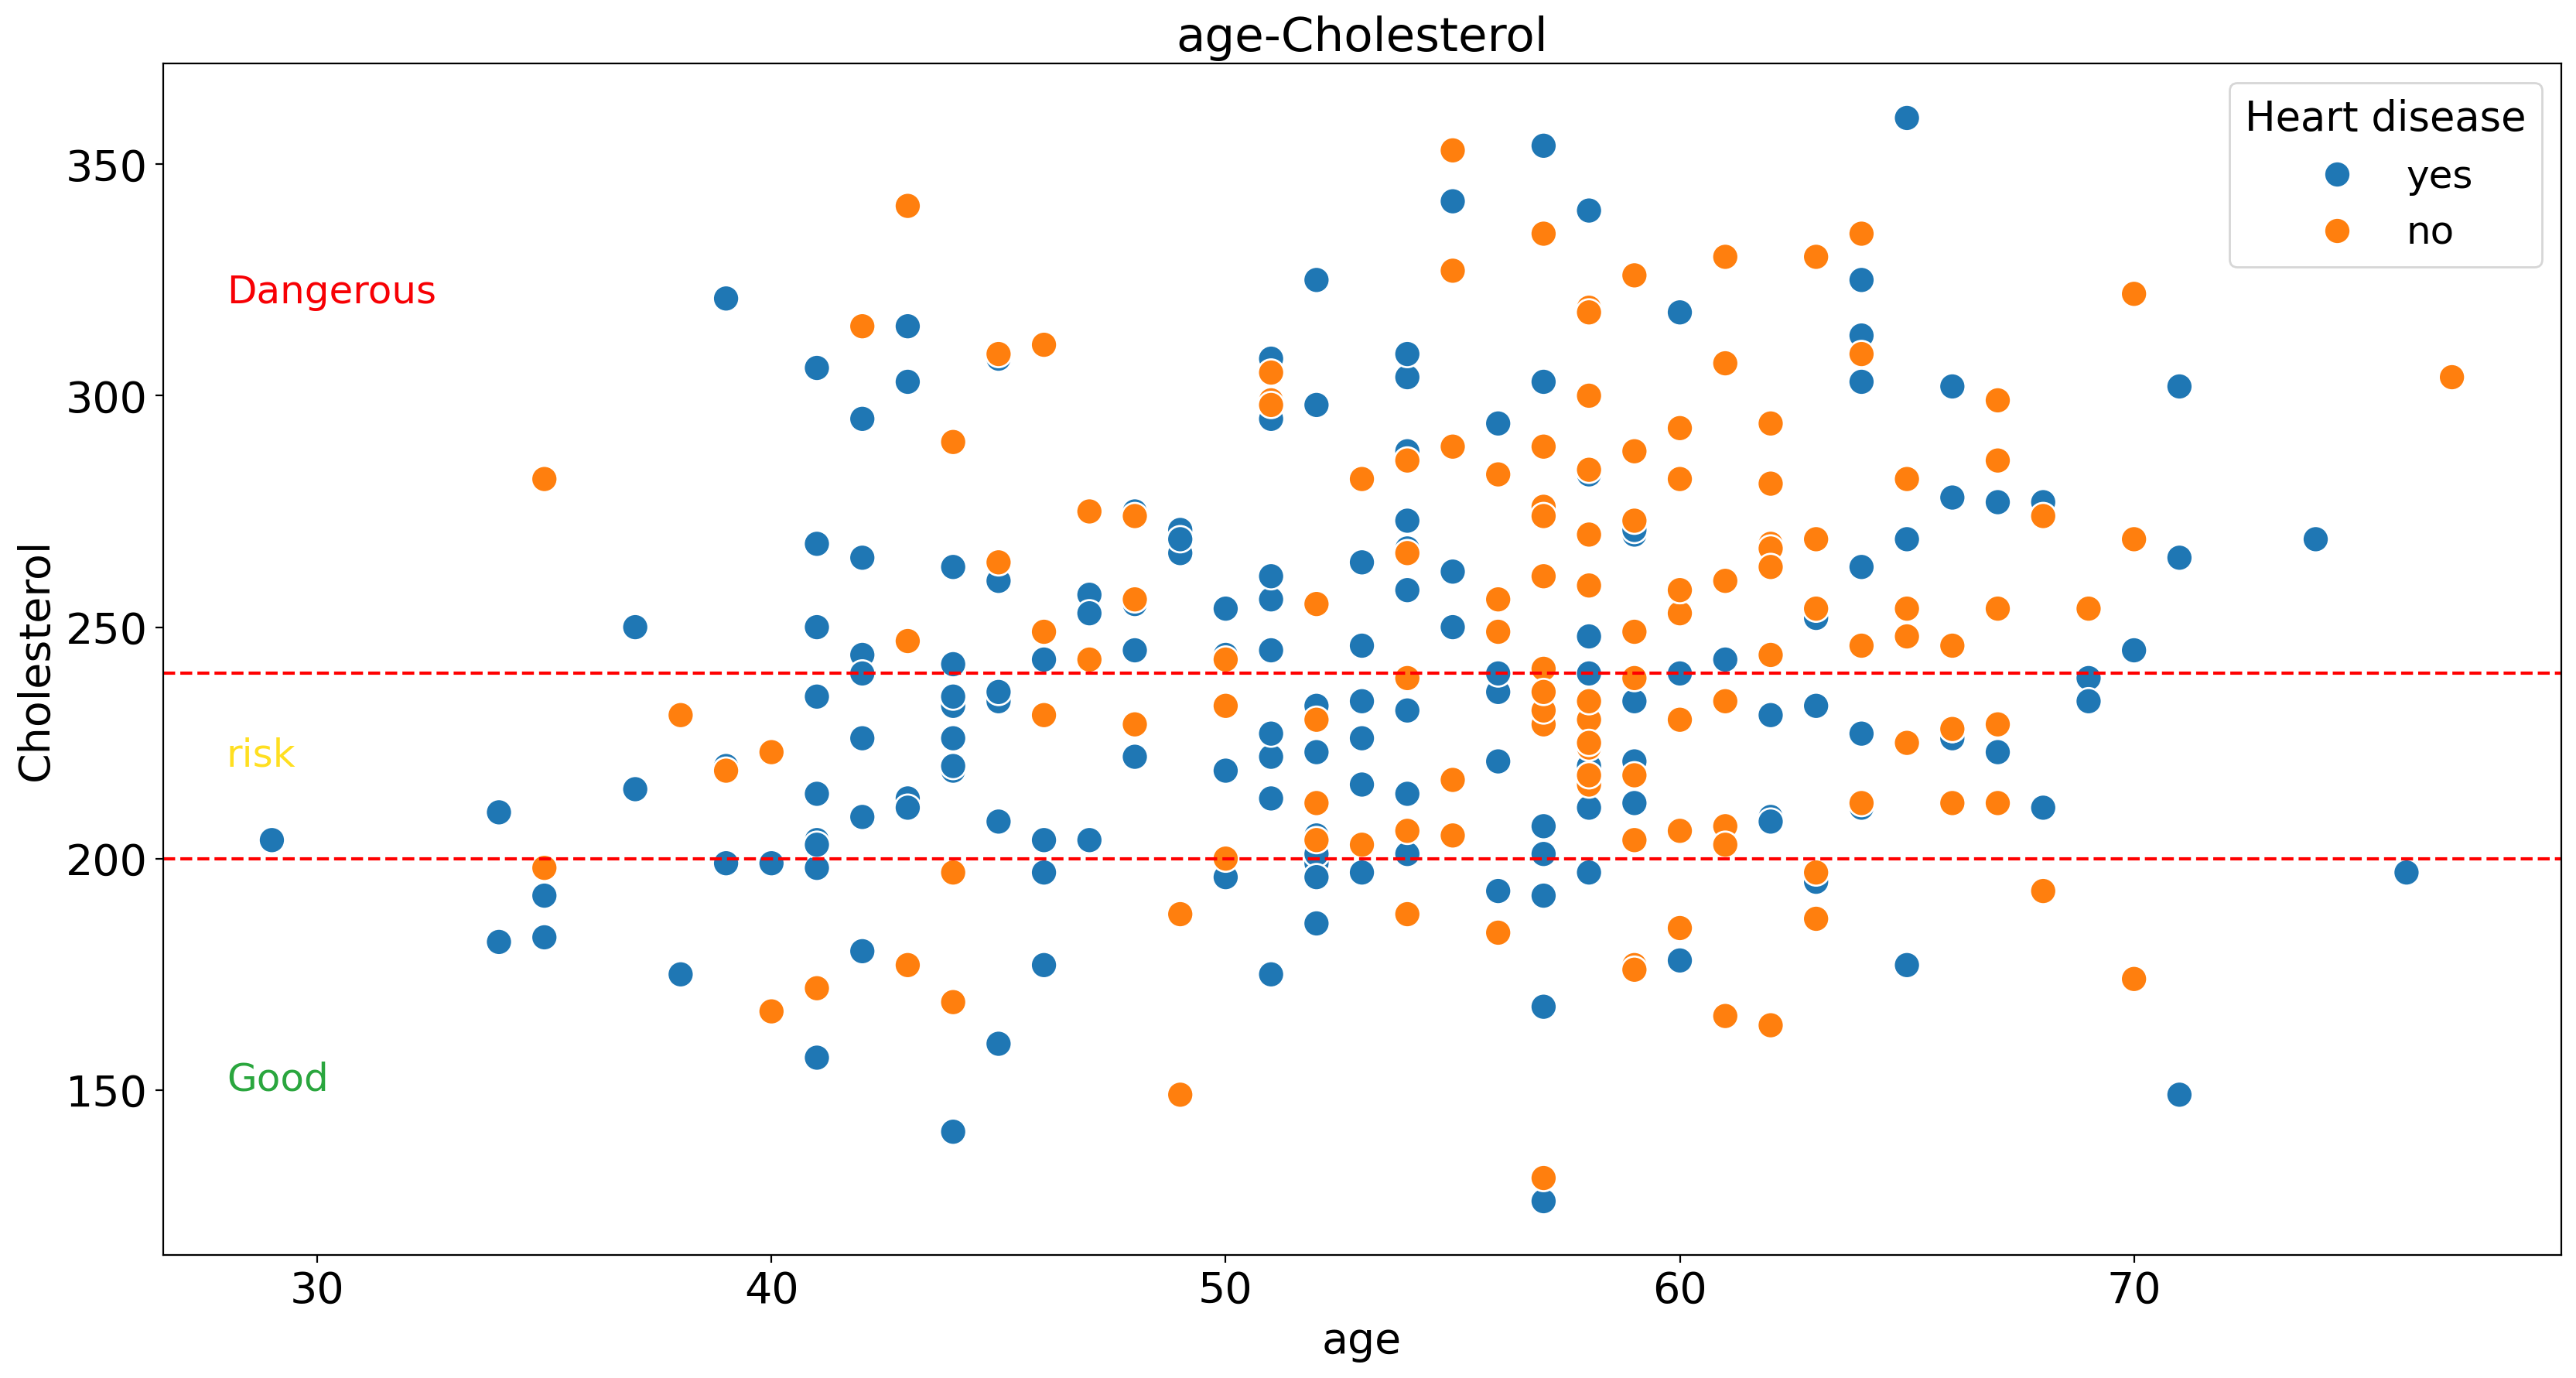

In [651]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x="age", y="chol", hue="target", s=150)
plt.title("age-Cholesterol", fontdict=font_title)
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("Cholesterol", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=20)
plt.legend(title="Heart disease", fontsize=18, title_fontsize=19)
plt.axhline(y=200, color="red", linestyle="--")
plt.axhline(y=240, color="red", linestyle="--")
plt.text(28, 150, s="Good", fontsize=18, color="#2AA63E")
plt.text(28, 220, s="risk", fontsize=18, color="#FFDF20")
plt.text(28, 320, s="Dangerous", fontsize=18, color="#F70004")
plt.show()

<font size=8 face="zar">
Overall Analysis:<br>
Data Distribution:<br>

Most people, with or without heart disease, have cholesterol levels between 200 and 300.<br>

People with heart disease (blue dots) appear to be more likely to be in the danger zone (above 240).<br>

Relationship between cholesterol and heart disease:<br>

In the "Dangerous" zone (above 240), the number of people with heart disease is significant.<br>

But some people have heart disease in the lower 200 range, meaning low cholesterol does not always mean no disease.

<font size=8 face="zar">
**Note**:<br>
Cholesterol is not a good measure!

### now 'trestbps'

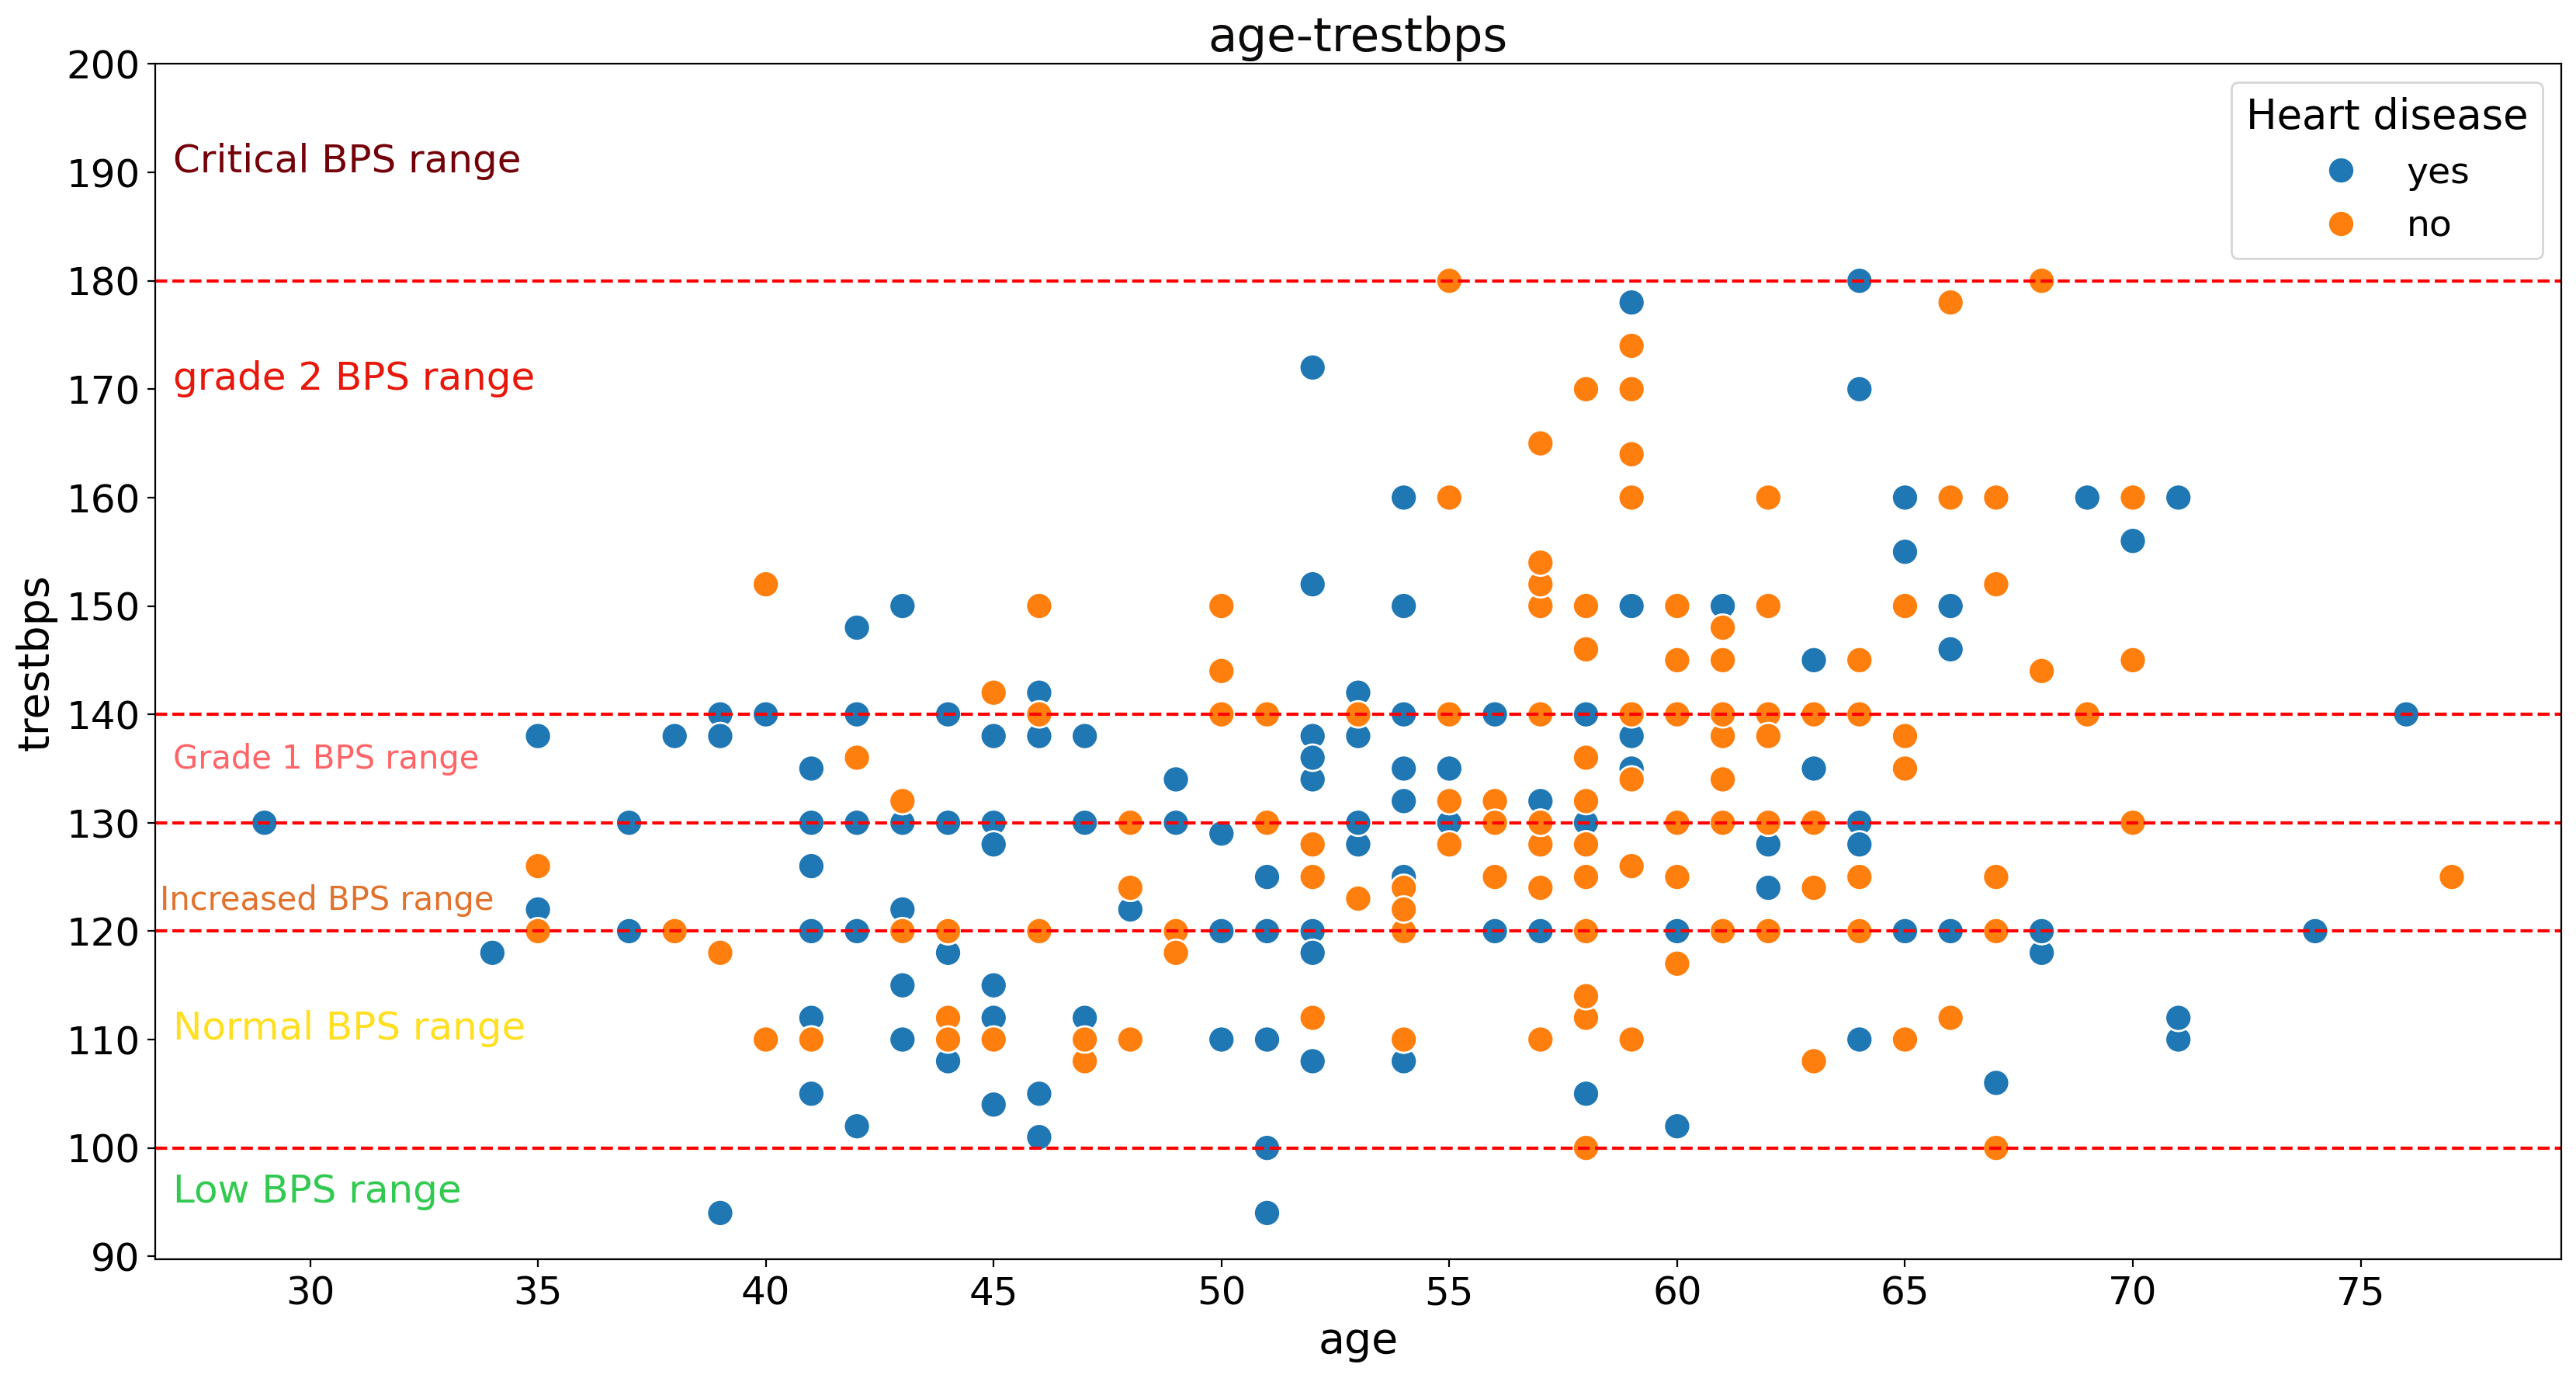

In [652]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x="age", y="trestbps", hue="target", s=150)
plt.title("age-trestbps", fontdict=font_title, color="#0C0A09")
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("trestbps", fontsize=20)
plt.tick_params(axis="both", labelsize=font_axis)
plt.xticks(range(30, 80, 5))
plt.yticks(range(90, 201, 10))
plt.axhline(y=100, color="red", linestyle="--")
plt.axhline(y=120, color="red", linestyle="--")
plt.axhline(y=130, color="red", linestyle="--")
plt.axhline(y=140, color="red", linestyle="--")
plt.axhline(y=180, color="red", linestyle="--")
plt.text(27, 95, s="Low BPS range", fontsize=18, color="#31C950")
plt.text(27, 110, s="Normal BPS range", fontsize=18, color="#FFDF20")
plt.text(26.7, 122, s="Increased BPS range", fontsize=15, color="#E1712B")
plt.text(27, 135, s="Grade 1 BPS range", fontsize=15, color="#FF6467")
plt.text(27, 170, s="grade 2 BPS range", fontsize=18, color="#E7180B")
plt.text(27, 190, s="Critical BPS range", fontsize=18, color="#730008")
plt.legend(title="Heart disease", fontsize=17, title_fontsize=19)
plt.show()

<font size=8 face="time new roman">
Graph Analysis:<br>
Most data density:<br>

Most points (both patients and healthy) are in the range of 120 to 140, that is, between the "Increased" and "Grade 1" ranges.<br>

People with heart disease:<br>

A large number of patients (blue points) are in the range of 130 to 150, that is, in the Grade 1 and Grade 2 ranges.<br>

Some patients have normal or even lower blood pressure.<br>

High blood pressure (especially above 140) is associated with an increased risk of heart disease, but there are exceptions.<br>

You can't definitively conclude whether you have heart disease based on blood pressure and age alone.

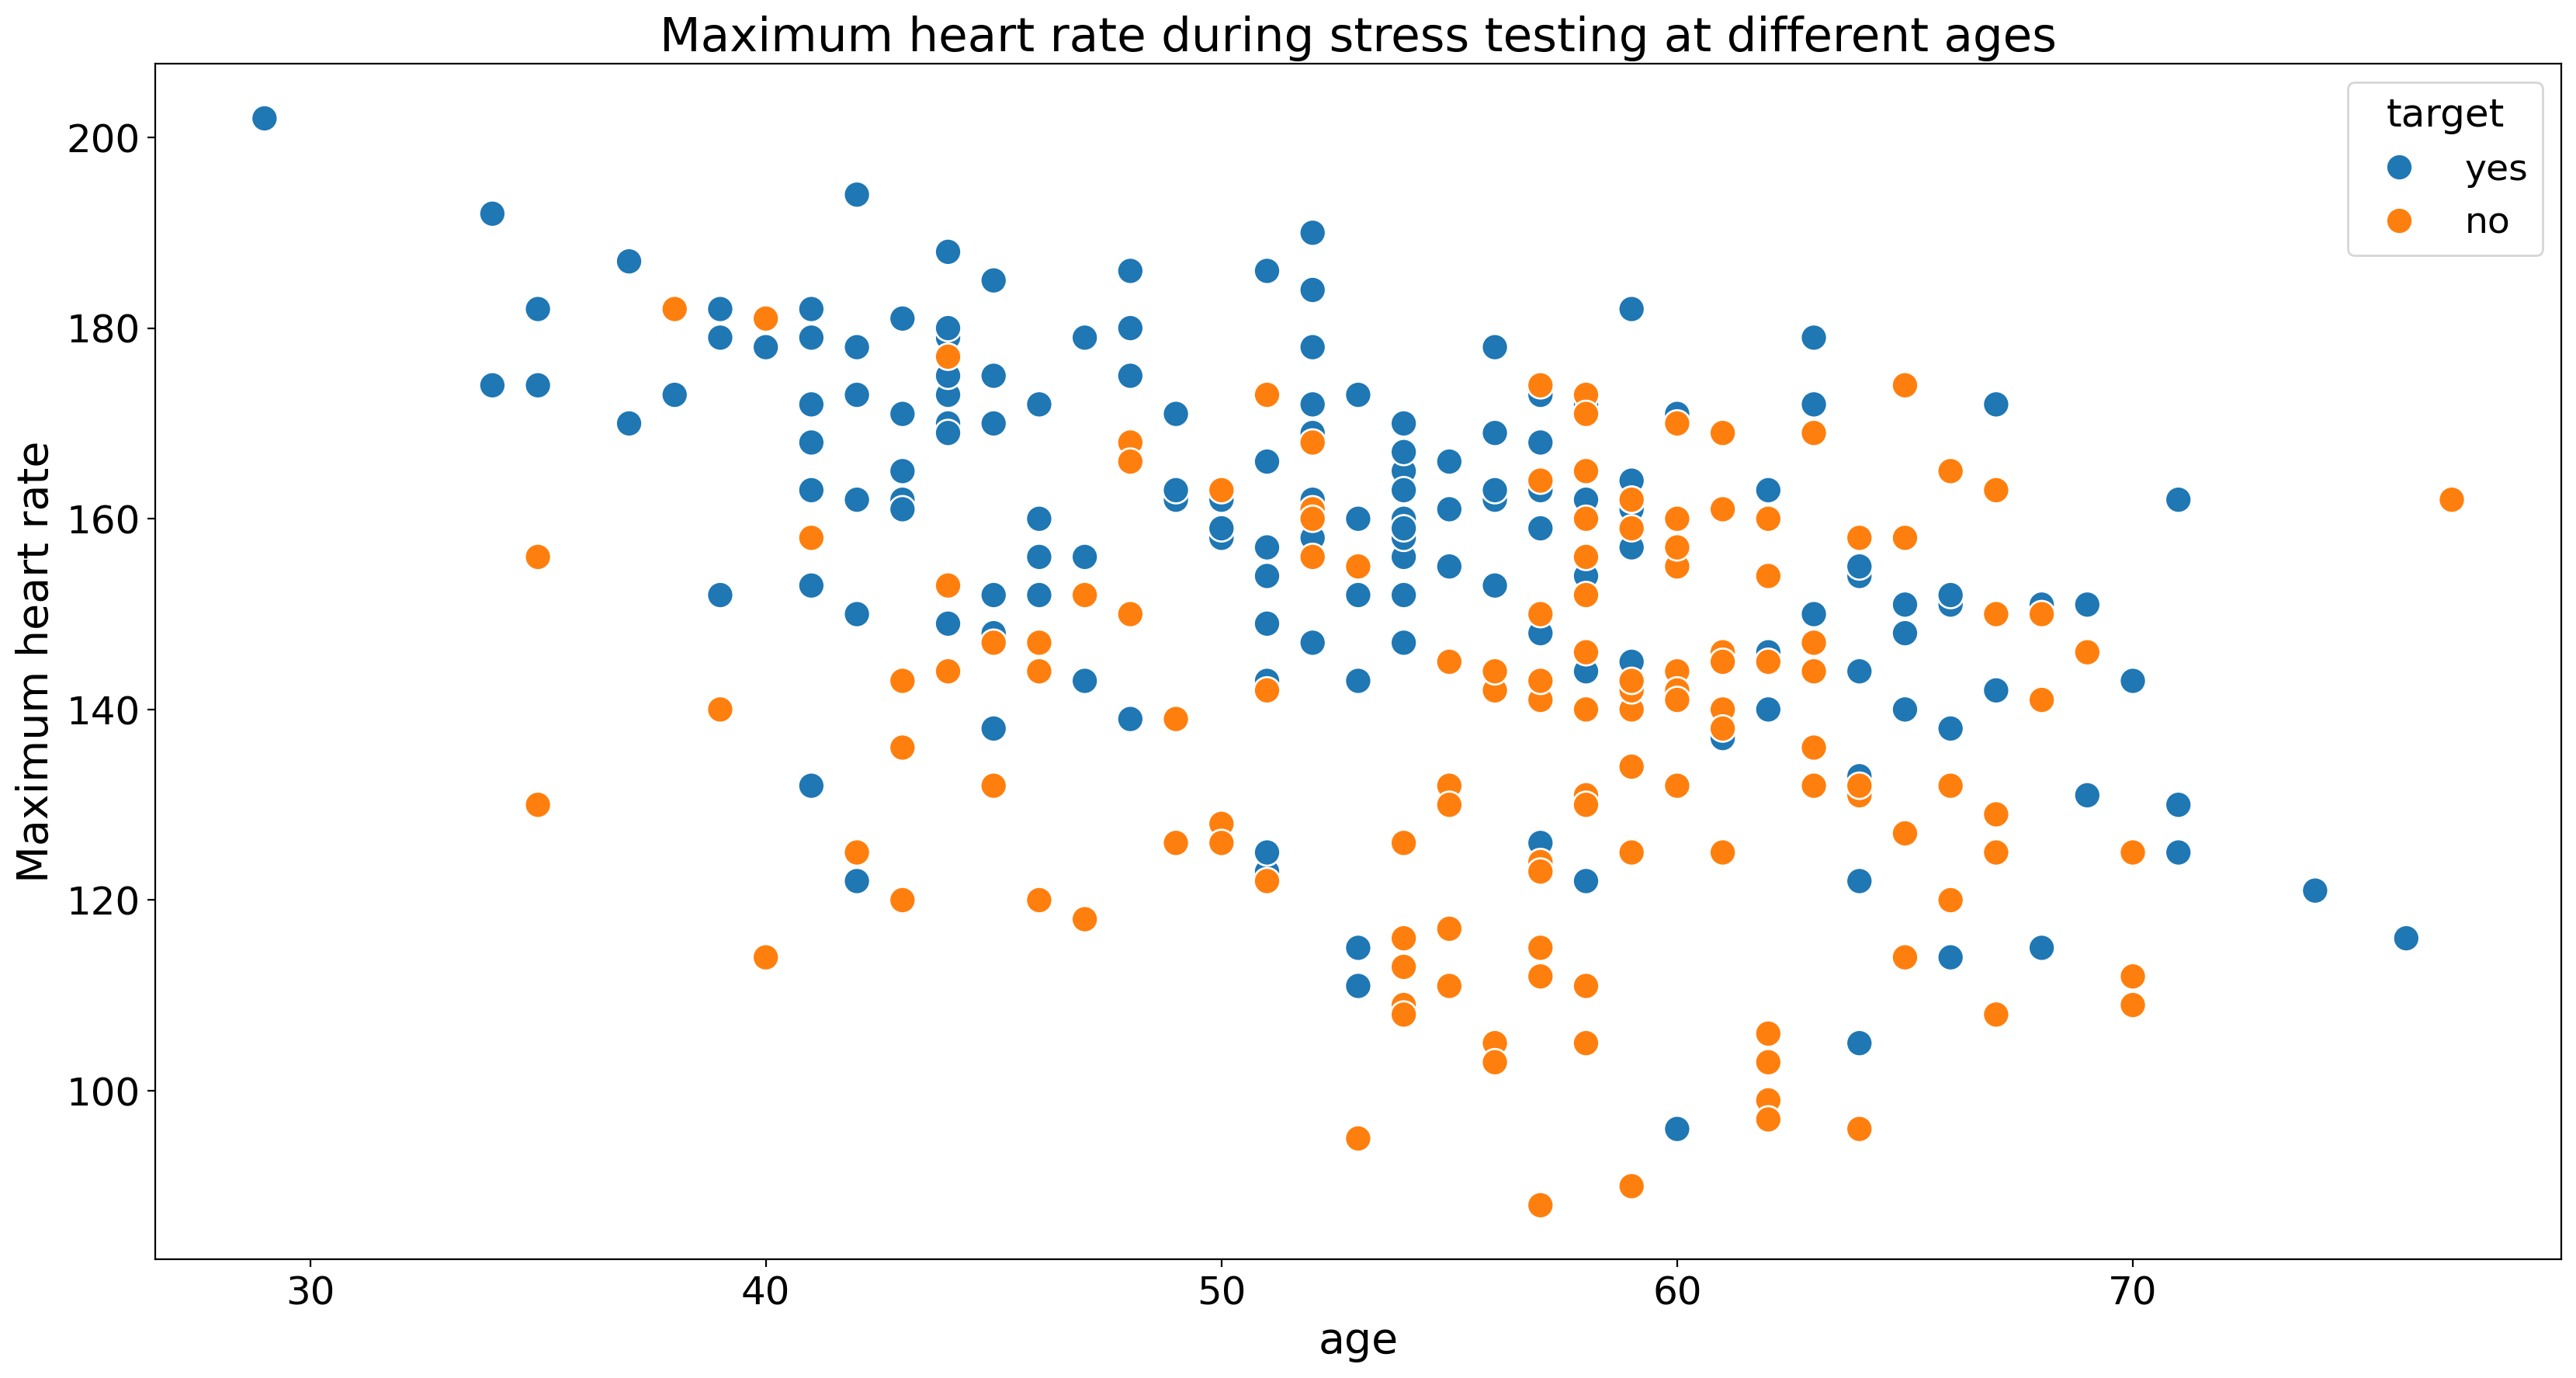

In [653]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x="age", y="thalach", hue="target", s=150)
plt.title(
    "Maximum heart rate during stress testing at different ages", fontdict=font_title
)
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("Maximum heart rate", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=font_axis)
plt.legend(title="target", title_fontsize=18, fontsize=17)
plt.show()

<font size=8 face="time new roman">
Overall Analysis:<br>
Overall Trend:<br>
With age, the amount of thalach (heart rate) generally decreases. This is a natural biological trend.<br>

Healthy vs. Diseased Comparison:<br>
Blue data (diseased) is usually more concentrated in areas with high heart rates (e.g. above 150).<br>
In contrast, orange data (healthy) is more common in areas with lower heart rates.<br>
Overlap of Two Groups:<br>
Both target classes overlap in many age and heart rate ranges. That is, it is not possible to definitively diagnose a disease based on these two features alone.<br>
Scatter Pattern:<br>
In younger people (e.g. under 45), more blue dots (diseased) are seen and the rates are higher than 160.<br>
In older people (e.g., over 60 years of age), both classes are present in similar proportions, but the heart rate is lower.<br>

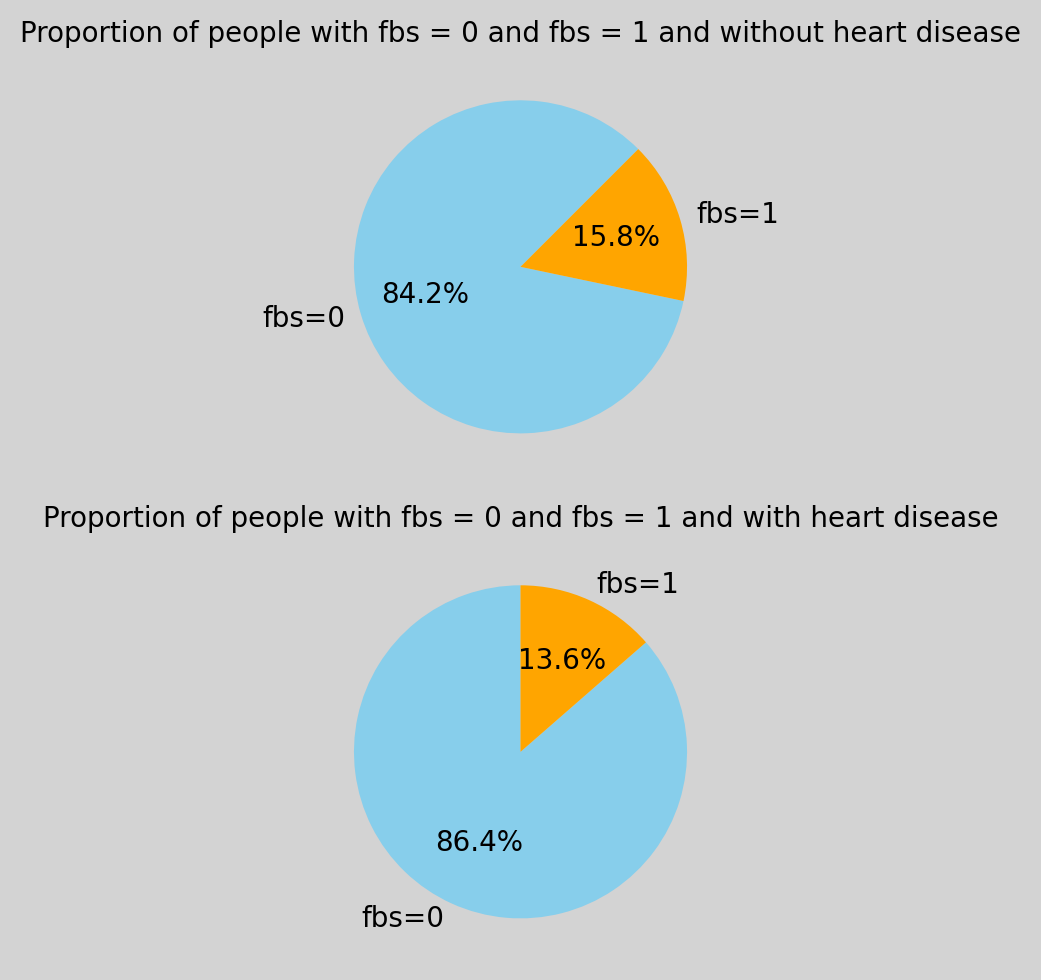

In [654]:
fbs_target_0 = df[df["target"] == "no"]["fbs"].value_counts()
fbs_target_1 = df[df["target"] == "yes"]["fbs"].value_counts()
fig, ax = plt.subplots(nrows=2, figsize=(7, 5), dpi=200)
fig.patch.set_facecolor("lightgray")
ax[0].pie(
    fbs_target_0,
    labels=["fbs=0", "fbs=1"],
    autopct="%1.1f%%",
    startangle=45,
    colors=["skyblue", "orange"],
)
ax[0].set_title(
    "Proportion of people with fbs = 0 and fbs = 1 and without heart disease",
    fontsize=10,
)
ax[1].pie(
    fbs_target_1,
    autopct="%1.1f%%",
    labels=["fbs=0", "fbs=1"],
    startangle=90,
    colors=["skyblue", "orange"],
)
ax[1].set_title(
    "Proportion of people with fbs = 0 and fbs = 1 and with heart disease",
    fontsize=10,
)
plt.tight_layout()
plt.show()

<font size=8 face="time new roman">
Notable points in the analysis:<br>
The percentage of people with high fbs (fbs=1) is relatively low in both heart patients and healthy people.<br>
Interestingly, the proportion of fbs=1 in healthy people is slightly higher than in people with heart disease (15.8% vs. 13.6%).<br>
This may indicate that fasting blood sugar alone is not an accurate indicator of heart disease and should be considered in conjunction with other factors.

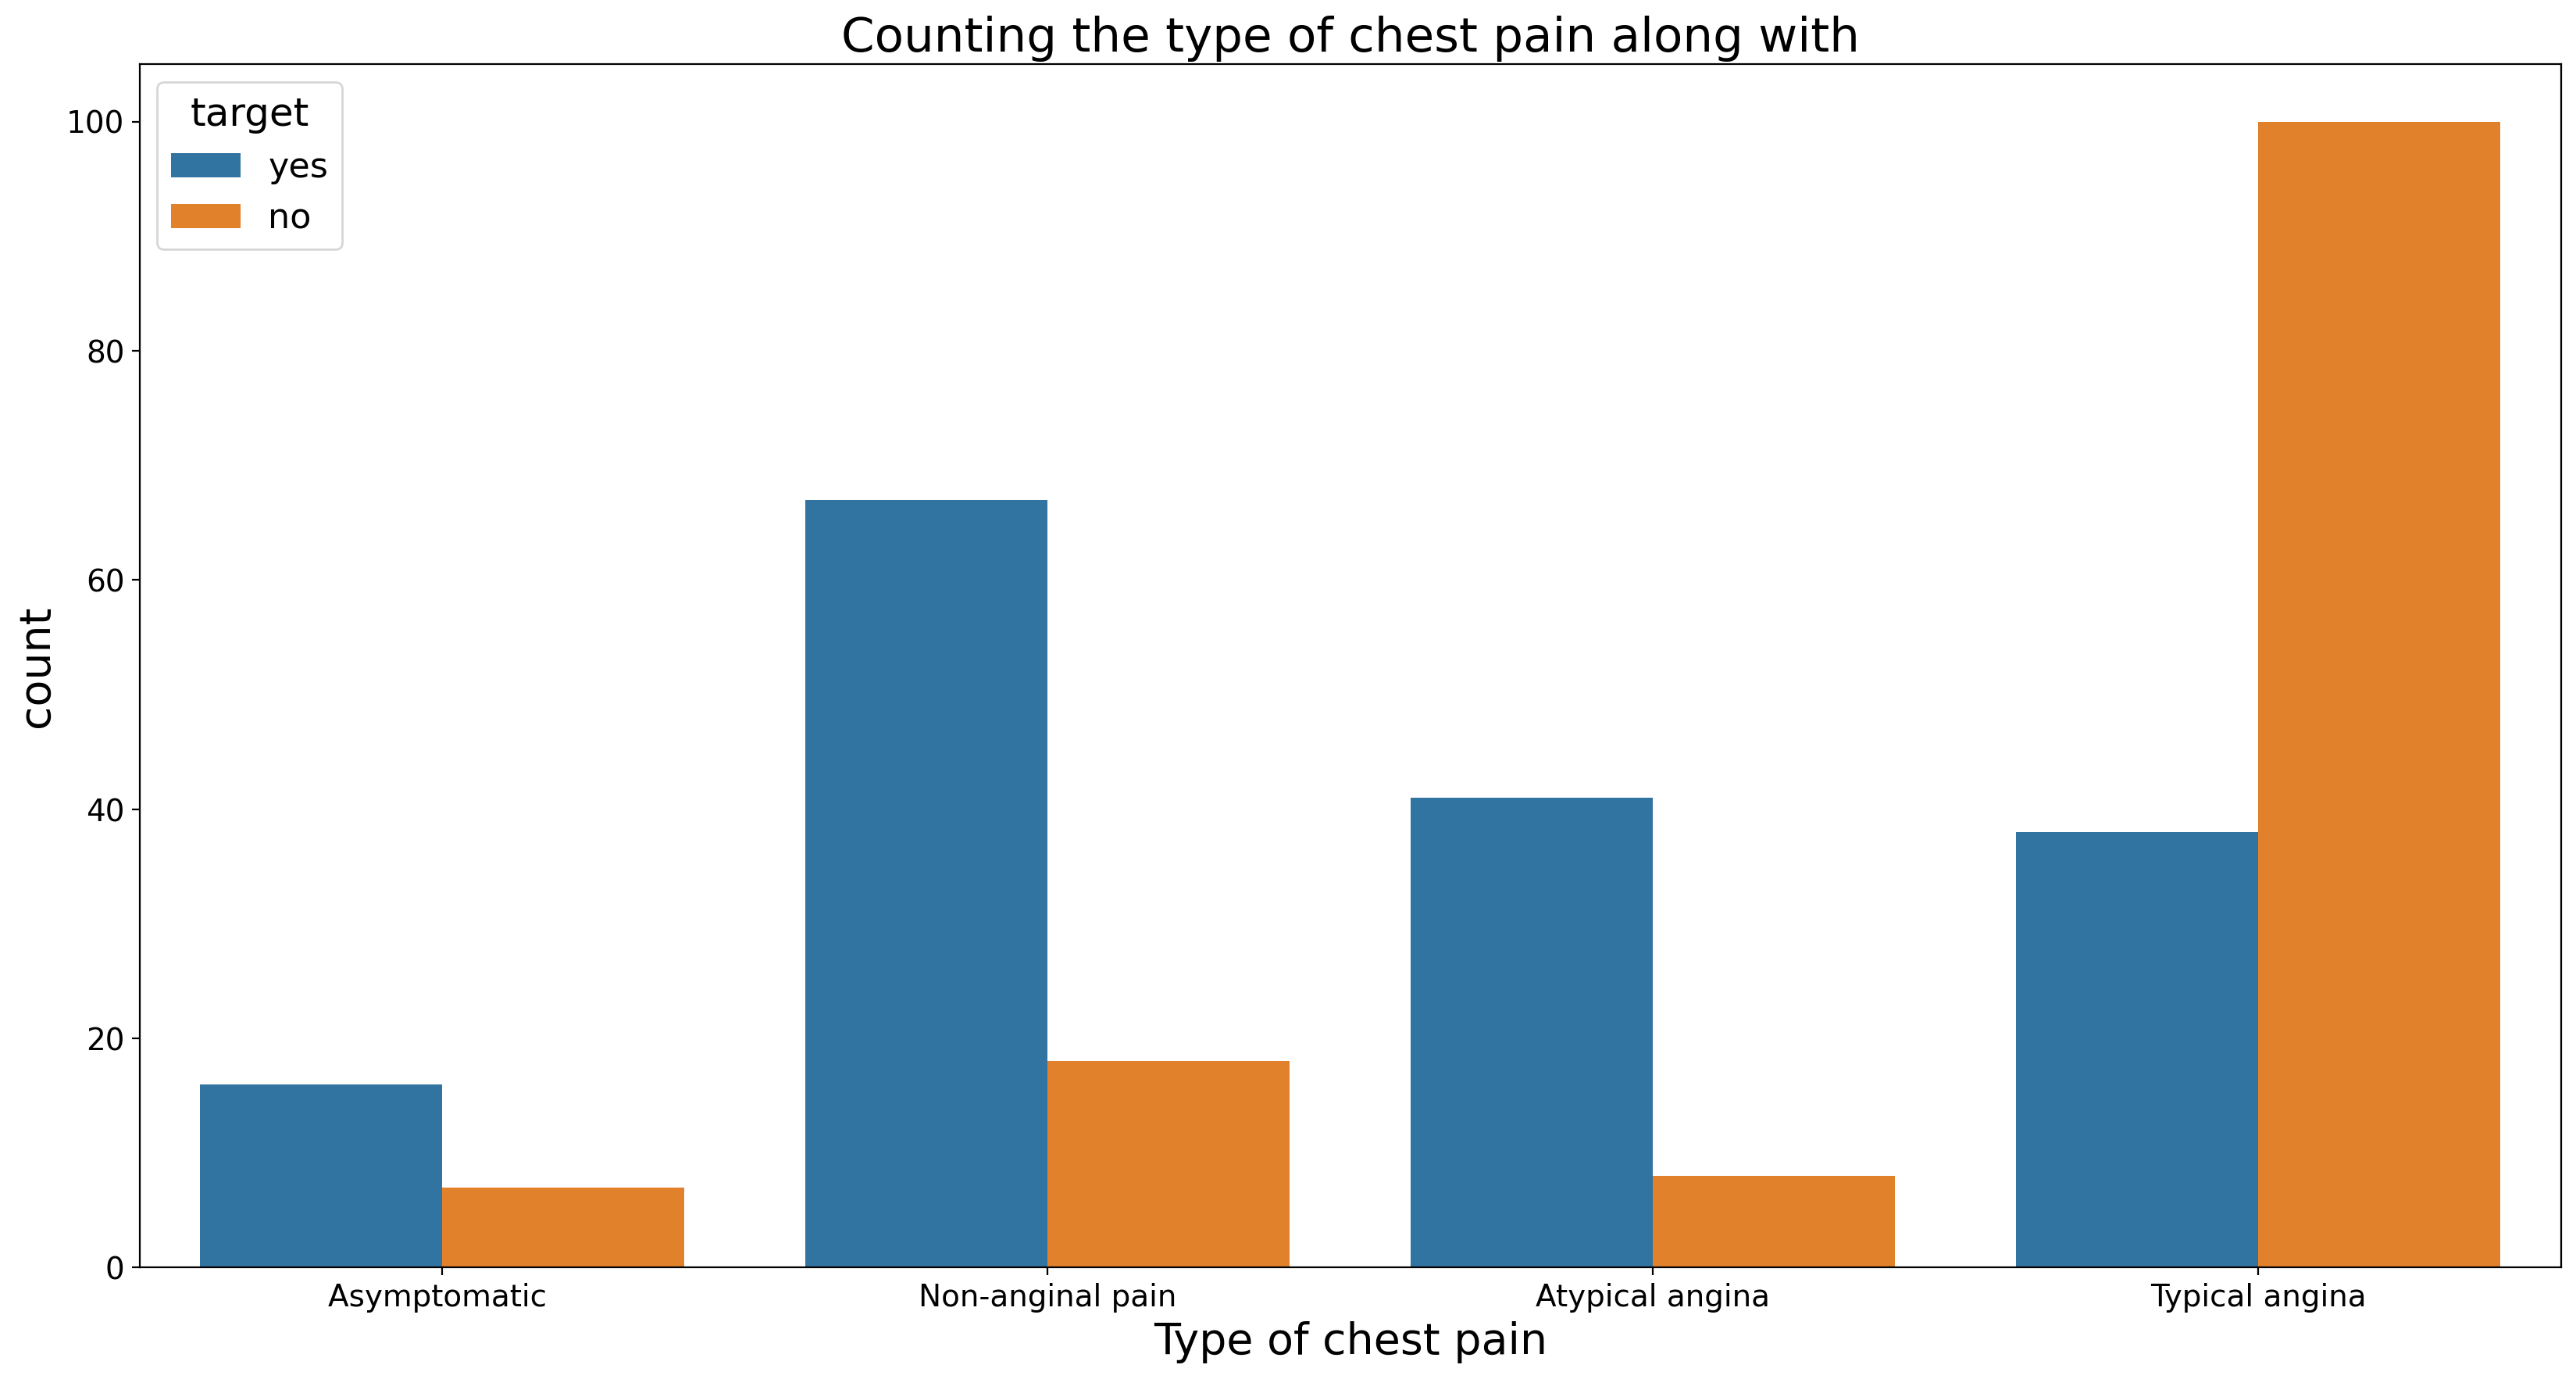

In [655]:
plt.figure(figsize=(20, 10), dpi=200)
sns.countplot(data=df, x=df["cp"], hue="target")
plt.title("Counting the type of chest pain along with", fontdict=font_title)
plt.xlabel("Type of chest pain", fontdict=font_x_y_label)
plt.ylabel("count", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=14)
plt.legend(title="target", title_fontsize=18, fontsize=16)
plt.show()

<font size=8 face="time new roman">
Important notes:<br>

Typical angina:<br>
Most commonly seen in healthy people (target=no).<br>
Can indicate that this type of pain is not always indicative of heart disease and may be due to other causes.<br>
Non-anginal pain and Atypical angina:<br>
Most commonly seen in patients with heart disease (target=yes).<br>
Indicates that this type of pain is more likely to be associated with actual heart disease.<br>
Asymptomatic:<br>
Seen in both healthy and heart disease patients, but at a lower rate.

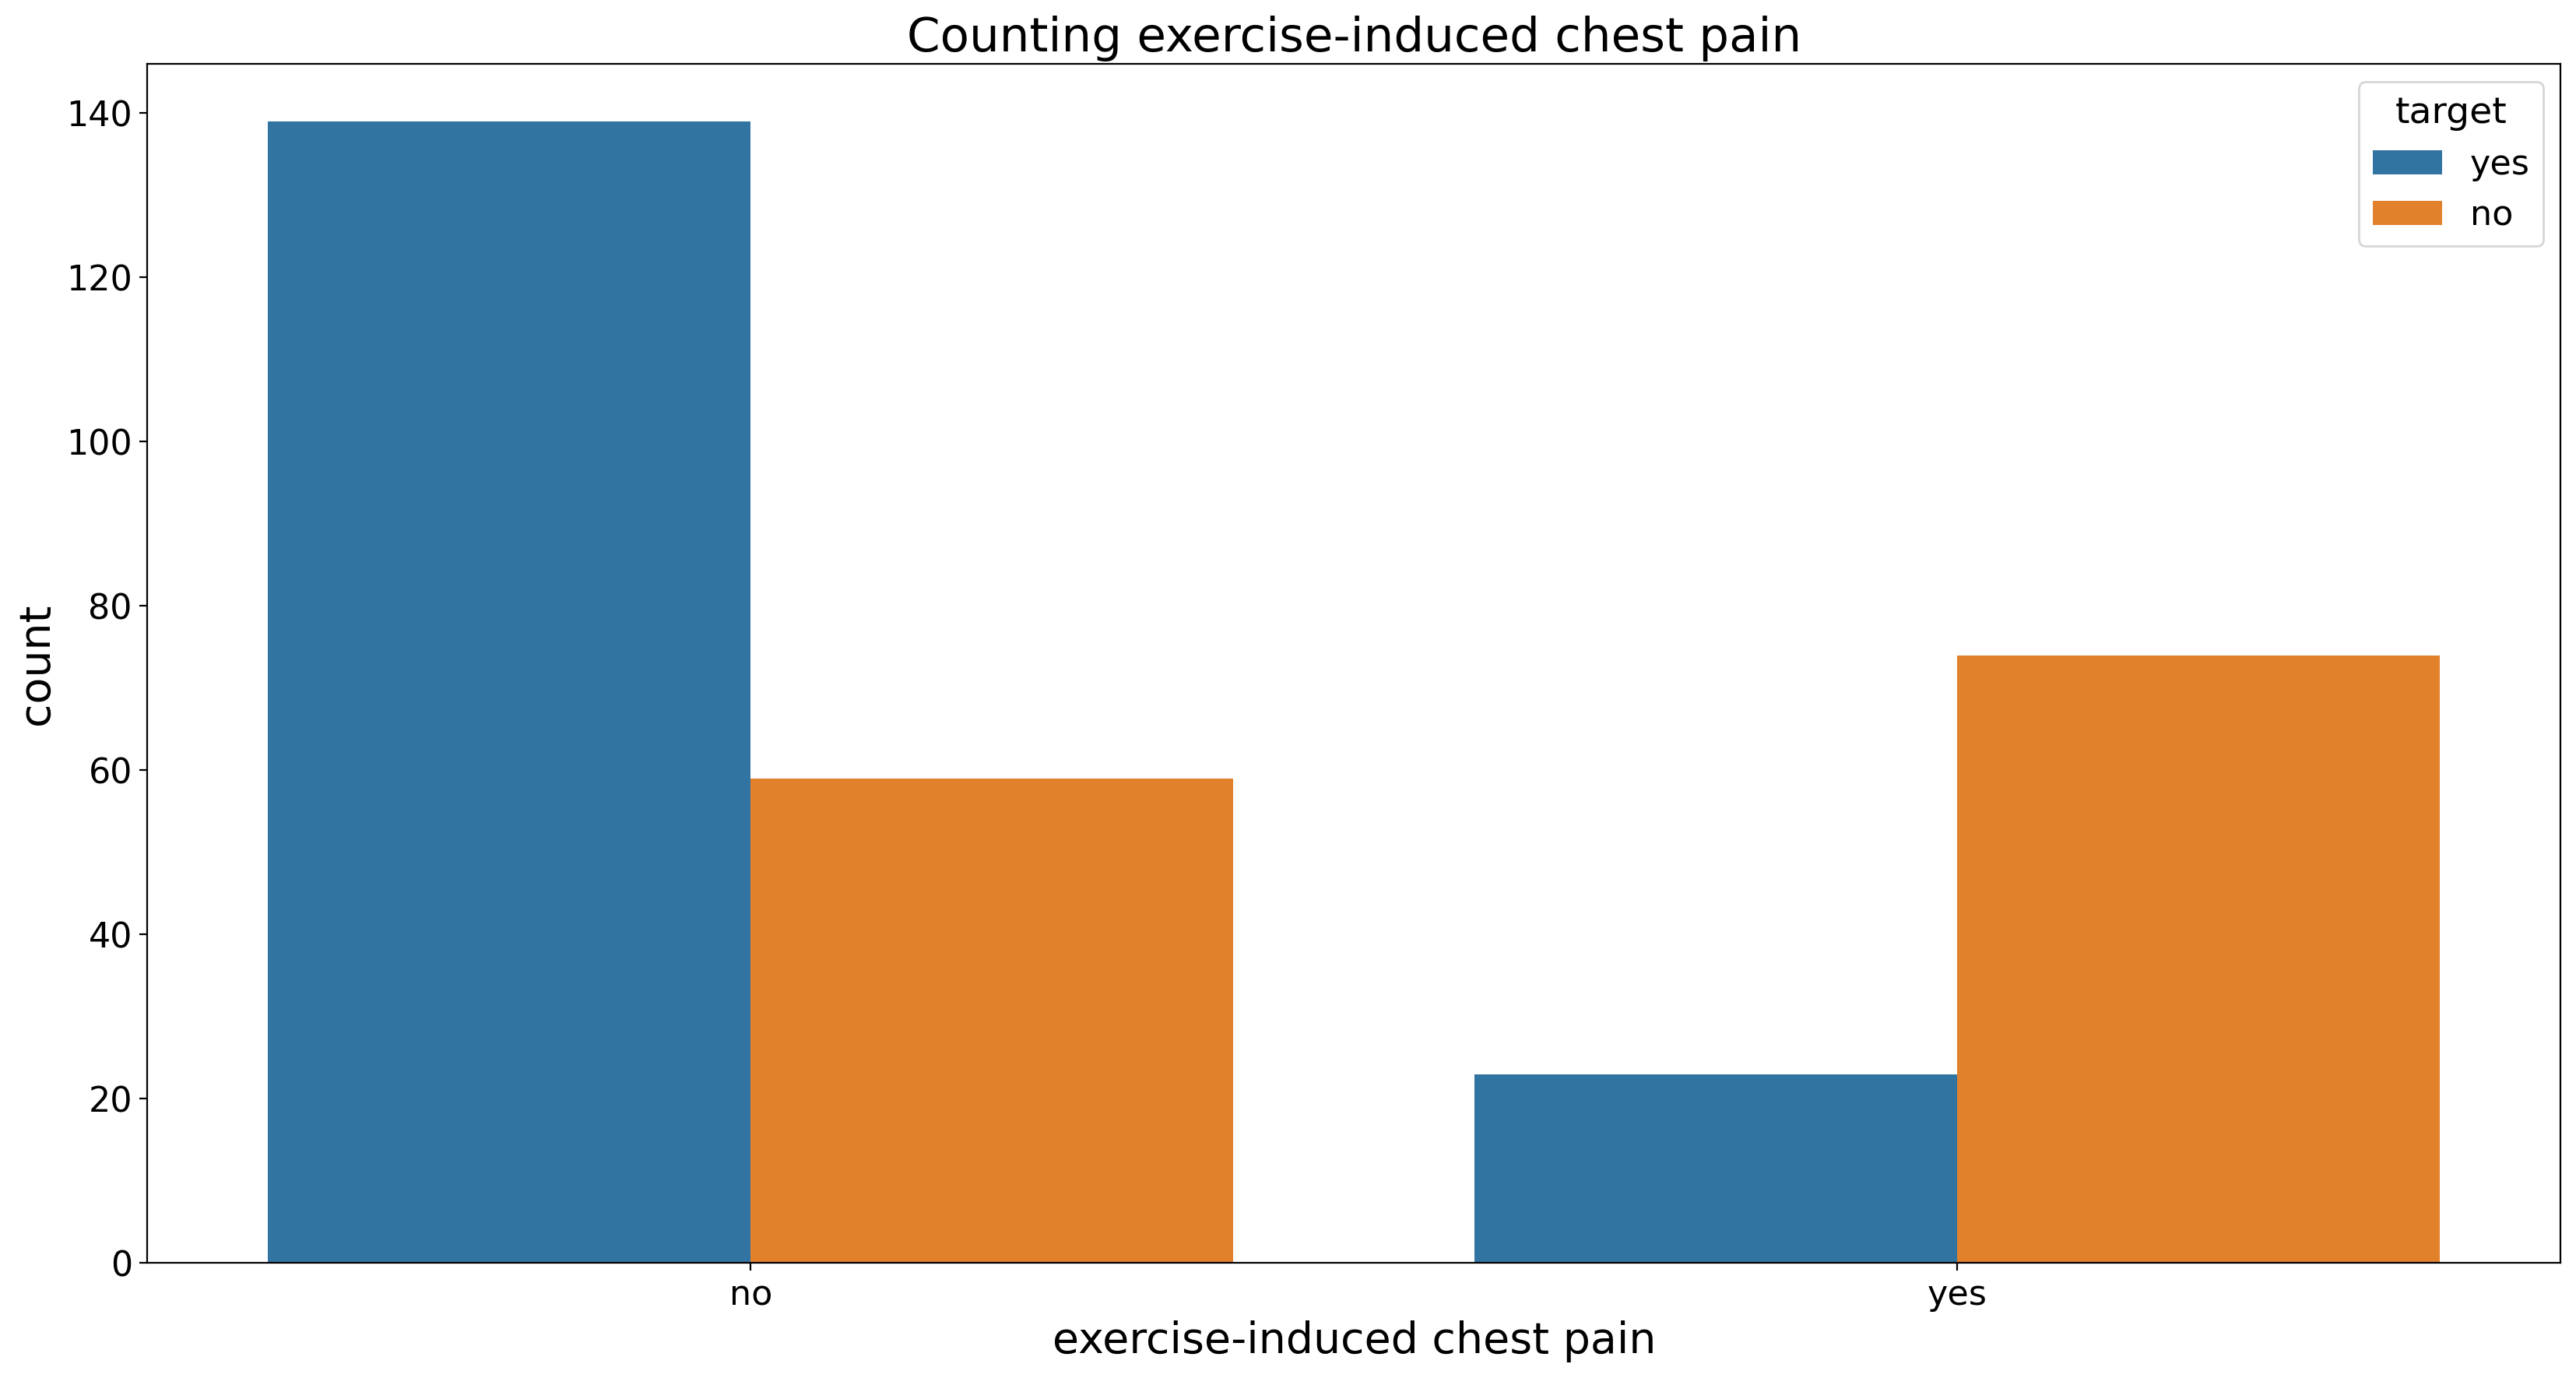

In [656]:
plt.figure(figsize=(20, 10), dpi=200)
sns.countplot(data=df, x=df["exang"], hue="target")
plt.title("Counting exercise-induced chest pain", fontdict=font_title)
plt.xlabel("exercise-induced chest pain", fontdict=font_x_y_label)
plt.ylabel("count", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=16)
plt.legend(title="target", title_fontsize=17, fontsize=16)
plt.show()

<font size=8 face="time new roman">
Important points:<br>
In the "no" state (no pain during exercise):<br>
Most people who are sick (target=yes) are in this group.<br>
That is, many heart patients do not have pain from exercise.<br>
In the "yes" state (with pain during exercise):<br>
Most people who are not sick (target=no).<br>
That is, in this particular data set, having pain during exercise is not necessarily a sign of heart disease!!!<br>

Conclusion:<br>
Contrary to initial expectations, exercise-induced chest pain is not a strong indicator of heart disease in this data set.<br>
Incidentally, healthy people also experience significant exercise-induced pain.<br>

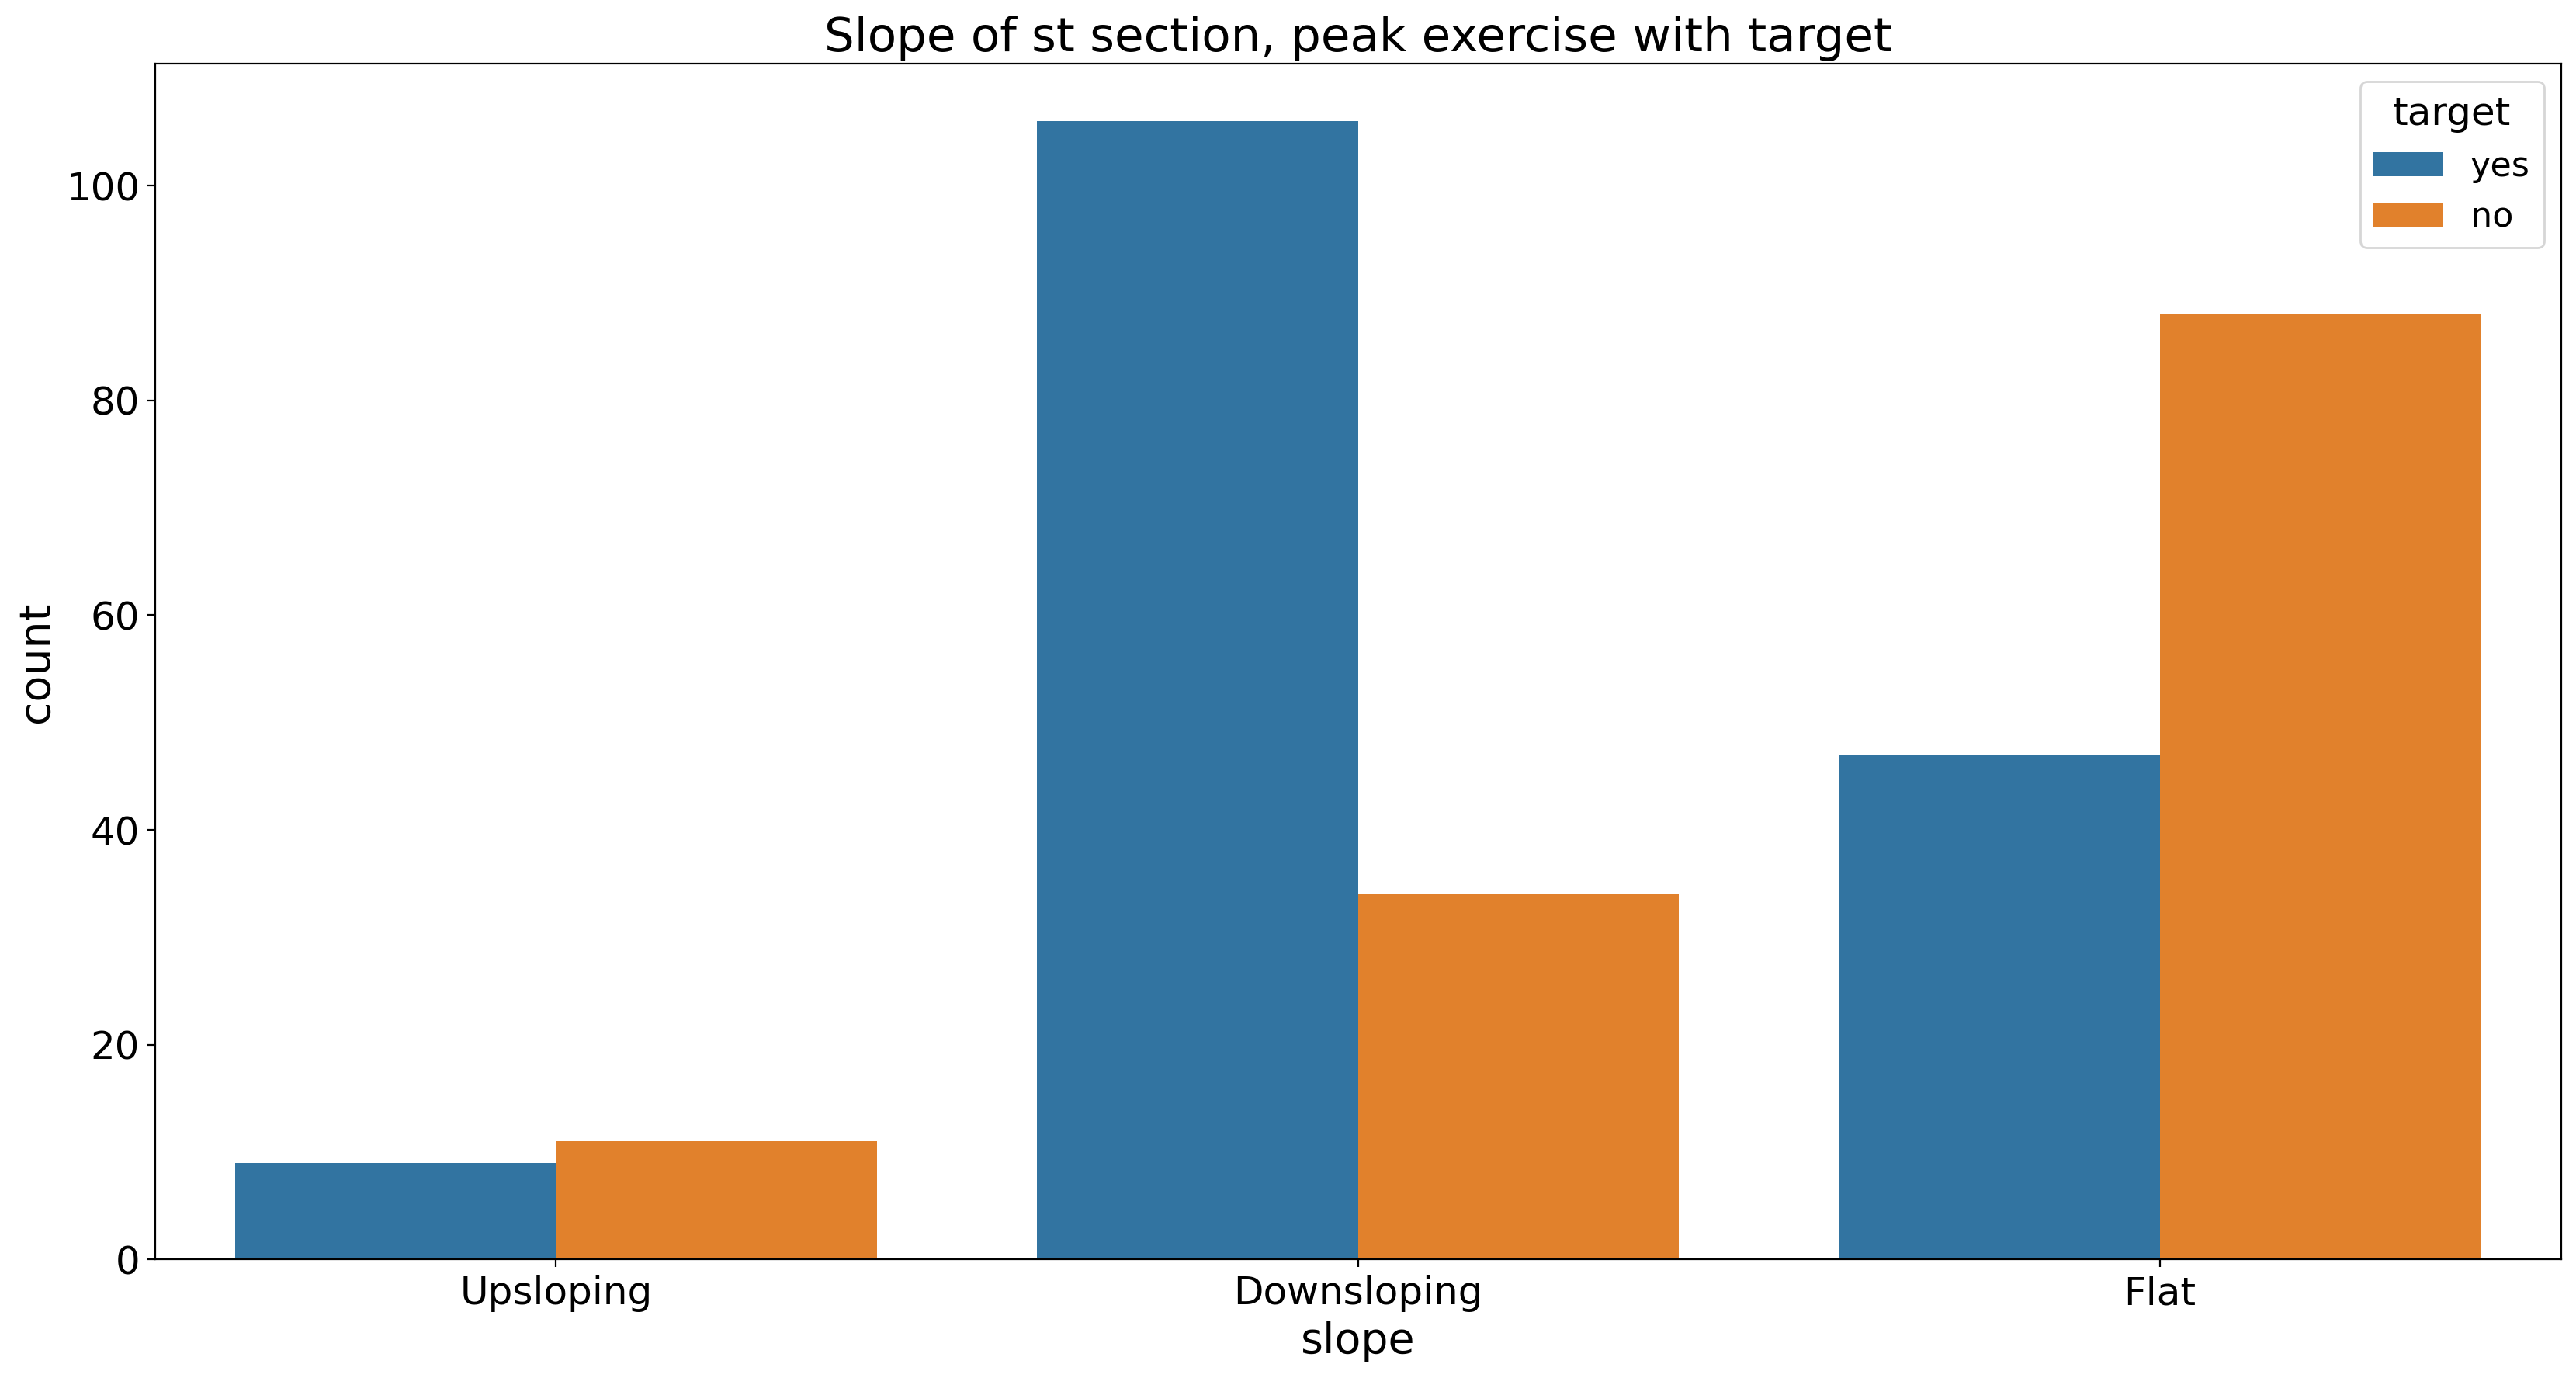

In [657]:
plt.figure(figsize=(20, 10), dpi=200)
sns.countplot(data=df, x=df["slope"], hue="target")
plt.title("Slope of st section, peak exercise with target", fontdict=font_title)
plt.xlabel("slope", fontdict=font_x_y_label)
plt.ylabel("count", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=18)
plt.legend(title="target", title_fontsize=18, fontsize=16)
plt.show()

<font size=8 face="time new roman">
Analysis:<br>
Downsloping:<br>
Most associated with heart disease.<br>
Most people with this type of slope are sick.<br>
It is considered a serious warning indicator.<br>

Flat:
It is seen in both healthy and sick patients in significant numbers.<br>
It is more common in healthy people.<br>
It has mixed information and is not a strong diagnostic tool on its own.<br>

Upsloping:<br>
It is the least common.<br>
It does not differ much between healthy and sick people, but its presence is slightly higher in healthy people.<br>

Conclusion:<br>
The slope feature, especially the Downsloping value, can be significantly associated with heart disease.<br>
The Flat value needs further investigation because it is present in both healthy and sick patients.

<font size=9 face="zar bold">
**Note: Since the graph above shows that flat and downsloping slopes were the most common heart diseases in these groups, I will examine this more closely later.**<font>

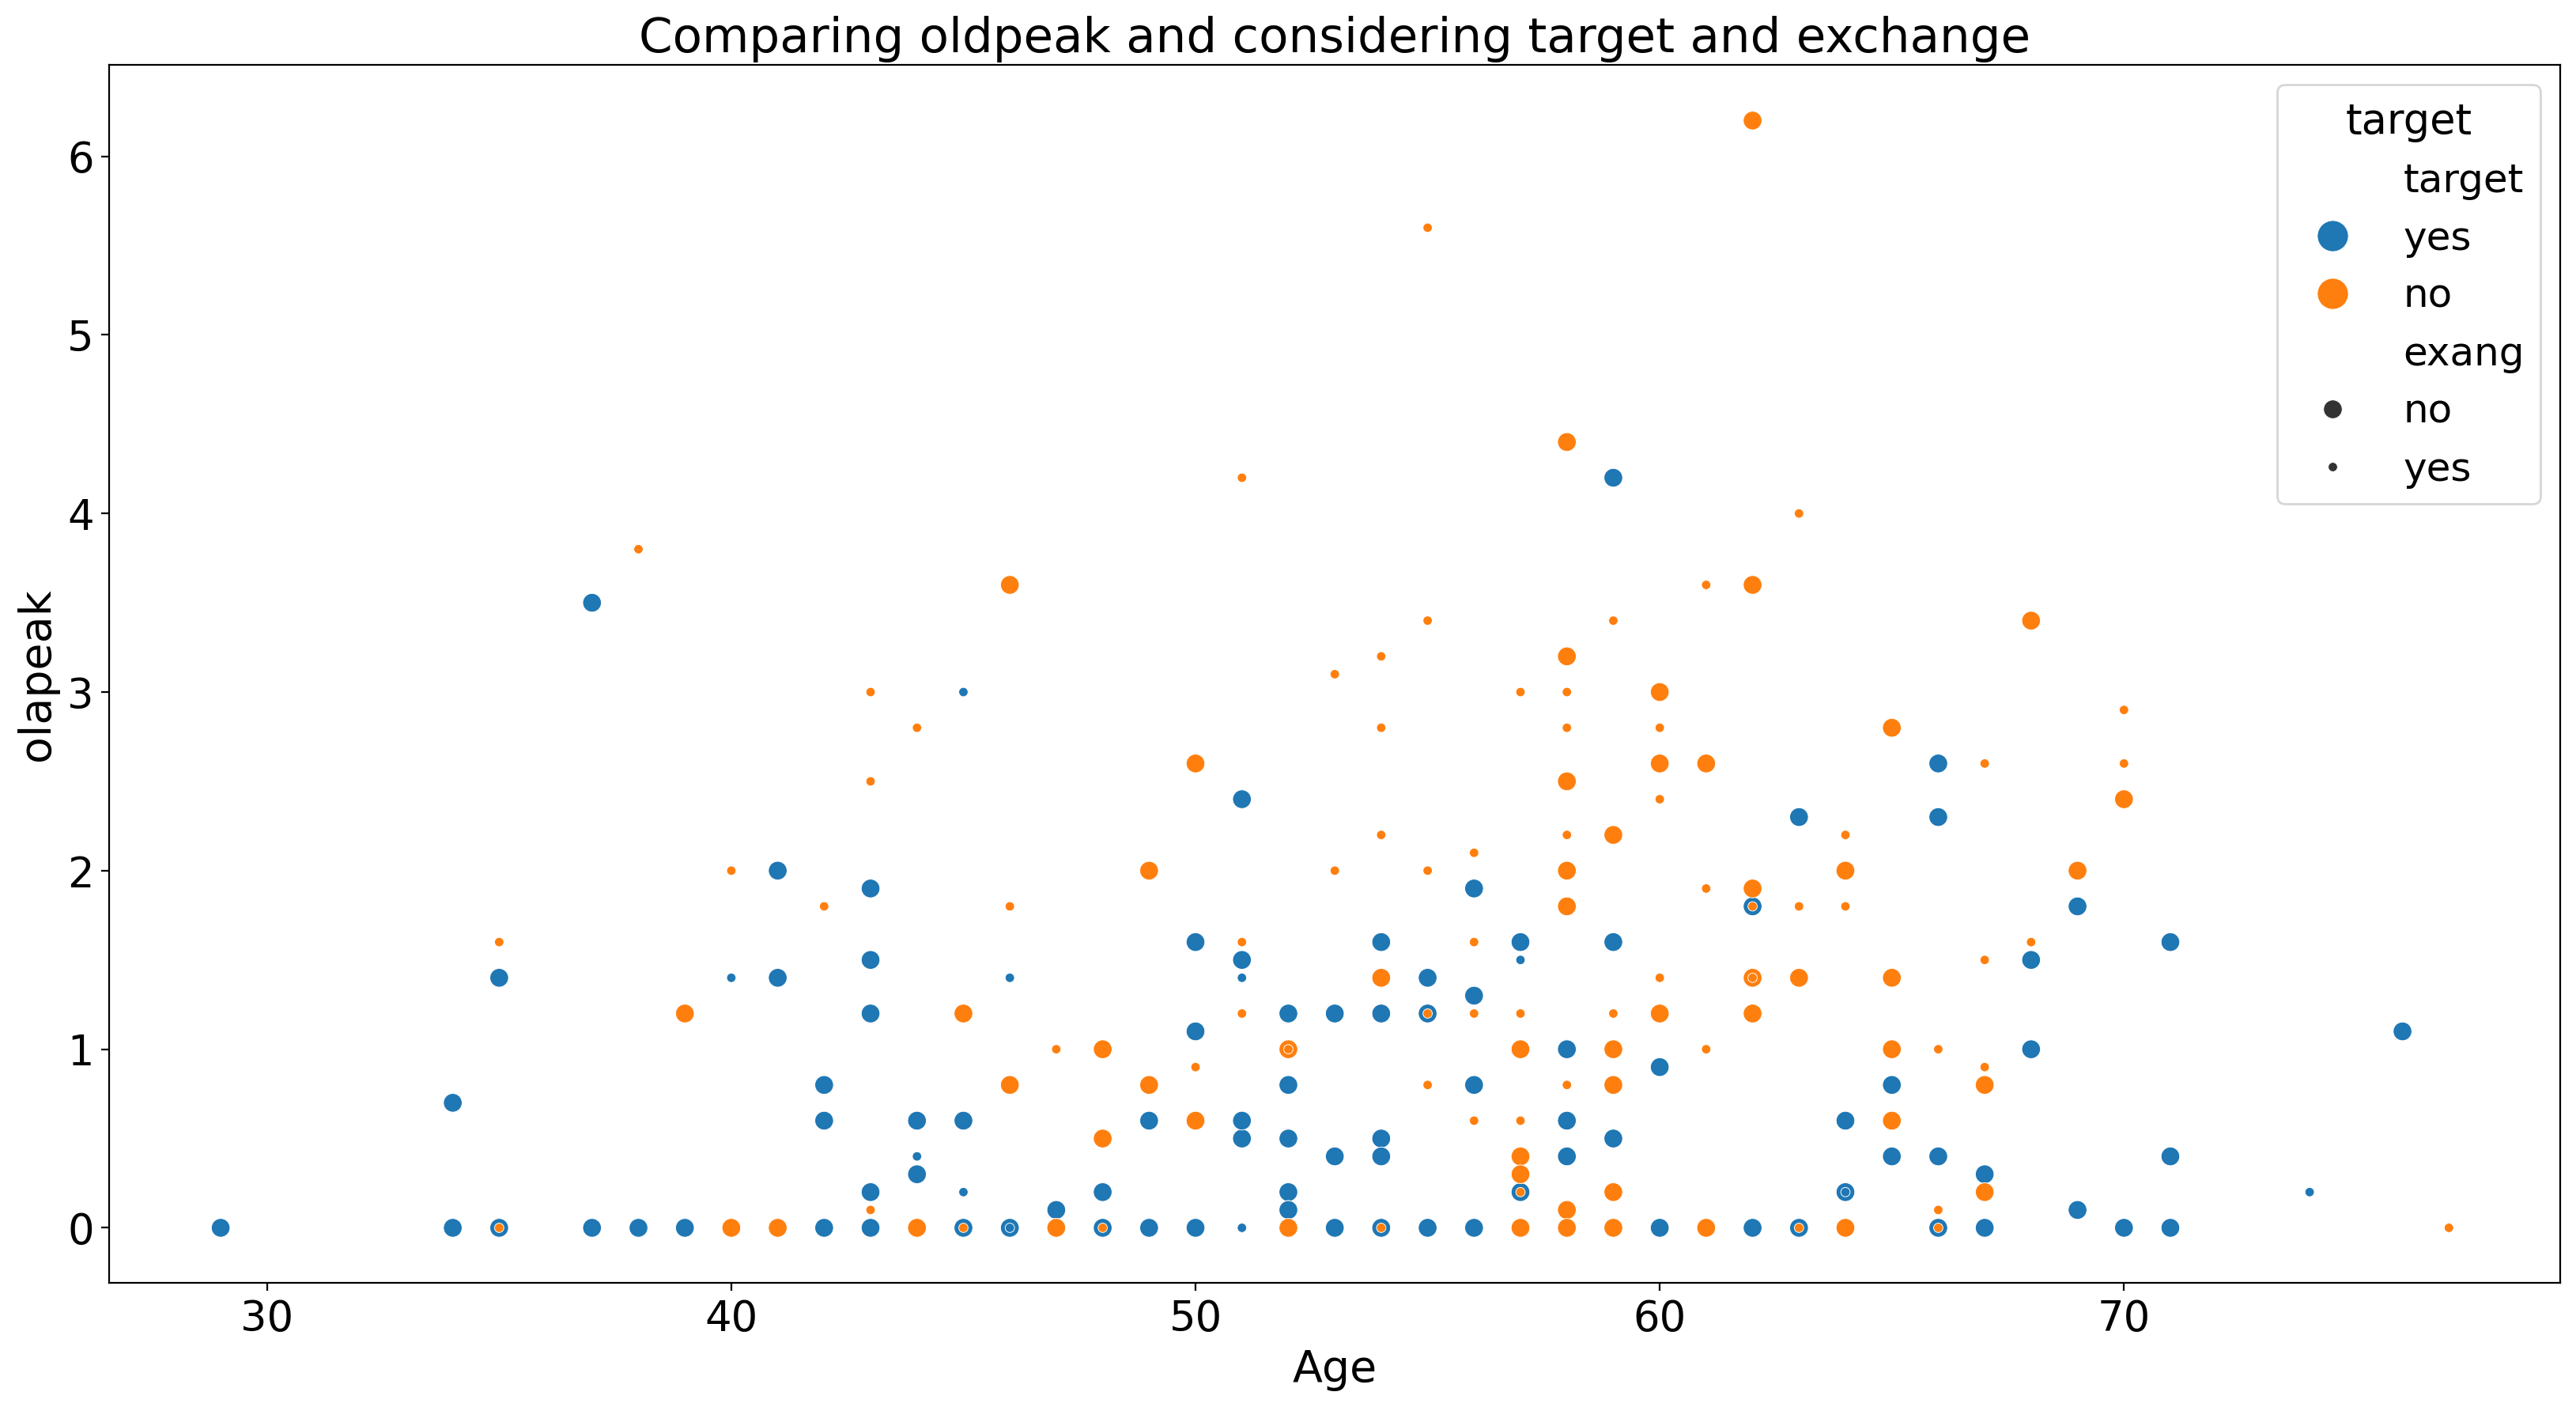

In [658]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(data=df, x="age", y="oldpeak", hue="target", s=200, size="exang")
plt.title("Comparing oldpeak and considering target and exchange", fontdict=font_title)
plt.xlabel("Age", fontdict=font_x_y_label)
plt.ylabel("olapeak", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=19)
plt.legend(title="target", title_fontsize=19, fontsize=18)
plt.show()

<font size=8 face="time new roman">
Overall analysis:<br><br>
Lower oldpeak values (below 1):<br>
Most patients with heart disease (blue) are in this range.<br>
This means that many heart patients do not have a large ST depression.<br>
Higher oldpeak values (above 2):<br>
In this range, healthy people (orange) are also present.<br>
But people with very high oldpeak often have exang = yes (smaller dots), which is associated with chest pain on activity.<br>
Dispersion in different ages:<br>
People over 50 are seen in both groups (healthy and sick).<br>
But the dispersion of heart patients is more in this age group.<br>
Small dots (exang=yes):<br>
Seen in both heart patients and healthy people, but more often in heart patients.

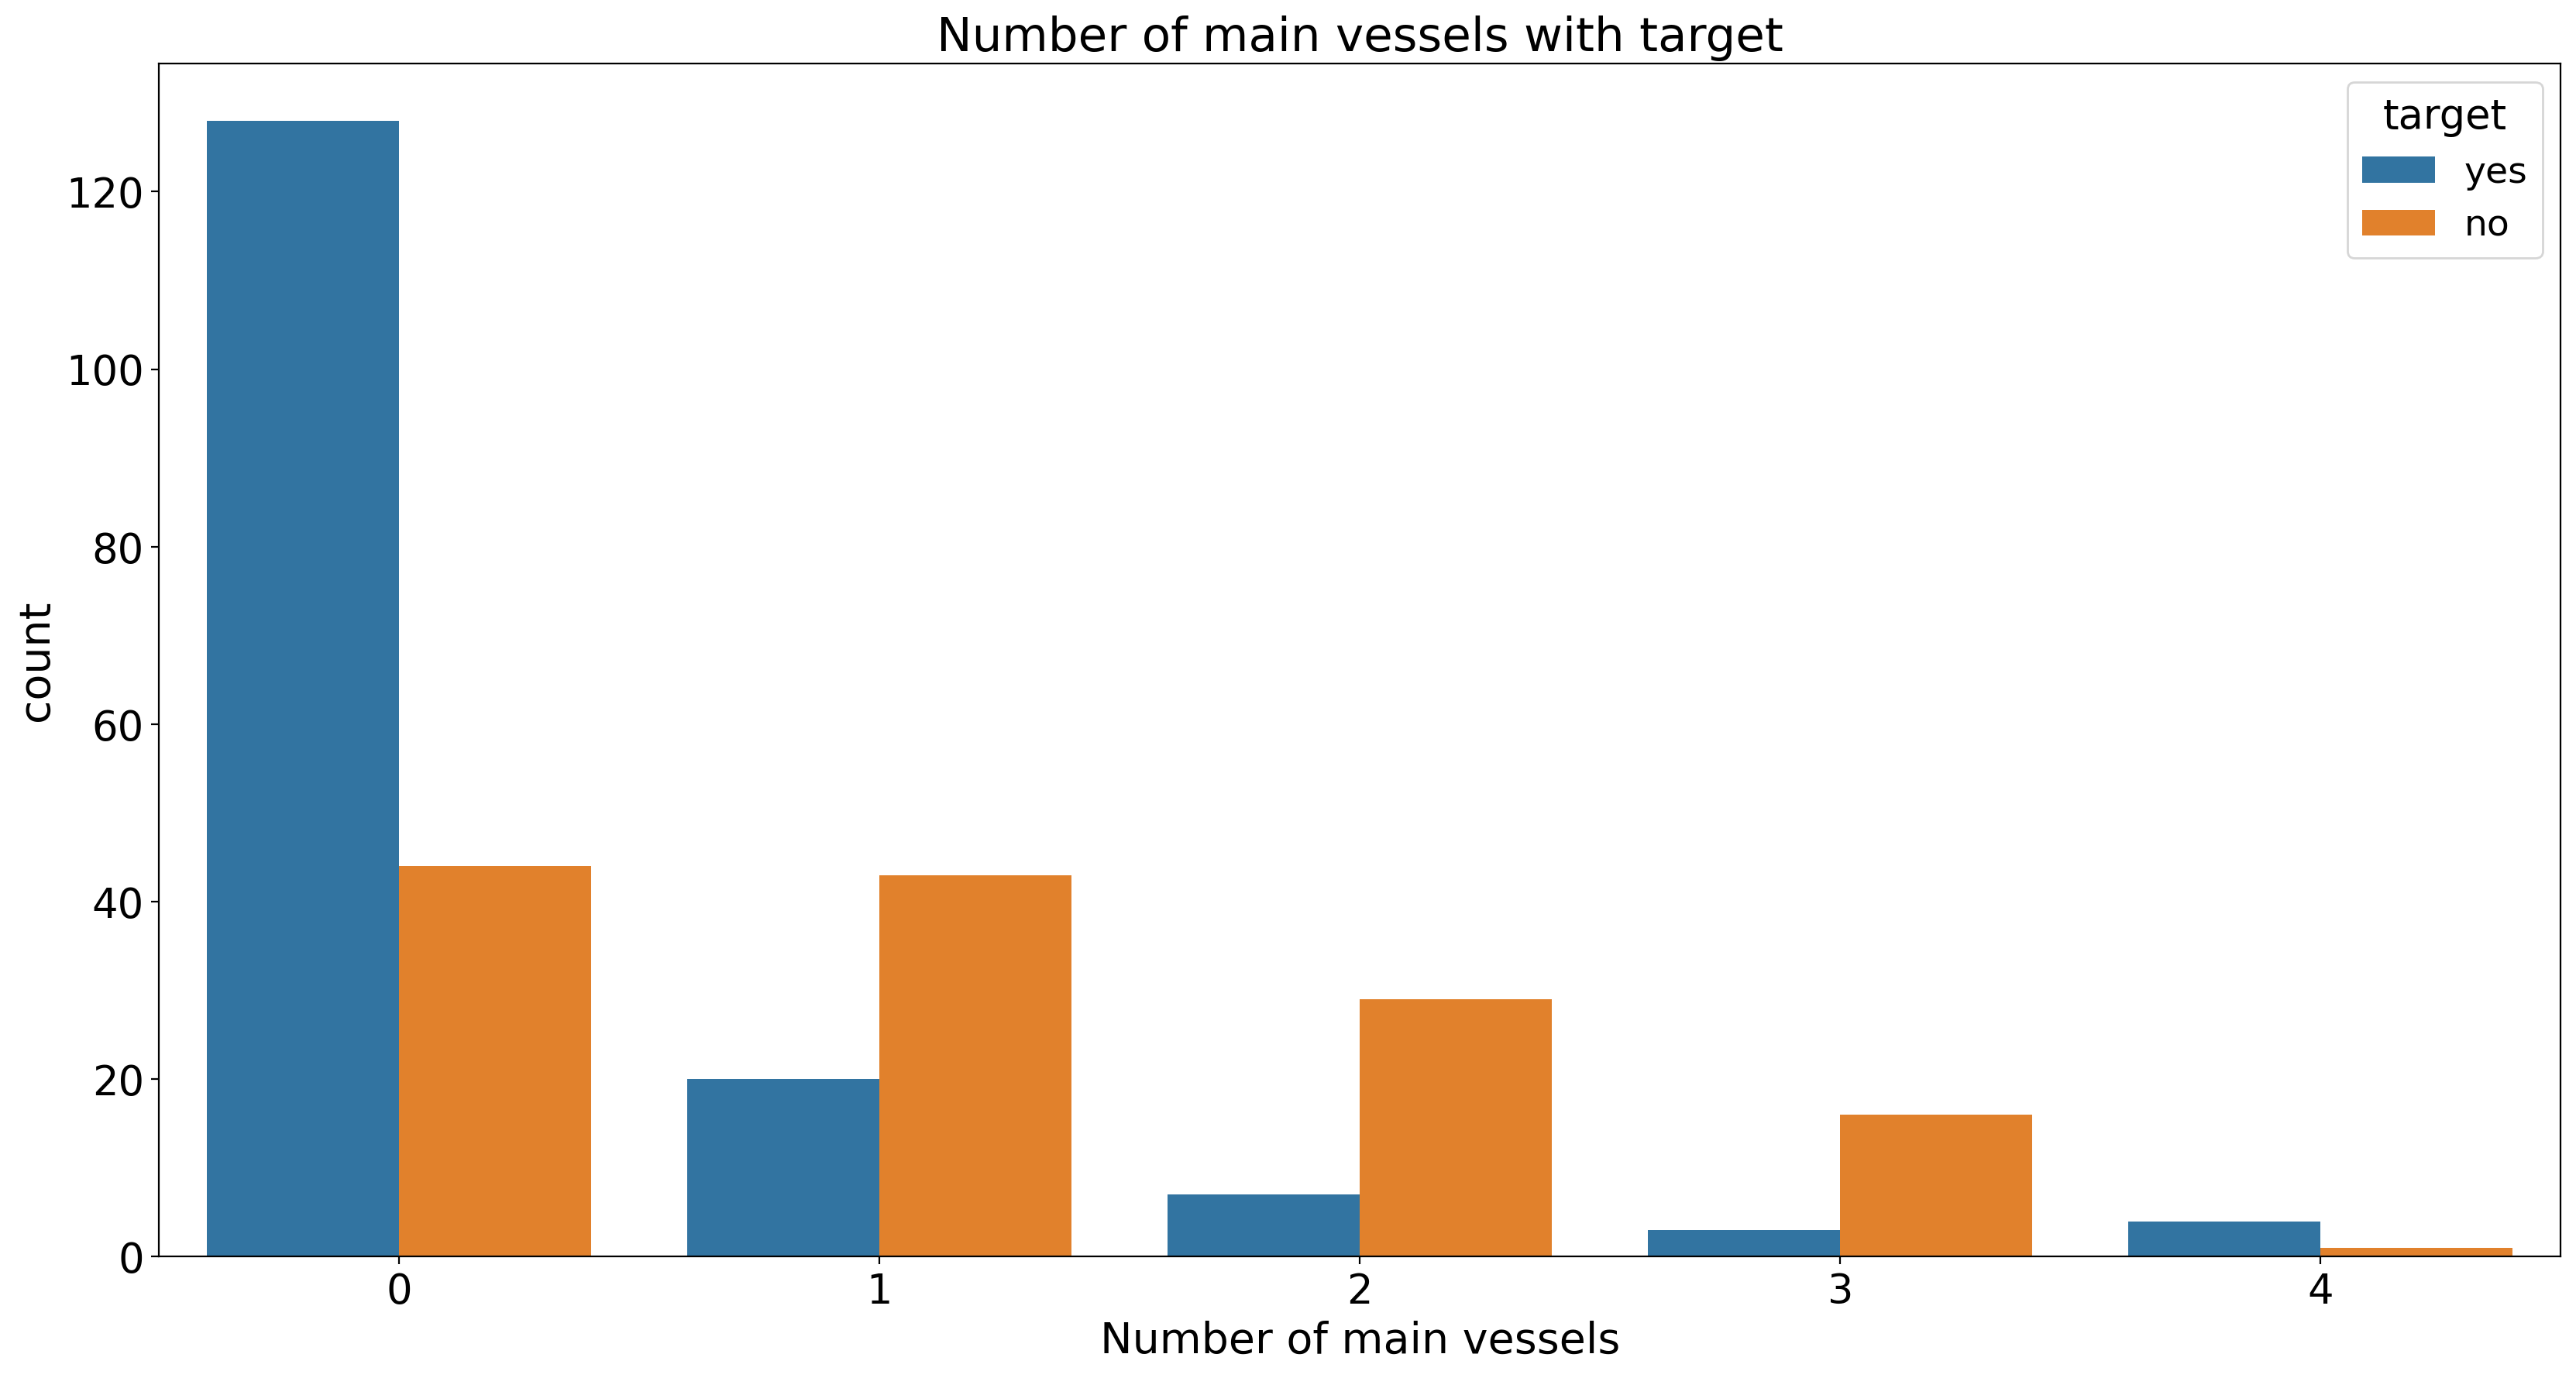

In [659]:
plt.figure(figsize=(20, 10), dpi=200)
sns.countplot(data=df, x="ca", hue="target")
plt.title("Number of main vessels with target", fontdict=font_title)
plt.xlabel("Number of main vessels", fontdict=font_x_y_label)
plt.ylabel("count", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=19)
plt.legend(title="target", title_fontsize=19, fontsize=17)
plt.show()

<font size = 8 face = "time new roman">
Analysis of the graph:<br>
In people with heart disease (target = yes):<br>
A large number have a value of ca = 0 (more than 120 cases).<br>
As the value of ca increases (from 1 to 4), the number of heart patients decreases.<br>
In people without disease (target = no):<br>
A relatively high number are in ca = 1 and ca = 2.<br>
Especially from ca = 1 to ca = 3, it mostly belongs to healthy people.

<font  size=8 face="time new roman">
**Note**:<br>
In people with a higher number of visible main arteries, heart disease is also less common.<br>The lower the number, the more heart patients there are.<br>
**We can say that it is an important factor in heart patients.**

<Axes: xlabel='thal', ylabel='count'>

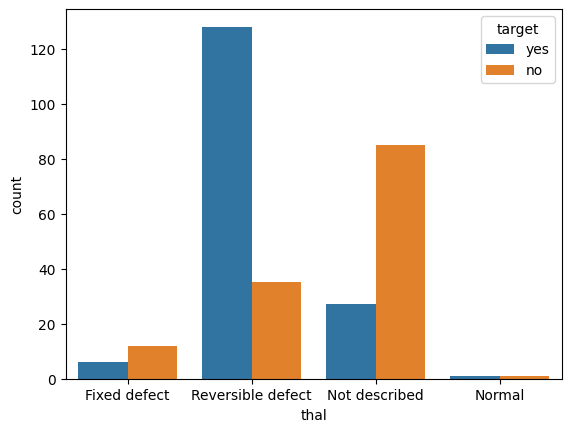

In [660]:
sns.countplot(data=df, x="thal", hue="target")

<font size=8 face="time new roman">
Chart analysis:<br><br>
People with heart disease (target = yes):<br>
Most of them have Reversible defect (more than 120 cases).<br>
Some are also in the Not described section.<br>
There is also Fixed defect, but less.<br>
Healthy people (target = no):<br>
The highest value is related to Not described (more than 80 people).<br>
After that, Reversible defect is significantly lower.<br>
Other values such as Normal and Fixed defect are very low.

In [661]:
df[df["target"] == "yes"].groupby(["slope", "thal", "cp", "target"]).size().sort_values(
    ascending=False
).reset_index(name="count").drop(columns=["target"])

slope               thal                cp  count
0   Downsloping  Reversible defect  Non-anginal pain     37
1   Downsloping  Reversible defect   Atypical angina     28
2   Downsloping  Reversible defect    Typical angina     17
3          Flat  Reversible defect  Non-anginal pain     15
4          Flat  Reversible defect    Typical angina     11
5   Downsloping  Reversible defect     Asymptomatic       6
6   Downsloping      Not described  Non-anginal pain      6
7          Flat  Reversible defect   Atypical angina      6
8   Downsloping      Not described    Typical angina      5
9     Upsloping  Reversible defect  Non-anginal pain      4
10  Downsloping      Not described   Atypical angina      4
11         Flat      Not described  Non-anginal pain      3
12         Flat      Not described     Asymptomatic       3
13         Flat      Not described    Typical angina      2
14         Flat       Fixed defect    Typical angina      2
15         Flat  Reversible defect     Asymptomatic       2
16  Downsloping       Fixed defect    Typical angina      1
17  Downsloping             Normal  Non-anginal pain      1
18  Downsloping      Not described     Asymptomatic       1
19         Flat       Fixed defect     Asymptomatic       1
20         Flat      Not described   Atypical angina      1
21         Flat       Fixed defect   Atypical angina      1
22    Upsloping       Fixed defect     Asymptomatic       1
23    Upsloping      Not described     Asymptomatic       1
24    Upsloping      Not described  Non-anginal pain      1
25    Upsloping  Reversible defect     Asymptomatic       1
26    Upsloping  Reversible defect   Atypical angina      1

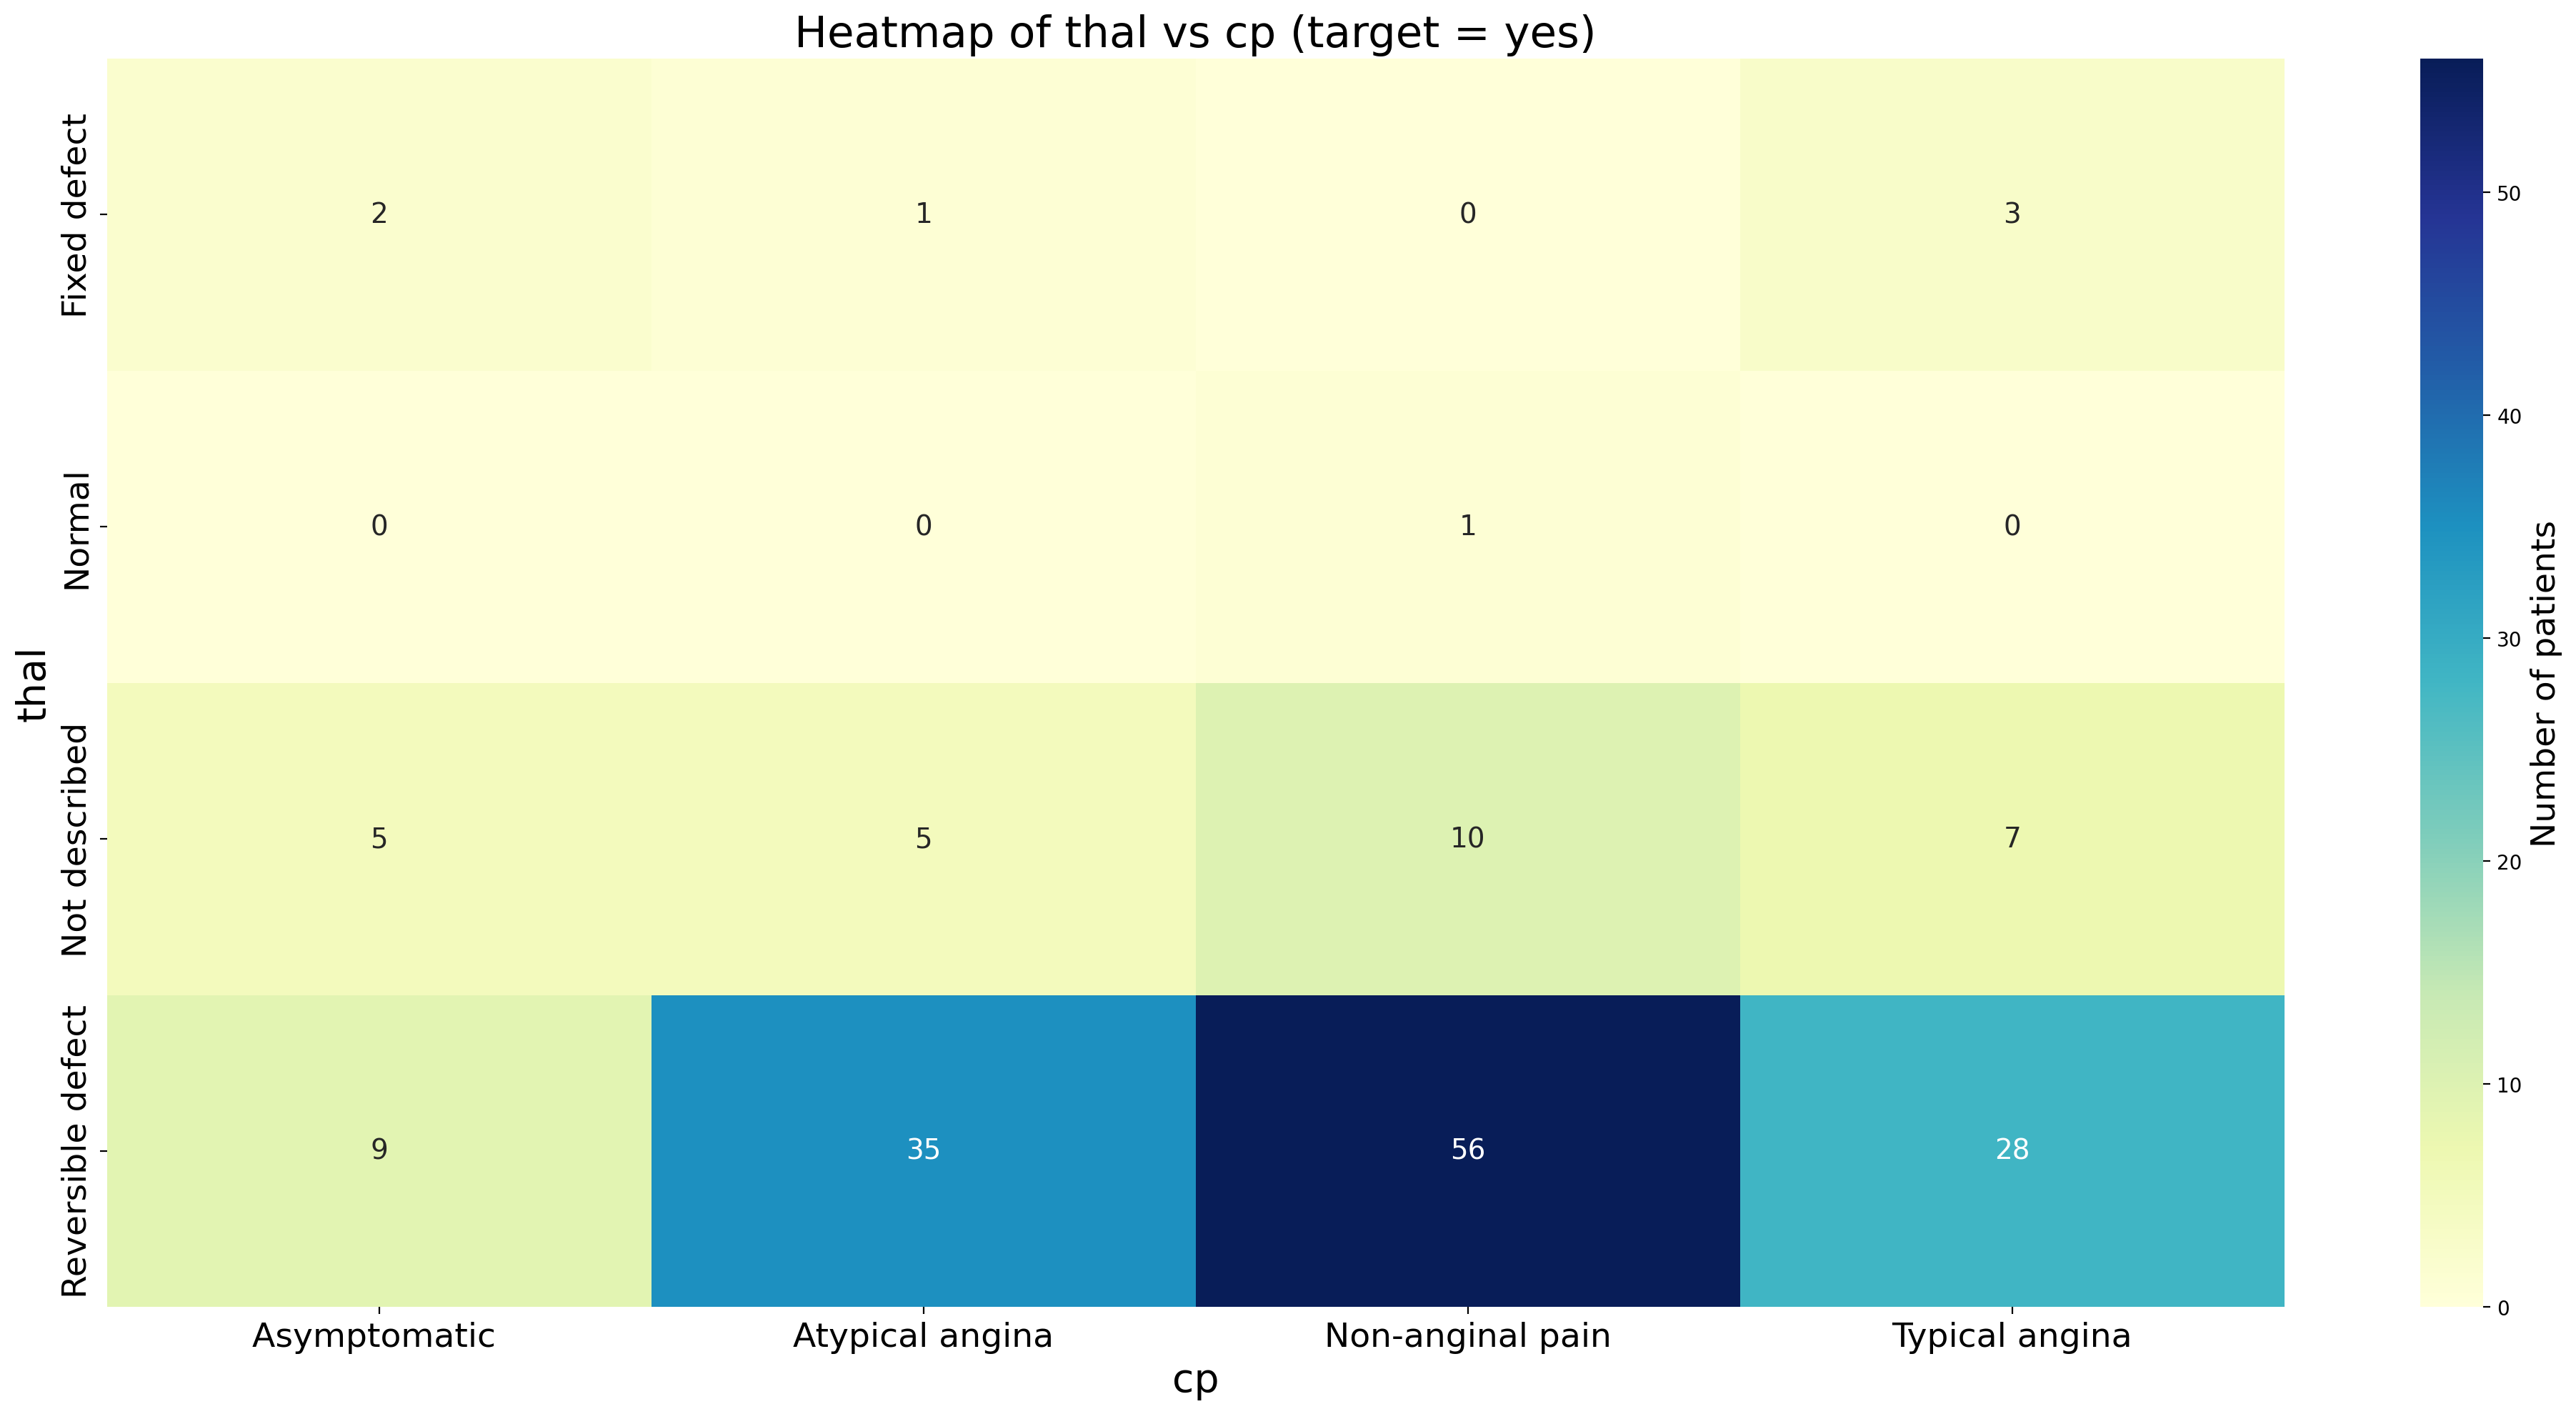

In [662]:
df_heat = df[df["target"] == "yes"].groupby(["thal", "cp"]).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10), dpi=200)
heatmap = sns.heatmap(
    df_heat, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"size": 14}
)
plt.title("Heatmap of thal vs cp (target = yes)", fontdict=font_title)
plt.xlabel("cp", fontdict=font_x_y_label)
plt.ylabel("thal", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=17)
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Number of patients", size=17)
plt.tight_layout()
plt.show()

<font size=8 face="time new roman">
Data analysis:<br><br>
The largest number of patients (56 patients) had the combination:<br>
Thalassemia with reversible defect<br>
Non-anginal pain<br>
Second place (35 patients):<br>
Reversible defect<br>
Atypical angina<br>
Third place (28 patients):<br>
Reversible defect<br>
Typical angina<br>
Other combinations have much lower numbers, even some cells show a value of zero.
<font>

# Splitting the no and yes targets into 2 data frames for more detailed inspection

In [663]:
df_target_no = df[df["target"] == "no"]
df_target_yes = df[df["target"] == "yes"]

# Check target = no

### We check all columns with target = no and target = yes
Starting with sex

In [664]:
df_target_no["sex"].value_counts()

sex
female    112
male       21
Name: count, dtype: int64

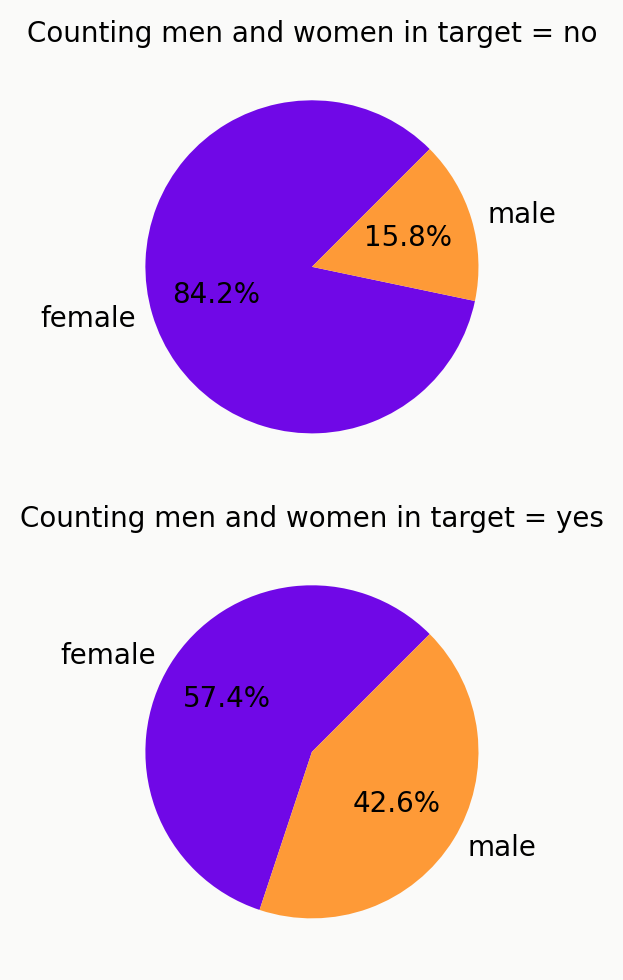

In [665]:
fig, ax = plt.subplots(nrows=2, figsize=(5, 5), dpi=200)
fig.patch.set_facecolor("#FAFAF9")
ax[0].pie(
    x=df_target_no["sex"].value_counts(),
    labels=["female", "male"],
    autopct="%1.1f%%",
    startangle=45,
    colors=["#7008E7", "#FE9A37"],
)
ax[1].pie(
    x=df_target_yes["sex"].value_counts(),
    labels=["female", "male"],
    autopct="%1.1f%%",
    startangle=45,
    colors=["#7008E7", "#FE9A37"],
)
ax[0].set_title("Counting men and women in target = no", fontsize=10)
ax[1].set_title("Counting men and women in target = yes", fontsize=10)
plt.tight_layout()
plt.show()

<font size=8 face = "zar">
In target = no, the number of women is higher.<br>
In target = yes, the number of men has increased significantly, but the number of women is still higher.

In [666]:
df_target_no["cp"].value_counts()

cp
Typical angina      100
Non-anginal pain     18
Atypical angina       8
Asymptomatic          7
Name: count, dtype: int64

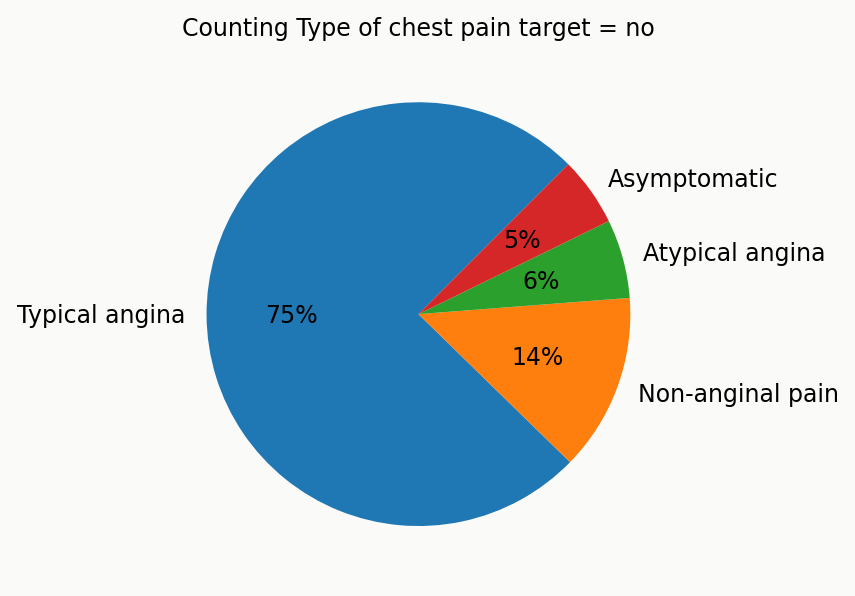

In [667]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=170)
fig.patch.set_facecolor("#FAFAF9")
ax.pie(
    x=df_target_no["cp"].value_counts(),
    labels=["Typical angina", "Non-anginal pain", "Atypical angina", "Asymptomatic"],
    autopct="%1.0f%%",
    startangle=45,
)

ax.set_title("Counting Type of chest pain target = no", fontsize=10)

plt.tight_layout()
plt.show()

<font size=8 face = "zar">
Typical angina (75%): Most people without heart disease have "typical angina" chest pain.<br>

Non-anginal pain (14%): The next category is pain that is not of cardiac origin.<br>

Atypical angina (6%): A small percentage have chest pain that has an unusual pattern.<br>

Asymptomatic (5%): Some have no symptoms at all.<br>

In people without heart disease, "typical angina" pain is much more common.<br>

The incidence of "asymptomatic" pain in this group is low, which makes sense since this type of pain is usually more common in heart patients.

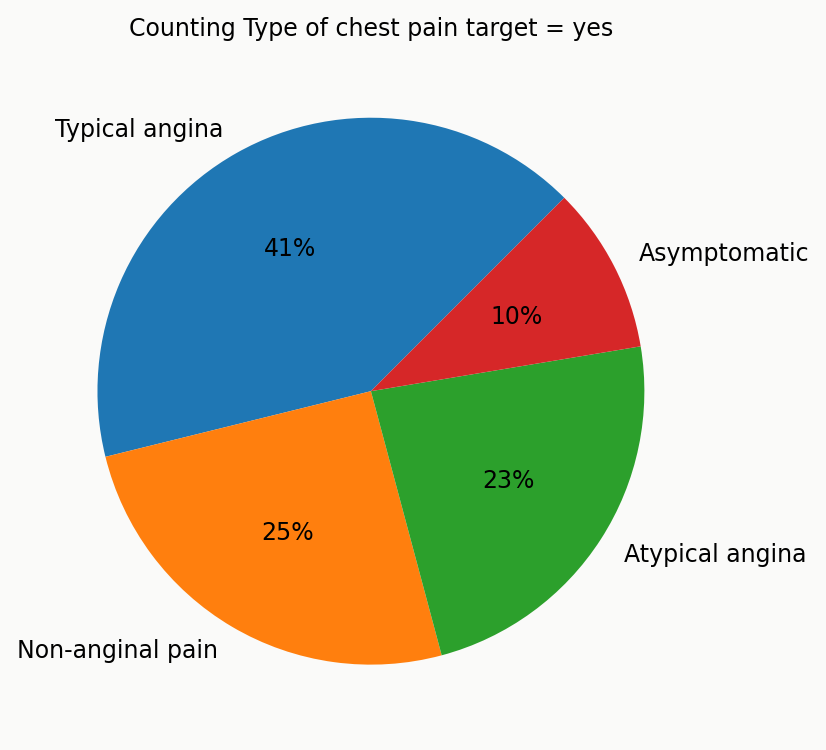

In [668]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=170)
fig.patch.set_facecolor("#FAFAF9")
ax.pie(
    x=df_target_yes["cp"].value_counts(),
    labels=["Typical angina", "Non-anginal pain", "Atypical angina", "Asymptomatic"],
    autopct="%1.0f%%",
    startangle=45,
)

ax.set_title("Counting Type of chest pain target = yes", fontsize=10)

plt.tight_layout()
plt.show()

<font size=8 face="zar">
People with typical angina are more likely to be in the healthy group; this may indicate that typical pain is not always indicative of disease and may in some cases be the result of non-cardiac conditions.<br>

In contrast, atypical angina, non-anginal pain, and asymptomatic pain are more common in sick people.<br>

Atypical angina is one of the most important differentiating symptoms between the two groups and can be a risk indicator.

In [669]:
df_target_no["restecg"].value_counts()

restecg
0    75
1    55
2     3
Name: count, dtype: int64

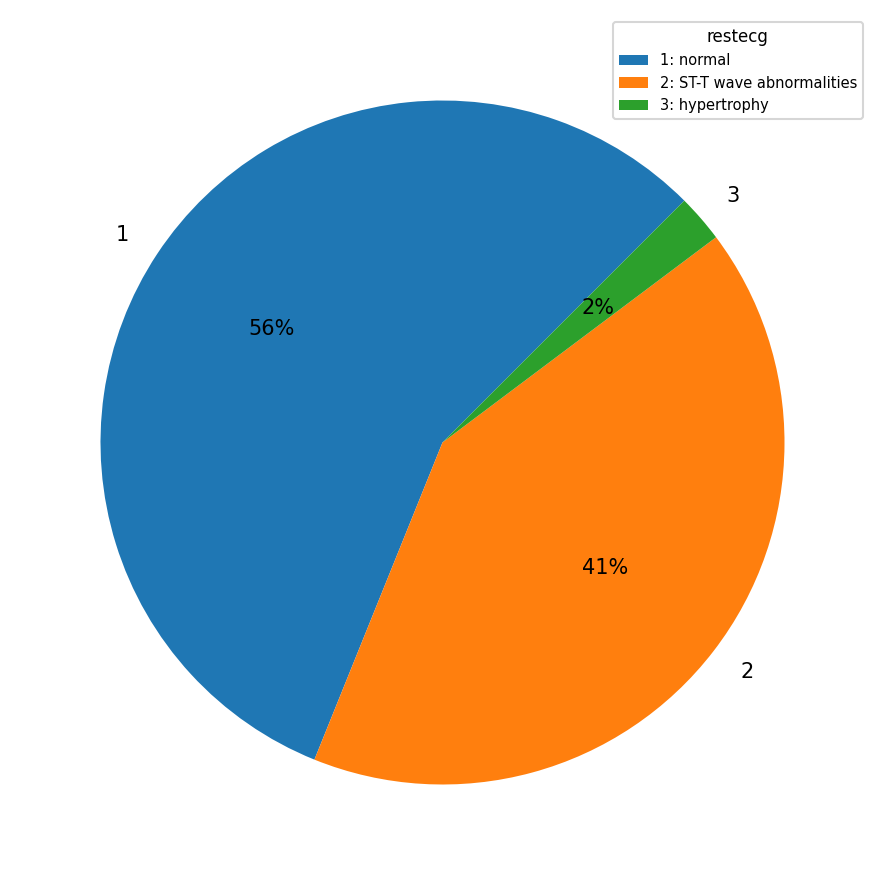

In [670]:
plt.figure(figsize=(6, 6), dpi=150)
plt.pie(
    x=df_target_no["restecg"].value_counts(),
    labels=["1", "2", "3"],
    autopct="%1.0f%%",
    startangle=45,
)
plt.legend(
    ["1: normal", "2: ST-T wave abnormalities", "3: hypertrophy"],
    title="restecg",
    title_fontsize=8,
    fontsize=7,
    loc="upper right"
)
plt.tight_layout()
plt.show()

<font size=8 face="zar">
Resting ECG results in target = no:<br>
The number of normal states is higher.<br>
A significant number of people without heart disease have state 2!<br>
A very small percentage have state 3.

In [671]:
df_target_no['exang'].value_counts()

exang
yes    74
no     59
Name: count, dtype: int64

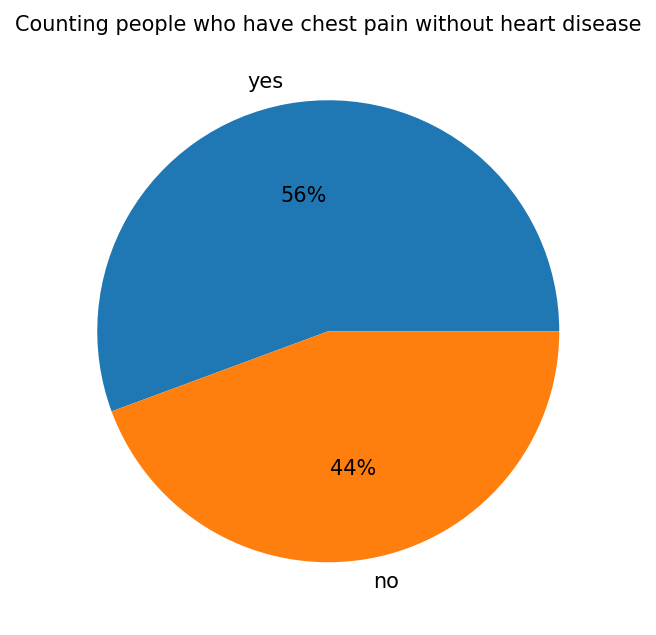

In [672]:
plt.figure(figsize=(5, 5), dpi=150)
plt.pie(
    x=df_target_no['exang'].value_counts(), labels=["yes", "no"], autopct="%1.0f%%"
)
plt.title("Counting people who have chest pain without heart disease", fontsize=10)
plt.show()

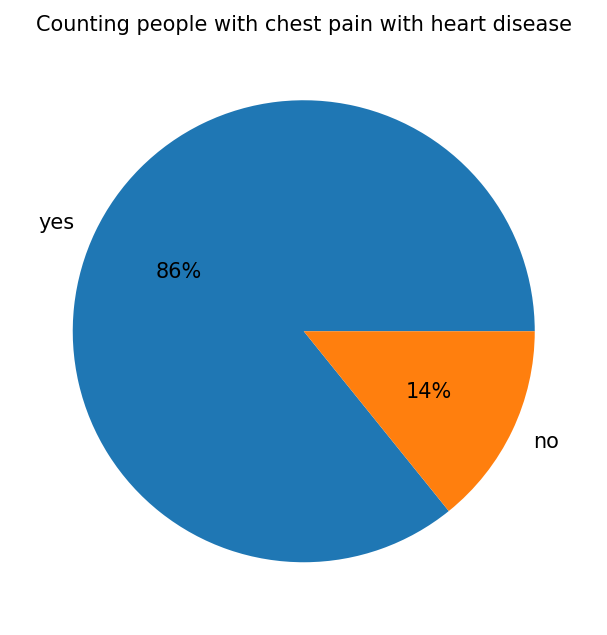

In [673]:
plt.figure(figsize=(5, 5), dpi=150)
plt.pie(
    x=df_target_yes['exang'].value_counts(), labels=["yes", "no"], autopct="%1.0f%%"
)
plt.title("Counting people with chest pain with heart disease", fontsize=10)
plt.show()

<font size=8 face="zar">
In heart disease, people are more likely to have chest pain caused by exercise.

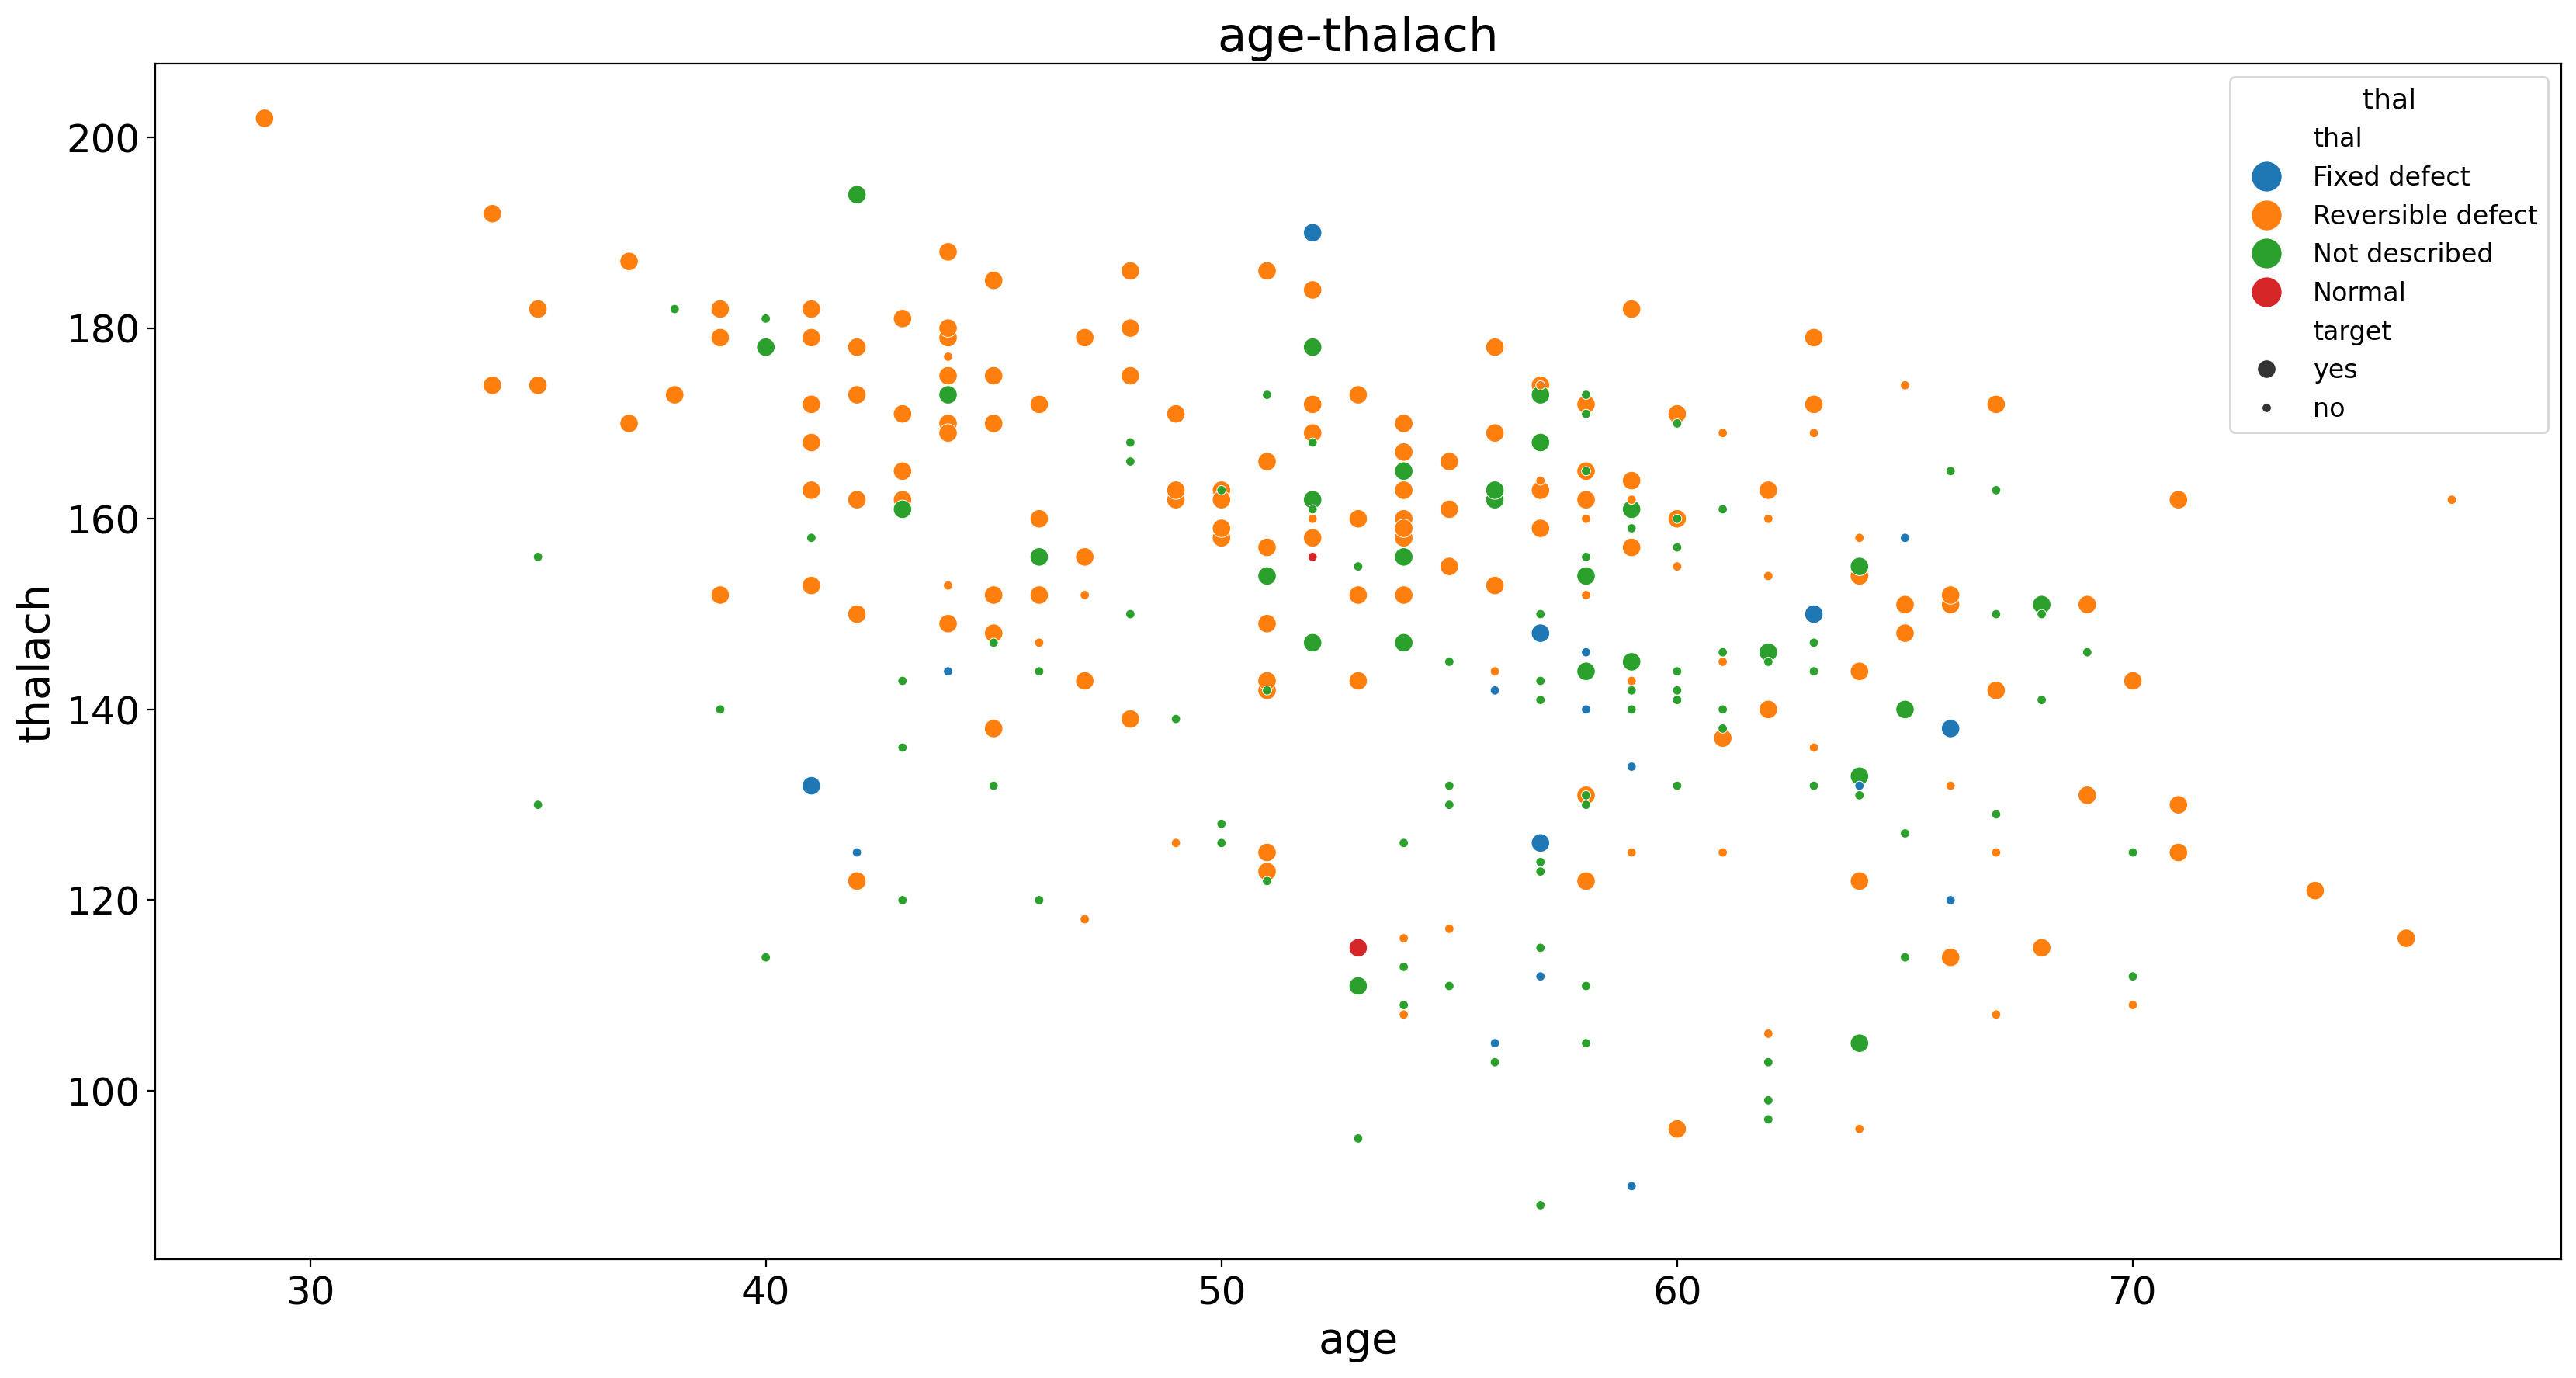

In [674]:
plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(
    data=df, x="age", y="thalach", hue="thal", size="target", s=200
)
plt.title("age-thalach", fontdict=font_title)
plt.xlabel("age", fontdict=font_x_y_label)
plt.ylabel("thalach", fontdict=font_x_y_label)
plt.tick_params(axis="both", labelsize=18)
plt.legend(title="thal", title_fontsize=13, fontsize=12)
plt.show()

<font size=8 face="zar">
Relationship between thal and target:<br>
Orange (Reversible defect) is more common in affected patients (larger spots).<br>
In particular, in middle and older age, most spots are large and orange, indicating that "Reversible defect" is strongly associated with heart disease.<br>
"Fixed defect" (blue) is also present, but less than orange and in scattered spots.<br>
"Normal" (red) appears only once, which may be due to limited data or rareness.<br>
Non-affected individuals (target = no):<br>
More often seen with smaller spots and often green (Not described) or even blue (Fixed defect).<br>
This may indicate that some types of defects do not necessarily mean disease, or that their severity/type is important.<br>
Conclusion:<br>
There is a relationship between the type of thal abnormality and the status of heart disease.<br>
In particular, "Reversible defect" is more common in affected patients and may be one of the strongest features for predicting heart disease.

# Final result:
The columns ' thalach ' , ' slope ' , ' ca ' , ' thal ' were important.

# machine learning

In [675]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [676]:
outlier_trestbps = df_copy[(df_copy["trestbps"] >= 181)].index
outlier_chol = df_copy[(df_copy["chol"]) >= 390].index
outlier_thalach = df_copy[df_copy["thalach"] < 80].index

df_copy.drop(outlier_trestbps, inplace=True)
df_copy.drop(outlier_chol, inplace=True)
df_copy.drop(outlier_thalach, inplace=True)

In [677]:
df_copy

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[295 rows x 14 columns]

In [678]:
x = df_copy.drop(columns="target")
y = df_copy["target"]

In [679]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [680]:
models = {
    "logostic": (
        Pipeline([("scaler", StandardScaler()), ("model", LogisticRegression())]),
        {
            "model__C": [0.001, 0.01, 0.1, 1, 10],
            "model__penalty": ["l2"],
            "model__solver": ["liblinear", "lbfgs"],
            "model__class_weight": ["balanced"],
            "model__max_iter": [200, 400, 600, 1000, 2000],
            "model__tol": [0.0001, 0.001, 0.01, 1, 10]
        },
    ),
    "knn": (
        Pipeline([("scaler", StandardScaler()), ("model", KNeighborsClassifier())]),
        {"model__n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], "model__weights": ["uniform", "distance"]},
    ),
    "naive_bayes": (
        Pipeline([("scaler", StandardScaler()), ("model", GaussianNB())]),
        {"model__var_smoothing": [1e-9, 1e-8, 1e-7]},
    ),
}

In [681]:
best_models = {}
for name, (pipe, params) in models.items():
    print(f"\nRunning GridSearch for {name} ...")
    grid = GridSearchCV(pipe, params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(x_train, y_train)
    print("Best params:", grid.best_params_)
    print("Best cross-val score:", grid.best_score_)
    print("Test accuracy:", grid.best_estimator_.score(x_test, y_test))
    best_models[name] = grid.best_estimator_


Running GridSearch for logostic ...
Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best params: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__max_iter': 200, 'model__penalty': 'l2', 'model__solver': 'liblinear', 'model__tol': 0.01}
Best cross-val score: 0.8347517730496454
Test accuracy: 0.864406779661017

Running GridSearch for knn ...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best cross-val score: 0.8305851063829787
Test accuracy: 0.8135593220338984

Running GridSearch for naive_bayes ...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params: {'model__var_smoothing': 1e-09}
Best cross-val score: 0.8390070921985815
Test accuracy: 0.8305084745762712
